## read in data

In [4]:
dat_rna<-as.data.frame(read.table("~/workshop/08DrugSensitive/dat/CCLE_RNAseq_rsem_transcripts_tpm_20180929.txt",sep="\t",na.strings = c("0"),check.names = FALSE,header=T,row.names=1,stringsAsFactors=F))
dat_rna = t(dat_rna[,!grepl("transcript_ids",colnames(dat_rna))])
#remove ENSEMBL ID version
colnames(dat_rna) <- gsub(".[0-9]*$", "", colnames(dat_rna))
#row.names(dat_rna)=dat_rna[,1]
#dat_rna=dat_rna[,-1]
#head(dat_rna)
dim(dat_rna)

#CCDS(coding region) ENSEMBL ID to Gene symbol, 18K genes left
name<-as.data.frame(read.table("~/workshop/08DrugSensitive/dat/HGNC_ENSEMBL_Symbol.txt",sep="\t",check.names = FALSE,header=F,stringsAsFactors=F))
#head(name)

tmp=merge(t(dat_rna),name[,c(1,2)],by.x="row.names",by.y="V2")
row.names(tmp)=tmp$V1
tmp=tmp[,!colnames(tmp) %in% c("Row.names","V1")]
dat_rna=as.data.frame(t(tmp))
dat_rna=dat_rna[,-1]
#head(dat_rna)
dim(dat_rna)

#keep gene with at least 10% valued value, 18k genes -> 13K genes left.
f<-function(x) sum(x==0)
d<-as.data.frame(apply(dat_rna,2,f))
d$geneID=row.names(d)
head(d)
dat_rna=dat_rna[,row.names(d[d[,1]<as.numeric(as.character(dim(dat_rna)[1]))*0.1,])]
dat_rna=dat_rna[,-1]
#head(dat_rna)
dim(dat_rna)

In [31]:
#Gene expression (optional)
dat_rna<-as.data.frame(read.table("dat/CCLE_RNAseq_rsem_genes_tpm_20180929.txt",sep="\t",na.strings = c("0"),check.names = FALSE,header=T,row.names=1,stringsAsFactors=F))
dat_rna = t(dat_rna[,!grepl("transcript_ids",colnames(dat_rna))])
#remove ENSEMBL ID version
colnames(dat_rna) <- gsub(".[0-9]*$", "", colnames(dat_rna))
#row.names(dat_rna)=dat_rna[,1]
#dat_rna=dat_rna[,-1]
#head(dat_rna)
dim(dat_rna)

#CCDS(coding region) ENSEMBL ID to Gene symbol, 18K genes left
name<-as.data.frame(read.table("dat/HGNC_ENSEMBL_Symbol.txt",sep="\t",check.names = FALSE,header=F,stringsAsFactors=F))
#head(name)

tmp=merge(t(dat_rna),name[,c(1,2)],by.x="row.names",by.y="V2")
row.names(tmp)=tmp$V1
tmp=tmp[,!colnames(tmp) %in% c("Row.names","V1")]
dat_rna=as.data.frame(t(tmp))
dat_rna=dat_rna[,-1]
#head(dat_rna)
dim(dat_rna)

#keep gene with at least 10% valued value, 18k genes -> 13K genes left.
f<-function(x) sum(x==0)
d<-as.data.frame(apply(dat_rna,2,f))
d$geneID=row.names(d)
head(d)
dat_rna=dat_rna[,row.names(d[d[,1]<as.numeric(as.character(dim(dat_rna)[1]))*0.1,])]
dat_rna=dat_rna[,-1]
#head(dat_rna)
dim(dat_rna)

#log10
library(dplyr)
dat_rna=as.data.frame(sweep(data.matrix(dat_rna),1,0.000001,FUN = "+"))   #log(X+1)
dat_rna %>% mutate_each(funs(log10)) -> tmp
row.names(tmp)=row.names(dat_rna)
dat_rna=round(tmp,3)
tmp=""
#head(dat_rna)
dim(dat_rna)

#quantile normalization
tmp=t(dat_rna)
#head(tmp)
boxplot(tmp[,sample(1:ncol(tmp), 30)])

library(preprocessCore)
tmp=normalize.quantiles(tmp)
row.names(tmp)=row.names(tmp)
colnames(tmp)=colnames(tmp)
boxplot(tmp[,sample(1:ncol(tmp), 30)])
#head(dat_rna)

#merge with metabolites data and gain 454 shared samples
dat_m_rna=merge(dat,dat_rna,by="row.names")
row.names(dat_m_rna) <- dat_m_rna[,1]
dat_m_rna<-dat_m_rna[,-1]
dim(dat_m_rna)
head(dat_m_rna)

Warning message in file(file, "rt"):
“cannot open file 'dat/CCLE_RNAseq_rsem_genes_tpm_20180929.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [1]:
#gene expression
#dat_metab,dat_rna,dat_m_rna,dat
load(file="dat/CLsample_454_metabolites_quantile_rna.RData")
dat=NULL   #release memory

#metabolite
dat_metab<-as.data.frame(read.table("dat/CCLE_metabolomics_20190502.csv",sep=",",check.names = FALSE,header=T,row.names=1,stringsAsFactors=F))
dat_metab=dat_metab[,-1]   #remove DepMap_ID column
#head(dat_metab)

#mutation
dat_mut<-as.data.frame(read.table("dat/CCLE_mutations.csv",sep=",",check.names = FALSE,header=T,stringsAsFactors=F))
#head(dat_mut)
#colnames(dat_mut)

#Drug response - PRISM 1448 compounds
#The second screen involved 1502 BRD with 8 dose per drug.  Recording log MFI fold change, absolute value smaller is better.
#dat_drug=as.data.frame(read.csv("dat/secondary-screen-dose-response-curve-parameters.csv",check.names = FALSE,header=T,stringsAsFactors=F))
#head(dat_drug)



In [2]:
#Depmat GDSC matrix
dat_drug=as.data.frame(read.table("dat/Drug_sensitivity_IC50_Sanger_GDSC1.csv",sep=",",row.names=1,check.names = FALSE,header=T,stringsAsFactors=F))
colnames(dat_drug)=gsub(" \\(GDSC1","",colnames(dat_drug)) #have a space before '('
colnames(dat_drug)=gsub("\\)","",colnames(dat_drug))
head(dat_drug)
#colnames(dat_drug)

#Depmat GDSC matrix
dat_AUC=as.data.frame(read.table("dat/Drug_sensitivity_AUC_Sanger_GDSC1.csv",sep=",",row.names=1,check.names = FALSE,header=T,stringsAsFactors=F))
colnames(dat_AUC)=gsub(" \\(GDSC1","",colnames(dat_AUC)) #have a space before '('
colnames(dat_AUC)=gsub("\\)","",colnames(dat_AUC))
head(dat_AUC)

,erlotinib:1,AICAR:1001,vinblastine:1004,cisplatin:1005,cytarabine:1006,docetaxel:1007,methotrexate:1008,tretinoin:1009,gefitinib:1010,navitoclax:1011,⋯,ITK inhibitor:63,KIN001-128:64,pyrimethamine:71,JW-7-52-1:83,KIN001-139:86,GW-843682X:87,entinostat:88,parthenolide:89,MG-132:9,TGX-221:94
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACH-000001,NA,NA,-8.436349,NA,NA,-7.275349,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACH-000002,NA,9.252952,-7.069426,3.160163,NA,-7.168425,NA,NA,NA,-3.216113,⋯,NA,NA,NA,NA,NA,NA,-0.01710426,NA,-1.07544447,NA
ACH-000004,NA,10.379682,-4.314050,1.040777,-4.5042887,NA,-6.248732,NA,NA,0.211601,⋯,NA,NA,3.366938,-4.8488346,-0.8412699,-5.945220,-1.08925825,1.657674,-2.14173104,NA
ACH-000006,NA,9.670194,-5.518255,NA,NA,NA,-6.070819,NA,NA,NA,⋯,3.243567,NA,NA,-1.0329983,-2.5707071,-5.045605,-0.64802833,NA,NA,NA
ACH-000007,NA,NA,NA,NA,-0.9143081,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0.1890403,NA,NA,NA,NA,-0.03165351,NA
ACH-000008,NA,10.004112,-5.562190,2.873407,NA,-6.565967,NA,NA,NA,NA,⋯,2.871747,1.429981,NA,-5.6289016,-2.3524978,-6.070098,0.38673194,NA,-4.96433081,NA


,erlotinib:1,AICAR:1001,vinblastine:1004,cisplatin:1005,cytarabine:1006,docetaxel:1007,methotrexate:1008,tretinoin:1009,gefitinib:1010,navitoclax:1011,⋯,KIN001-128:64,pyrimethamine:71,JW-7-52-1:83,KIN001-139:86,GW-843682X:87,entinostat:88,parthenolide:89,MG-132:9,IKK-3 inhibitor:91,TGX-221:94
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACH-000001,NA,0.9790056,0.5234553,0.8625173,0.8824295,0.8592987,0.9070424,0.8903975,0.9941976,0.9272161,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACH-000002,NA,0.7090853,0.5657992,0.8760388,0.8725076,0.8692162,0.7127174,0.6249079,0.9251258,0.4895543,⋯,0.9816401,0.9959410,0.8125289,0.9308304,0.8177414,0.6982871,0.9548597,0.8632623,NA,0.971990
ACH-000004,0.8880746,0.8449425,0.8075062,0.6917336,0.3810261,0.9698321,0.5929980,0.9612142,0.9398632,0.8209654,⋯,0.9450154,0.7477795,0.4324295,0.8571832,0.5957296,0.5731394,0.8342146,0.7270212,0.9171051,0.966411
ACH-000006,0.9624165,0.7173398,0.6361621,0.9159628,0.8700661,0.8777875,0.5941762,0.7446541,0.8566465,0.8970338,⋯,0.9550446,0.8938538,0.7133029,0.6603705,0.7089941,0.6111984,0.9500856,0.9117585,0.9574846,0.928453
ACH-000007,0.8488343,0.9346411,0.8459208,0.9632743,0.7011521,0.9600522,0.9653920,0.9986106,0.9834033,0.9758188,⋯,0.9299891,NA,0.7339465,0.9304397,0.8527975,0.8350781,0.9149566,0.8675380,NA,NA
ACH-000008,0.9002847,0.7715910,0.6647716,0.8178509,0.8135980,0.8055569,0.9240393,NA,0.8572858,0.8969564,⋯,0.8806221,0.9191931,0.4182145,0.6750555,0.5450622,0.6908567,0.9319229,0.4027288,0.9888708,NA


In [2]:
#GDSC website version
dat_GDSC=as.data.frame(read.csv("dat/GDSC1_v84_drug_logIC50_AUC.csv",check.names = FALSE,header=T,stringsAsFactors=F))
tmp=as.data.frame(read.csv("dat/PRISM_CL_info.csv",check.names = FALSE,header=T,stringsAsFactors=F))
tmp=tmp[,c("DepMap_ID","CCLE_Name","COSMICID")]
dat_GDSC=merge(tmp,dat_GDSC,by.y="Cosmic ID",by.x="COSMICID")
#colnames(dat_GDSC)=gsub(" ","_",colnames(dat_GDSC))
head(dat_GDSC)
#dim(dat_GDSC)

#get shared CL samples
#CL=intersect(row.names(dat_drug),dat_GDSC$DepMap_ID)
#length(CL)

,COSMICID,DepMap_ID,CCLE_Name,Drug Name,Drug ID,Cell Line Name,TCGA Classification,Tissue,Tissue Sub-type,IC50,AUC,Max Conc,RMSE,Z score,Dataset Version
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,683667,ACH-001711,PFSK1_CENTRAL_NERVOUS_SYSTEM,NG-25,260,PFSK-1,MB,nervous_system,medulloblastoma,3.5884059,0.9567541,10.24,0.07694042,0.57751081,GDSC1
2,683667,ACH-001711,PFSK1_CENTRAL_NERVOUS_SYSTEM,AZD5438,1401,PFSK-1,MB,nervous_system,medulloblastoma,0.6560504,0.6759065,10.00,0.07677439,-0.14914564,GDSC1
3,683667,ACH-001711,PFSK1_CENTRAL_NERVOUS_SYSTEM,Embelin,172,PFSK-1,MB,nervous_system,medulloblastoma,2.8295660,0.8117407,32.00,0.09934547,-0.06845801,GDSC1
4,683667,ACH-001711,PFSK1_CENTRAL_NERVOUS_SYSTEM,Bleomycin,190,PFSK-1,MB,nervous_system,medulloblastoma,3.3302336,0.7884714,64.00,0.08134140,0.71805465,GDSC1
5,683667,ACH-001711,PFSK1_CENTRAL_NERVOUS_SYSTEM,BPTES,1425,PFSK-1,MB,nervous_system,medulloblastoma,4.6624246,0.9846278,10.00,0.03857381,0.86266865,GDSC1
6,683667,ACH-001711,PFSK1_CENTRAL_NERVOUS_SYSTEM,Amuvatinib,293,PFSK-1,MB,nervous_system,medulloblastoma,3.4397882,0.9129768,20.00,0.14877113,-0.09179233,GDSC1


[1] 385  15

[1] 626

[1]   222 13418

`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(dat_p$IC50, dat_p$SPP1, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  dat_p$IC50 and dat_p$SPP1
S = 2370040, p-value = 5.473e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2997407 


[1] -0.2997407

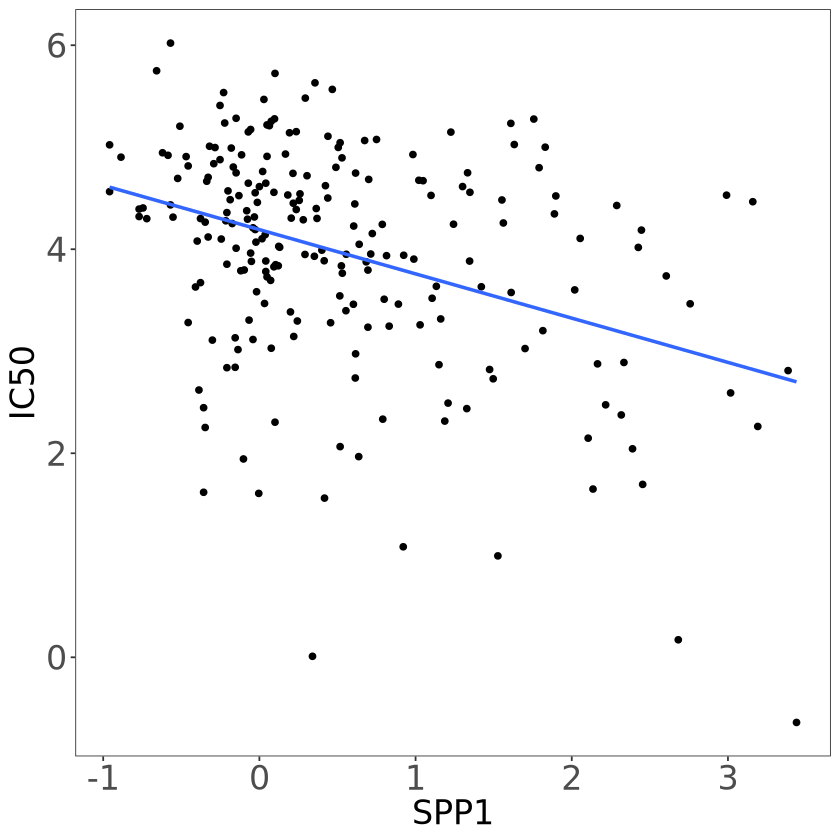

In [25]:
dat_p=subset(dat_GDSC,`Drug Name`=="TGX221")  #define the drug
dim(dat_p)

length(intersect(row.names(dat_rna),dat_GDSC$CCLE_Name))
dat_p=merge(dat_p,dat_rna,by.x = "CCLE_Name", by.y = "row.names")
dim(dat_p)
#head(dat_p)

library(ggplot2)
p =ggplot(dat_p, aes(SPP1,IC50)) +geom_point() + geom_smooth(method = lm,se = FALSE)+theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),axis.text=element_text(size=20),axis.title=element_text(size=20))
p

#correlation
correlation_result <- cor.test(dat_p$IC50, dat_p$SPP1, method = "spearman")
correlation_result

cor(dat_p$IC50, dat_p$SPP1, method ="spearman")
#pdf(file="IL18BP_trametinib_cor.pdf")

,DepMap_ID,Drug Name,Drug ID,IC50,AUC,IC50_from_depmap,delta
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
42335,ACH-000472,Gefitinib,1010,-1.833161,0.7571830,-1.533830,0.29933053
46926,ACH-002151,Gefitinib,1010,-1.475609,0.7794831,-1.833521,0.35791239
52467,ACH-001075,Gefitinib,1010,-1.635863,0.7507124,-2.724866,1.08900355
58290,ACH-000979,Gefitinib,1010,-1.086740,0.8225731,-2.050512,0.96377196
96464,ACH-000846,Gefitinib,1010,-1.153769,0.8333698,-1.140017,0.01375184
105868,ACH-000546,Gefitinib,1010,-2.695220,0.6078887,-3.454481,0.75926131


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.8102543,0.03529205,22.958549,7.318960e-17
delta,-0.1523862,0.04198745,-3.629326,1.482826e-03


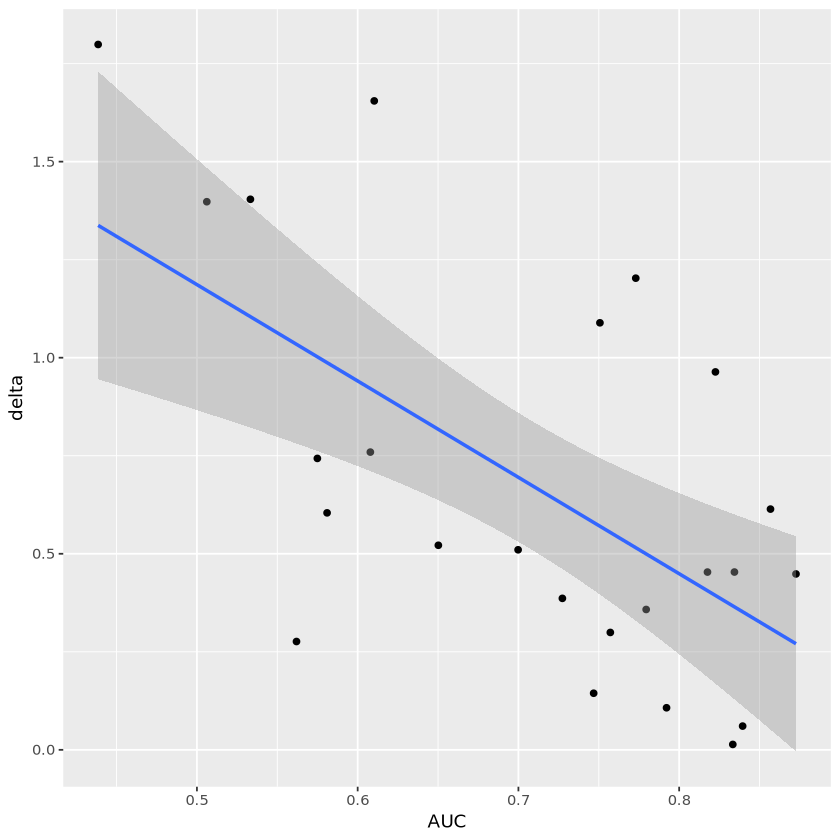

In [7]:
library(ggplot2)
i=9
#drug_ID=strsplit(colnames(dat_drug)[i],":")[[1]][2]
drug_ID=1010
dat_drug_select=subset(dat_GDSC,DepMap_ID %in% CL & `Drug ID`==drug_ID)
#ensure same order, then we can minor directly
dat_drug_select=cbind(dat_drug_select[,c("DepMap_ID","Drug Name","Drug ID","IC50","AUC")],dat_drug[dat_drug_select$DepMap_ID,i])
colnames(dat_drug_select)[ncol(dat_drug_select)]="IC50_from_depmap"
dat_drug_select=na.omit(dat_drug_select)
#head(dat_drug_select)

#if(nrow(dat_drug_select)<2){   #at least 2 samples
        dat_drug_select$IC50=as.numeric(as.character(dat_drug_select$IC50))  #numeric
        dat_drug_select$AUC=as.numeric(as.character(dat_drug_select$AUC))   #numeric
        dat_drug_select$delta=abs(dat_drug_select$IC50 - dat_drug_select$IC50_from_depmap)
        head(dat_drug_select)
        #check AUC and delta correlation
        #cor(dat_drug_select$delta,dat_drug_select$AUC,method="pearson")
        income.happiness.lm <- lm(AUC ~ delta, data = dat_drug_select)
        summary(income.happiness.lm)[[4]]
        #slope=summary(income.happiness.lm)[[4]][2,][[1]]  #slope/delta Estimate, negative shows negative correltion between delta and AUC
        #SE=summary(income.happiness.lm)[[4]][2,][[2]]
        #pvalue=summary(income.happiness.lm)[[4]][2,][[4]]
        #summary(income.happiness.lm)[4] 
        ggplot(dat_drug_select, aes(AUC, delta) ) +geom_point() +stat_smooth(method = glm,formula = y ~ x)
#}
        


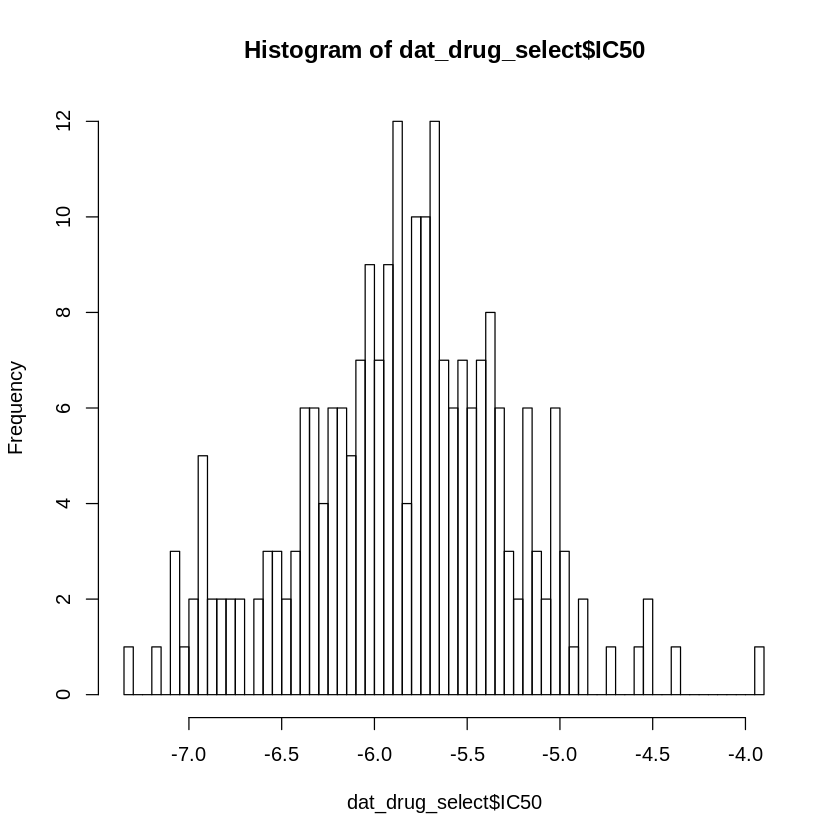

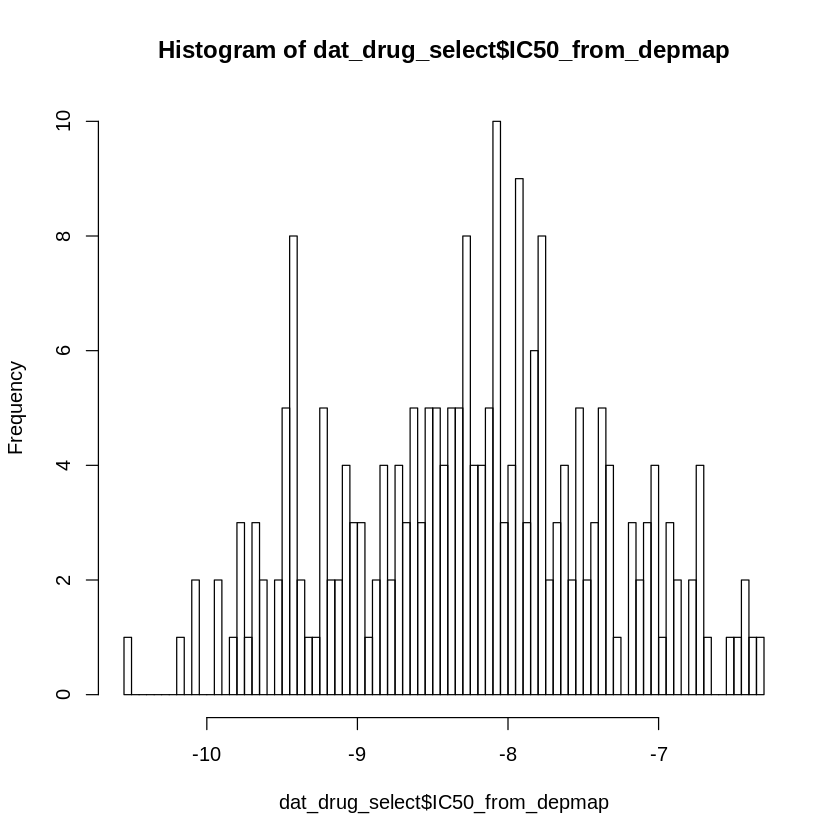

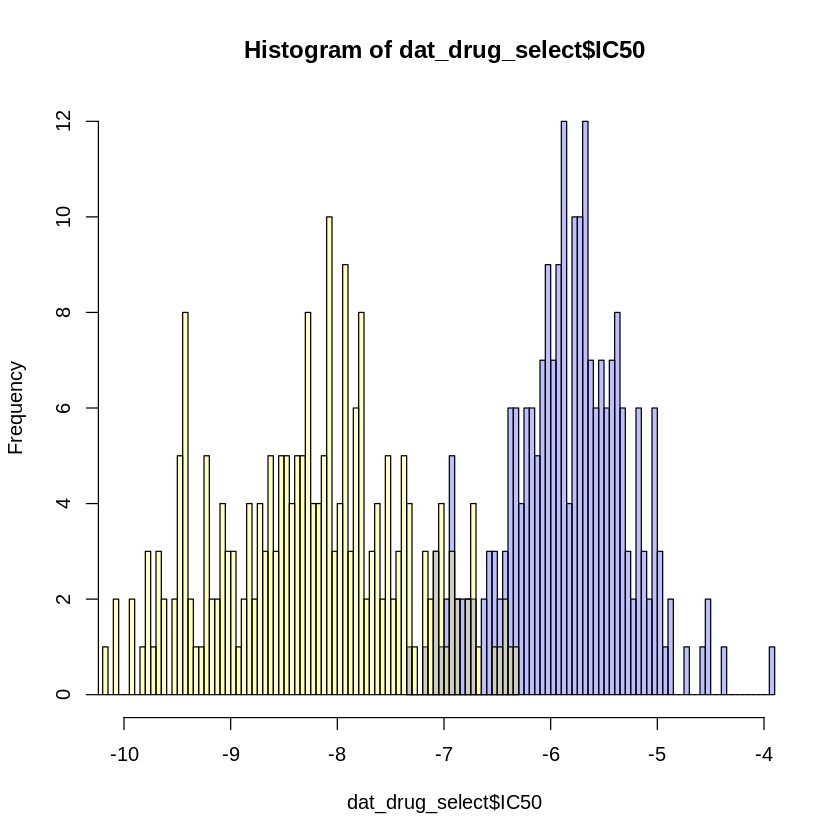

In [ ]:
#dat_drug_select[which(dat_drug_select[,"AUC"]>0.9),]
#hist(dat_drug_select$delta,breaks=100)

p1=hist(dat_drug_select$IC50,breaks=100)
p2=hist(dat_drug_select$IC50_from_depmap,breaks=100)

plot(p1,col=rgb(0,0,1,1/4),xlim=c(-10,-4)) 
plot(p2,col=rgb(1,1,0,1/4),add=T)  # second

,Drug,ID,slope,SE,pvalue
,<fct>,<fct>,<fct>,<fct>,<fct>
re,camptothecin (GDSC2,1003,-0.0652308372770261,0.00768202557330482,2.38101261624333e-15
re.1,vinblastine (GDSC2,1004,-0.0753099020222673,0.00706680357068618,6.63327536074015e-23
re.2,cisplatin (GDSC2,1005,0.0315107324986085,0.0188961109021907,0.0980740668613171
re.3,cytarabine (GDSC2,1006,-0.144718534721582,0.0215047835494184,4.18111047437926e-10
re.4,docetaxel (GDSC2,1007,-0.026249955864021,0.00764790554564137,0.000711608741407766
re.5,navitoclax (GDSC2,1011,-0.0348064733811432,0.0135330566937403,0.0104698769609873


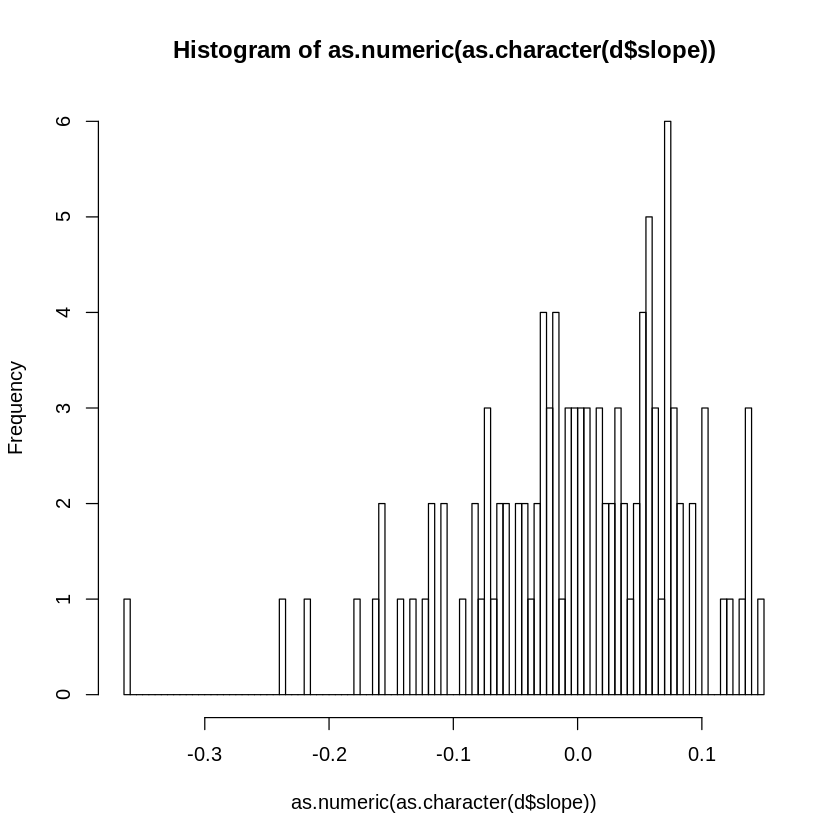

In [ ]:
#auto run
d=NULL
for (i in 1:ncol(dat_drug)){
#or (i in 1:5){
    drug_ID=strsplit(colnames(dat_drug)[i],":")[[1]][2]
    #drug_ID
    dat_drug_select=subset(dat_GDSC,DepMap_ID %in% CL & `Drug ID`==drug_ID)
    #ensure same order, then we can minor directly
    dat_drug_select=cbind(dat_drug_select[,c("DepMap_ID","Drug Name","Drug ID","IC50","AUC")],dat_drug[dat_drug_select$DepMap_ID,i])
    colnames(dat_drug_select)[ncol(dat_drug_select)]="IC50_from_depmap"
    dat_drug_select=na.omit(dat_drug_select)
    if(nrow(dat_drug_select)<20){next }
    dat_drug_select$IC50=as.numeric(as.character(dat_drug_select$IC50))  #numeric
    dat_drug_select$AUC=as.numeric(as.character(dat_drug_select$AUC))   #numeric
    dat_drug_select$delta=abs(dat_drug_select$IC50 - dat_drug_select$IC50_from_depmap)

    #check AUC and delta correlation
    #cor(dat_drug_select$delta,dat_drug_select$AUC,method="pearson")
    income.happiness.lm <- lm(AUC ~ delta, data = dat_drug_select)
    #summary(income.happiness.lm)[[4]][2,][[2]]
    slope=summary(income.happiness.lm)[[4]][2,][[1]]  #slope/delta Estimate, negative shows negative correltion between delta and AUC
    SE=summary(income.happiness.lm)[[4]][2,][[2]]
    pvalue=summary(income.happiness.lm)[[4]][2,][[4]]
    re=c(strsplit(colnames(dat_drug)[i],":")[[1]][1],drug_ID,slope,SE,pvalue)
    d=rbind(d,re)
    } 

d=as.data.frame(d)
colnames(d)=c("Drug","ID","slope","SE","pvalue")
head(d)
hist(as.numeric(as.character(d$slope)),breaks=100)
write.csv(d,file="out_doc/AUC_drug_GDSC2.csv",quote=F,row.names=F)

In [9]:
# PCA see if any disease-specific

head(dat_rna)
dim(dat_rna)

head(dat_metab)
dim(dat_metab)

head(dat_m_rna)
dim(dat_m_rna)

,SCYL3,C1orf112,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,LAS1L,ENPP4,⋯,FMC1-LUC7L2,ZNF559-ZNF177,NCBP2AS2,SRXN1,GTF2H5,NUDT3,KMT2B,ATP6V1FNB,C2orf15,SNURF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1_PROSTATE,0.989,1.389,-1.097,1.739,2.074,1.580,0.708,1.600,1.614,1.091,⋯,1.166,-0.409,1.387,1.600,0.829,1.041,0.760,0.053,0.662,1.999
2313287_STOMACH,1.224,1.125,-0.638,2.233,1.968,1.270,1.178,1.463,1.414,1.204,⋯,0.544,-0.770,1.136,2.232,0.403,1.166,0.550,-0.367,0.930,-0.495
253JBV_URINARY_TRACT,0.412,1.036,-1.222,1.488,1.346,1.156,0.661,0.900,1.991,0.562,⋯,1.501,-0.108,1.569,2.304,0.637,1.009,0.544,-0.102,0.158,1.922
253J_URINARY_TRACT,0.512,0.721,-0.553,1.654,1.289,0.898,0.566,1.004,1.810,0.585,⋯,1.478,0.305,1.341,1.982,0.592,0.701,0.574,-0.328,-0.319,1.832
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.436,0.967,-0.347,1.727,0.922,1.184,1.046,1.602,1.467,0.422,⋯,1.168,0.134,1.207,1.657,0.758,0.909,0.720,-0.638,-0.886,1.941
5637_URINARY_TRACT,0.493,1.500,0.297,1.857,0.989,1.170,0.927,1.158,1.781,0.572,⋯,0.787,-0.155,0.940,1.598,0.565,0.728,0.649,-0.469,0.479,1.695


[1]  1019 13403

,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,AMP,citrate,⋯,C56:8-TAG,C56:7-TAG,C56:6-TAG,C56:5-TAG,C56:4-TAG,C56:3-TAG,C56:2-TAG,C58:8-TAG,C58:7-TAG,C58:6-TAG
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DMS53_LUNG,6.112727,6.034198,5.896896,6.000532,5.513618,5.868529,5.977177,5.693074,5.923737,5.641242,⋯,6.070239,6.133433,6.091089,6.257711,6.372732,6.202511,5.939576,6.309821,6.115974,5.999436
SW1116_LARGE_INTESTINE,5.577413,5.727045,5.111468,6.073250,5.802494,5.824473,5.888821,5.768379,5.760784,5.914742,⋯,6.248653,6.633575,6.378052,6.341043,6.360945,6.333540,6.137271,7.065858,6.832174,6.363064
NCIH1694_LUNG,5.886398,5.574881,5.541259,5.848375,5.665026,5.875548,5.894904,5.839640,5.742613,5.570208,⋯,5.942887,5.946988,5.837980,5.913350,6.137530,5.807546,5.704149,5.881193,5.785208,5.504225
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,5.770030,6.099229,6.233259,5.543495,5.767759,6.155905,6.111148,5.949481,6.342703,6.054781,⋯,6.516922,6.113791,6.282113,6.248667,6.109480,6.043570,5.846802,6.429402,5.779815,6.241530
HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,5.480683,5.469742,6.509397,6.251005,5.190578,5.897085,6.148333,5.607481,5.871600,5.128463,⋯,6.161981,6.777932,6.676390,6.695659,6.751029,6.385056,6.682612,6.757899,6.728570,6.879260
UMUC3_URINARY_TRACT,5.892011,6.039330,6.309562,5.645860,5.501537,5.975171,5.907445,5.180048,7.005265,5.435565,⋯,5.906705,6.472323,6.298740,6.348706,6.211220,6.492331,6.770051,6.176431,6.353418,6.320354


[1] 928 225

,growth_properties,SampleType,Pathology,tcga_code,FBS.,Cell_culture_media,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,⋯,FMC1-LUC7L2,ZNF559-ZNF177,NCBP2AS2,SRXN1,GTF2H5,NUDT3,KMT2B,ATP6V1FNB,C2orf15,SNURF
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1_PROSTATE,Adherent,tissue_cell,primary,PRAD,10,RPMI_1640,5.547539,5.659418,6.114839,5.810150,⋯,1.166,-0.409,1.387,1.600,0.829,1.041,0.760,0.053,0.662,1.999
253J_URINARY_TRACT,Adherent,tissue_cell,primary,BLCA,10,DMEM,5.938332,6.217637,6.075923,5.724395,⋯,1.478,0.305,1.341,1.982,0.592,0.701,0.574,-0.328,-0.319,1.832
42MGBA_CENTRAL_NERVOUS_SYSTEM,Adherent,tissue_cell,primary,GBM,20,RPMI:EMEM=1:1,6.499377,5.809524,5.894139,6.059084,⋯,1.168,0.134,1.207,1.657,0.758,0.909,0.720,-0.638,-0.886,1.941
5637_URINARY_TRACT,Adherent,tissue_cell,primary,BLCA,10,RPMI_1640,6.006471,6.261695,5.259940,5.946824,⋯,0.787,-0.155,0.940,1.598,0.565,0.728,0.649,-0.469,0.479,1.695
59M_OVARY,Adherent,tissue_cell,metastasis,OV,10,DMEM,5.963412,5.849547,5.211138,6.190265,⋯,0.822,-0.585,1.231,1.657,1.055,0.888,0.631,-1.301,-0.824,1.792
639V_URINARY_TRACT,Adherent,tissue_cell,primary,BLCA,10,DMEM,6.339798,6.075754,6.670431,5.875871,⋯,1.568,0.752,1.620,1.858,0.731,1.140,0.773,-0.398,0.272,1.870


[1]   454 13634

## check drug sensitive vs metabolite level (no-linear relationship)

In [ ]:
#merge_data
dat_m_d=merge(dat_metab,dat_drug,by="row.names")
row.names(dat_m_d)=dat_m_d[,1]
dat_m_d=dat_m_d[,-1]
head(dat_m_d)
dim(dat_m_d)

,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,AMP,citrate,⋯,Salubrinal,Dasatinib,XMD8-85,Roscovitine,Lapatinib,Cyclopamine,VX-680,JW-7-52-1,Erlotinib,Rapamycin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1_PROSTATE,5.547539,5.659418,6.114839,5.810150,5.612744,5.369948,6.048934,5.837086,5.888352,5.658584,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42MGBA_CENTRAL_NERVOUS_SYSTEM,6.499377,5.809524,5.894139,6.059084,5.919897,5.923749,6.113998,5.989605,5.793290,5.891411,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5637_URINARY_TRACT,6.006471,6.261695,5.259940,5.946824,5.784186,6.064433,5.593339,5.830088,5.645612,5.844549,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
639V_URINARY_TRACT,6.339798,6.075754,6.670431,5.875871,6.362974,5.833013,5.535336,5.880482,5.922362,6.266865,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,5.368205,5.507812,6.434076,5.755874,5.661045,6.122270,5.571461,5.852753,6.862951,5.774462,⋯,0.81,-1.51,-0.56,2.15,2.21,2.82,-4.12,-3.6,0.69,-5.32
769P_KIDNEY,5.426638,5.986048,6.189449,5.759186,5.907630,6.195218,5.734397,5.970101,6.138780,5.928789,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 370 490

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”


RMSE,R2,NumberOfNAData
<dbl>,<dbl>,<int>
0.9775426,0.013,270


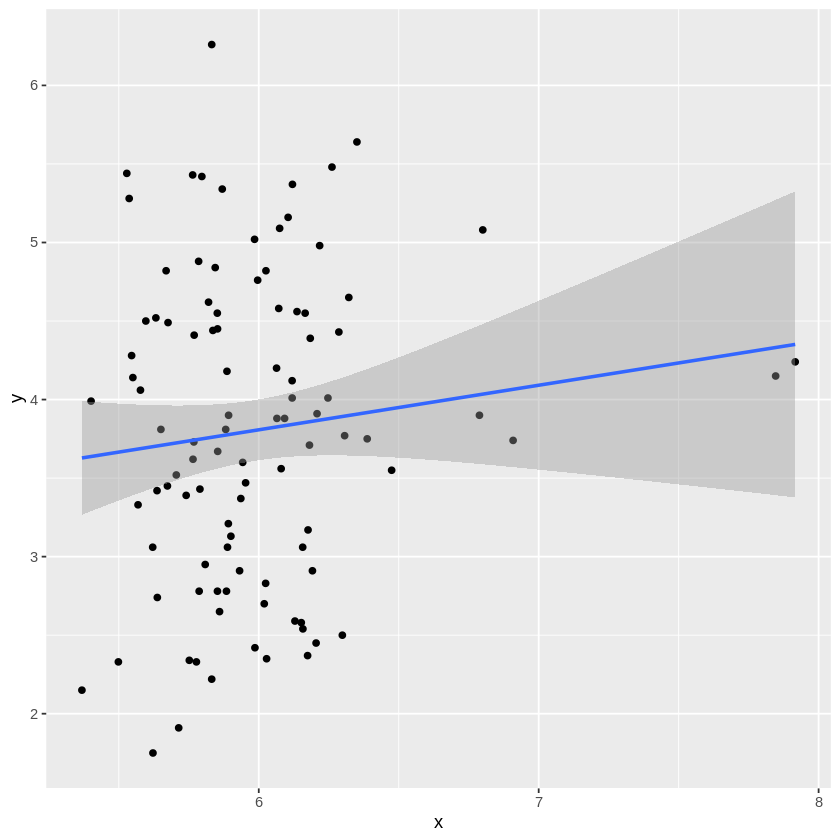

In [ ]:
#GAM
library(mgcv)
library(ggplot2)
RMSE = function(y_predicted,y){sqrt(mean((y - y_predicted)^2))}
R2=function(y_predicted,y){
    round(1 - sum((y_predicted - y)^2) / sum((y - mean(y))^2),3)
}

## remove NA cell lines
y_name="Roscovitine"
x=dat_m_d[,"2-aminoadipate"]
y=as.numeric(as.character(dat_m_d[,y_name]))
tmp=as.data.frame(cbind(y,x))
non_NA <- !is.na(tmp[,"y"])
tmp<-tmp[non_NA,]
y=y[non_NA]

model.gam <- gam(y ~ s(x), data = tmp)
#summary(model.gam)
pr.gam <- predict(model.gam,tmp)
z=table(non_NA)[["FALSE"]]
pr.gam[is.na(pr.gam)] <- 0
data.frame(RMSE = RMSE(pr.gam, y),R2 = R2(pr.gam, y),NumberOfNAData=z)
ggplot(tmp, aes(x, y) ) +geom_point() +stat_smooth(method = gam, formula = y ~ s(x))


In [ ]:
i=12
#j=105
RMSE = function(y_predicted,y){sqrt(mean((y - y_predicted)^2))}
R2=function(y_predicted,y){
    round(1 - sum((y_predicted - y)^2) / sum((y - mean(y))^2),3)
}

y_name=colnames(dat_drug)[i]
y=dat_m_d[,y_name]

  
    #GAM<-lapply(1:ncol(dat_metab),function(j){
    GAM<-lapply(100:110,function(j){
    x_name=colnames(dat_metab)[j]
    x=dat_m_d[,x_name]
    tmp=as.data.frame(cbind(y,x))
    non_NA <- !is.na(tmp[,"y"])
    tmp<-tmp[non_NA,]
    y=y[non_NA]
    SD = sd(y)
    SD
    NumberOfMissingData=table(non_NA)[["FALSE"]]
    if(SD<0.02){    
        RMSE = 0
        R2 = 0
    } else {
        model.gam <- gam(y ~ s(x), data = tmp)
    #summary(model.gam)
    pr.gam <- predict(model.gam,tmp)
    RMSE = RMSE(pr.gam, y)
    R2 = R2(pr.gam, y)
        }

        
    #plotname=paste('GAM_plot/',y_name,'_',x_name,'.jpg',sep="")
    #jpeg(plotname)
    #ggplot(tmp, aes(x, y) ) +geom_point() +stat_smooth(method = gam, formula = y ~ s(x))
    #dev.off()
        
    re<-c(y_name,x_name,RMSE,R2,NumberOfMissingData,SD)
    re
    return(re)
        
        })
d<-do.call(rbind, GAM)
head(d)

GW-2580,alpha-glycerophosphocholine,0.613323805689693,0.008,15,0.616540456224
GW-2580,acetylcholine,0.615224800458999,0.001,15,0.616540456224
GW-2580,creatine,0.612281505584915,0.011,15,0.616540456224
GW-2580,creatinine,0.587572755057496,0.089,15,0.616540456224
GW-2580,thyroxine,0.600311383126436,0.049,15,0.616540456224
GW-2580,trimethylamine-N-oxide,0.572569760728359,0.135,15,0.616540456224


Warning message in rbind(dd, d):
“number of columns of result is not a multiple of vector length (arg 1)”


,Tested_drugs,Metabolite,RMSE,R2,#NAData,SD,Average
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
X.13952,VNLG/124,alpha-glycerophosphate,0.759905406736488,0.352,16,0.945,3.86
X.51182,Imatinib,thymidine,0.964831883548145,0.345,263,1.2,2.71
X.50985,Crizotinib,anserine,0.915585556900808,0.341,263,1.13,2.32
X.53844,Pyrimethamine,lysine,1.20131473341975,0.337,267,1.48,3.57
X.57898,XMD8-85,phenylalanine,0.91339114447878,0.335,269,1.13,2.54


$breaks
 [1] 0.000 0.005 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055
[13] 0.060 0.065 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115
[25] 0.120 0.125 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175
[37] 0.180 0.185 0.190 0.195 0.200 0.205 0.210 0.215 0.220 0.225 0.230 0.235
[49] 0.240 0.245 0.250 0.255 0.260 0.265 0.270 0.275 0.280 0.285 0.290 0.295
[61] 0.300 0.305 0.310 0.315 0.320 0.325 0.330 0.335 0.340 0.345 0.350 0.355

$counts
 [1] 16733  6467  5132  4190  3567  3134  2638  2207  2056  1664  1357  1237
[13]  1088   946   826   707   606   529   494   443   376   338   298   297
[25]   241   240   207   161   153   144   148   127   120    89    89    85
[37]    69    61    47    54    28    31    39    25    17    17    14    13
[49]     8     5     8     9     9     5     6     4     3     3     3     1
[61]     3     1     0     2     0     1     1     1     2     0     1

$density
 [1] 56.127463312 21.692243187 17.214255765 14.05450733

Warning message in rbind(dd, d):
“number of columns of result is not a multiple of vector length (arg 1)”


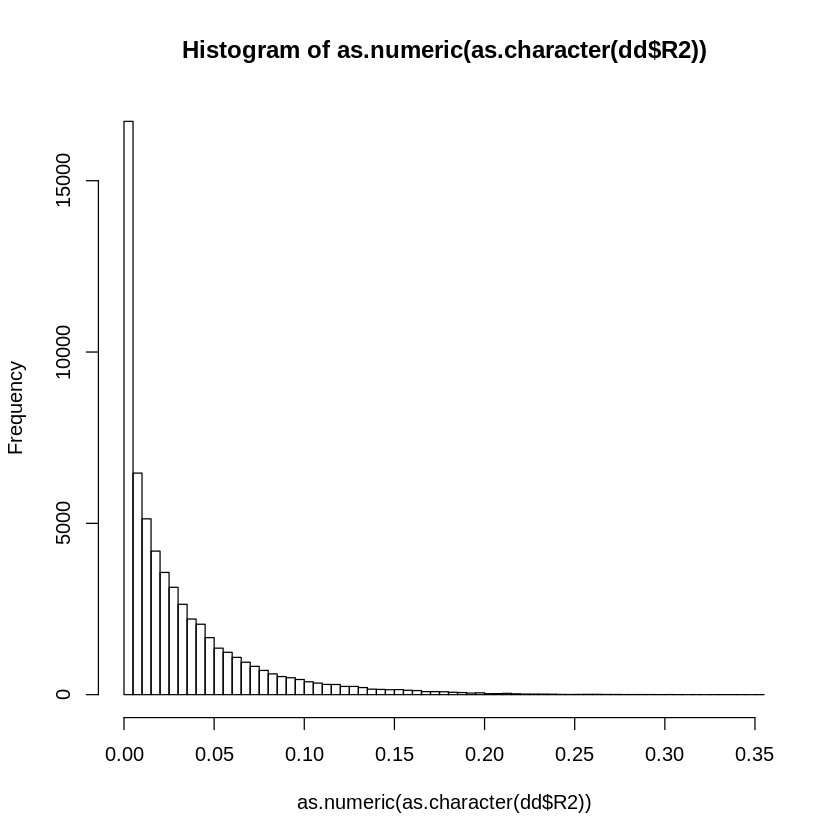

$breaks
 [1] 0.000 0.005 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055
[13] 0.060 0.065 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115
[25] 0.120 0.125 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175
[37] 0.180 0.185 0.190 0.195 0.200 0.205 0.210 0.215 0.220 0.225 0.230 0.235
[49] 0.240 0.245 0.250 0.255 0.260 0.265 0.270 0.275 0.280 0.285 0.290 0.295
[61] 0.300 0.305 0.310 0.315 0.320 0.325 0.330 0.335 0.340 0.345 0.350 0.355
[73] 0.360 0.365 0.370 0.375 0.380 0.385 0.390

$counts
 [1] 31422  8241  5055  3508  2471  1892  1420  1076   857   651   542   422
[13]   321   235   180   146   138   137    99    92    90    59    59    55
[25]    46    50    34    40    36    31    19    22    20    17    20    13
[37]    16    17     8     6     6     8     2     2     1     7     3     3
[49]     3     6     1     2     1     2     2     3     0     1     1     1
[61]     1     0     0     2     1     1     0     0     0     0     0     0
[73]     1  

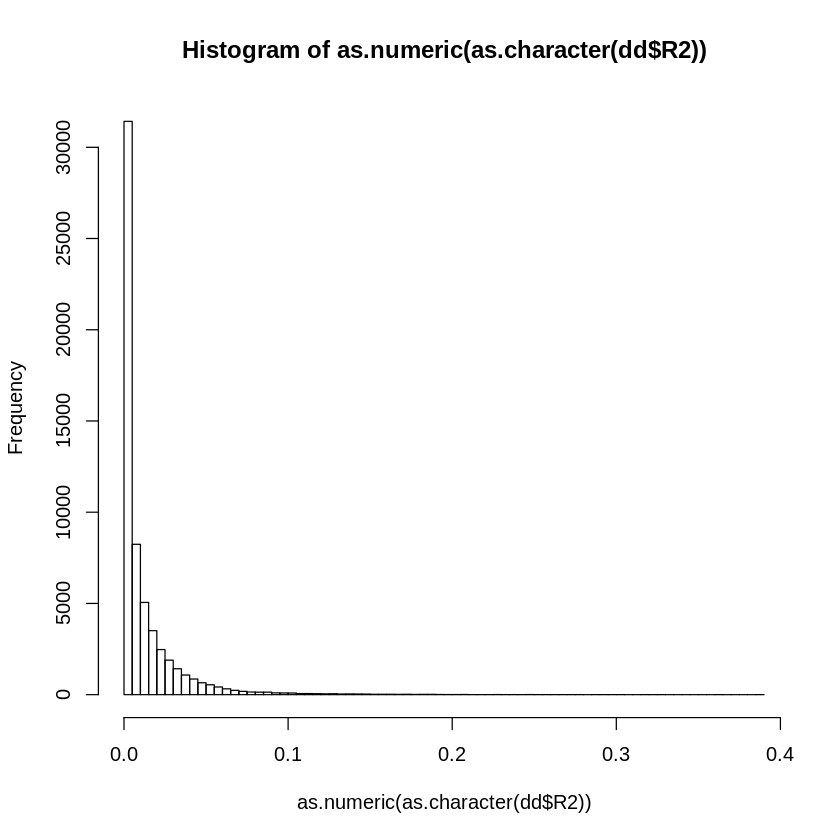

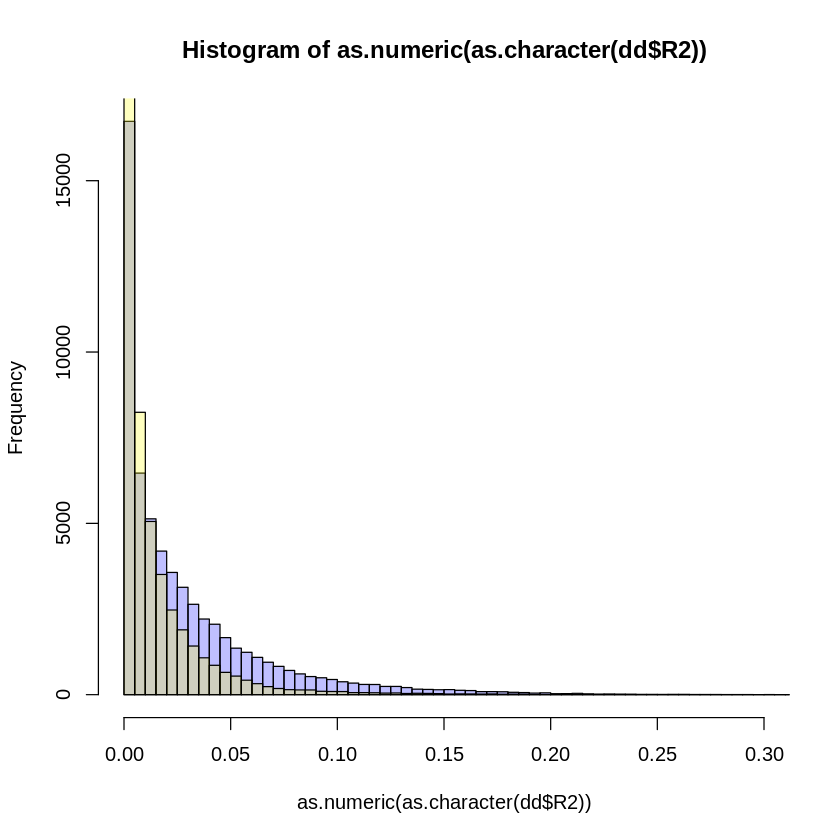

In [ ]:
#auto process
##GAM

library(mgcv)
library(ggplot2)
RMSE = function(y_predicted,y){sqrt(mean((y - y_predicted)^2))}
R2=function(y_predicted,y){
    round(1 - sum((y_predicted - y)^2) / sum((y - mean(y))^2),3)
}

seed =1007
re=0
d=c("0","0")
dd=c("0","0")
for (i in 1:ncol(dat_drug)){
#for (i in 1:3){
y_name=colnames(dat_drug)[i]
y=dat_m_d[,y_name]

  
    GAM<-lapply(1:ncol(dat_metab),function(j){
    #GAM<-lapply(1:2,function(j){
    x_name=colnames(dat_metab)[j]
    x=dat_m_d[,x_name]
    tmp=as.data.frame(cbind(y,x))
    non_NA <- !is.na(tmp[,"y"])
    NumberOfMissingData=table(non_NA)[["FALSE"]]
    tmp<-tmp[non_NA,]
    y=y[non_NA]
    
    #highly similar list doesnot work in GAM
    SD=signif(sd(y),3)
    avg=signif(mean(y),3)
    if(SD<0.02){    
        RMSE = 0
        R2 = 0
    } else {
        model.gam <- gam(y ~ s(x), data = tmp)
        pr.gam <- predict(model.gam,tmp)
        RMSE = RMSE(pr.gam, y)
        R2 = R2(pr.gam, y)
        }
        
    #plotname=paste('GAM_plot/',y_name,'_',x_name,'.jpg',sep="")
    #jpeg(plotname)
    #ggplot(tmp, aes(x, y) ) +geom_point() +stat_smooth(method = gam, formula = y ~ s(x))
    #dev.off()
        
    re<-c(y_name,x_name,RMSE,R2,NumberOfMissingData,SD,avg)
    return(re)
    } )

d<-do.call(rbind, GAM)
dd=rbind(dd,d)
}

dd<-as.data.frame(dd[-1,])
colnames(dd)<-c("Tested_drugs","Metabolite","RMSE","R2","#NAData","SD","Average")
dd<-dd[order(dd[,4],decreasing=TRUE),]
dd[1:5,]
#save(dd,file="GAM_dd.RData")
#write.csv(dd,file="out_doc/GAM_drug_metab_IC50.csv",quote=F,row.names=F)
p1=hist(as.numeric(as.character(dd$R2)),breaks=100)
p1

####################################################################################################################
#permutation test   adding y=y[sample(1:length(y),length(y))]  
re=0
d=c("0","0")
dd=c("0","0")
for (i in 1:ncol(dat_drug)){
#for (i in 1:3){
y_name=colnames(dat_drug)[i]
y=dat_m_d[,y_name]
y=y[sample(1:length(y),length(y))]    #shuffle y

  
    GAM<-lapply(1:ncol(dat_metab),function(j){
    #GAM<-lapply(1:2,function(j){
    x_name=colnames(dat_metab)[j]
    x=dat_m_d[,x_name]
    tmp=as.data.frame(cbind(y,x))
    non_NA <- !is.na(tmp[,"y"])
    NumberOfMissingData=table(non_NA)[["FALSE"]]
    tmp<-tmp[non_NA,]
    y=y[non_NA]    #remove missing data in y
    
    #highly similar list doesnot work in GAM
    SD=signif(sd(y),3)
    avg=signif(mean(y),3)
    if(SD<0.02){    
        RMSE = 0
        R2 = 0
    } else {
        model.gam <- gam(y ~ s(x), data = tmp)
        pr.gam <- predict(model.gam,tmp)
        RMSE = RMSE(pr.gam, y)
        R2 = R2(pr.gam, y)
        }
        
    #plotname=paste('GAM_plot/',y_name,'_',x_name,'.jpg',sep="")
    #jpeg(plotname)
    #ggplot(tmp, aes(x, y) ) +geom_point() +stat_smooth(method = gam, formula = y ~ s(x))
    #dev.off()
        
    re<-c(y_name,x_name,RMSE,R2,NumberOfMissingData,SD,avg)
    return(re)
    } )

d<-do.call(rbind, GAM)
dd=rbind(dd,d)
}

dd<-as.data.frame(dd[-1,])
colnames(dd)<-c("Tested_drugs","Metabolite","RMSE","R2","#NAData","SD","Average")
dd<-dd[order(dd[,4],decreasing=TRUE),]
p2=hist(as.numeric(as.character(dd$R2)),breaks=100)
p2

plot(p1,col=rgb(0,0,1,1/4),xlim=c(0,0.3)) 
plot(p2,col=rgb(1,1,0,1/4),add=T)  # second


,Tested_drugs,Metabolite,Pvalue,R2,SD,Average
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
X.19241,BMS-536924,butyrobetaine,0.251,9e-04,1.11,-1.22
X.26367,CCT018159,UMP,0.253,9e-04,0.992,-1.97
X.31877,LFM-A13,C32:0-PC,0.253,9e-04,0.71,-3.62
X.36404,Cetuximab,C36:2-DAG,0.255,9e-04,1.03,-4.97
X.50386,QL-XII-61,C54:4-TAG,0.286,9e-04,1.16,-3.01


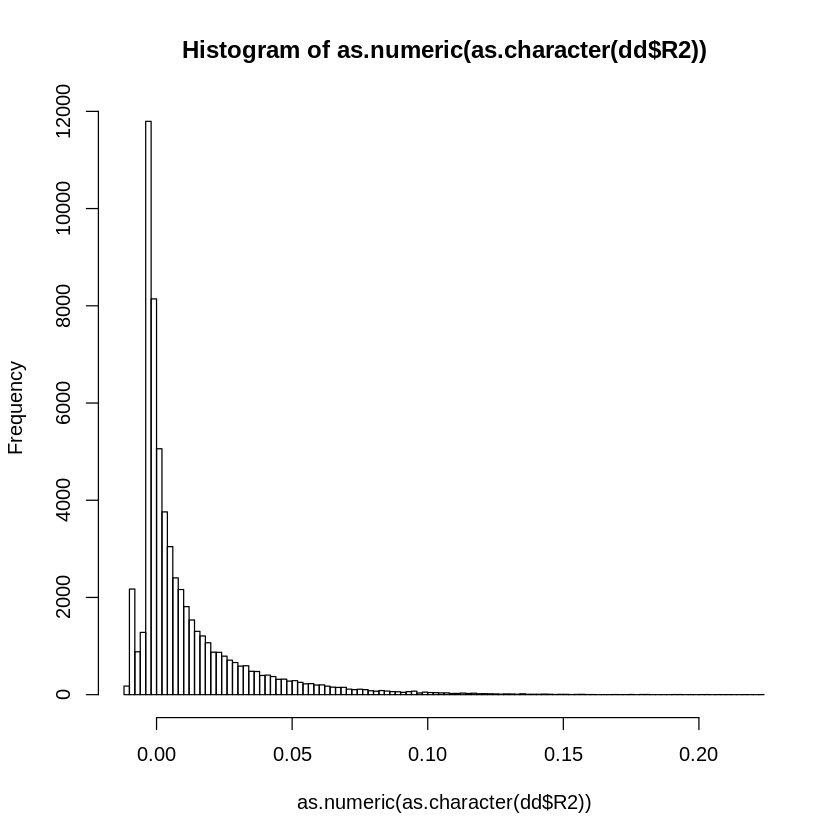

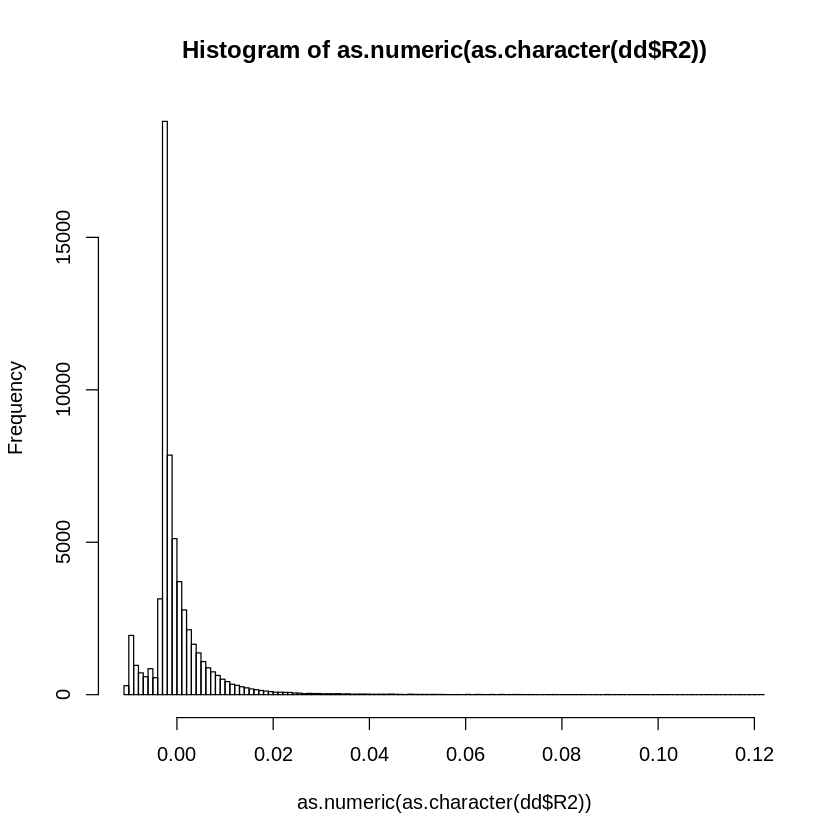

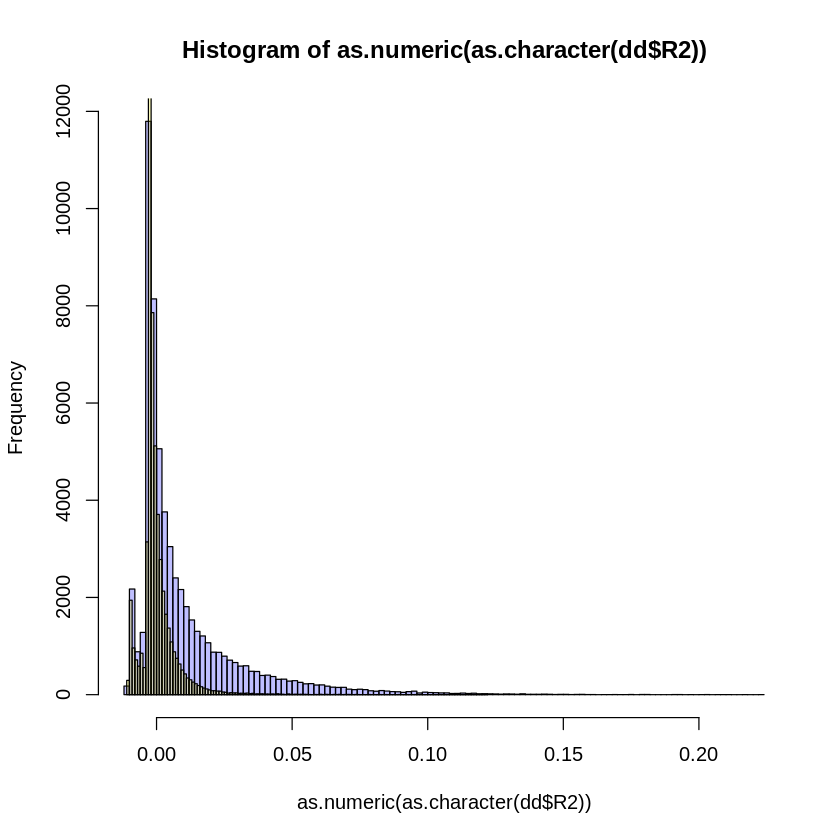

In [ ]:
##LR

dd=c("0","0")
for (i in 1:ncol(dat_drug)){
#for (i in 2:3){
y_name=colnames(dat_drug)[i]
#y_name="1-methylnicotinamide"
y=dat_m_d[,y_name]
non_NA <- !is.na(y)
y=1-y[non_NA]  #calculate ActArea value
 
lr<-lapply(1:ncol(dat_metab),function(j){
    x_name=colnames(dat_metab)[j]
    x=dat_m_d[non_NA,x_name]
    fit=lm(y~x)
    pvalue=signif(anova(fit)["x",5],3)  #univariant, pvalue at pos 2
    ar2=signif(summary(fit)$adj.r.square,3)
    SD=signif(sd(y),3)
    avg=signif(mean(y),3)
    re<-c(y_name,x_name,pvalue,ar2,SD,avg)
    return(re)
  } )

d<-do.call(rbind, lr)
dd=rbind(dd,d)
}

dd<-as.data.frame(dd[-1,])
colnames(dd)<-c("Tested_drugs","Metabolite","Pvalue","R2","SD","Average")
dd<-dd[order(dd[,4],decreasing=TRUE),]
dd[1:5,]
save(dd,file="LR_dd.RData")
write.csv(dd,file="out_doc/LR_drug_metab_IC50.csv",quote=F,row.names=F)
p3=hist(as.numeric(as.character(dd$R2)),breaks=100)

##############################################################################################################
#permutation test
dd=c("0","0")
for (i in 1:ncol(dat_drug)){
#for (i in 2:3){
y_name=colnames(dat_drug)[i]
#y_name="1-methylnicotinamide"
y=dat_m_d[,y_name]
non_NA <- !is.na(y)
y=1-y[non_NA]  #calculate ActArea value
y=y[sample(1:length(y),length(y))]    #shuffle y
    
lr<-lapply(1:ncol(dat_metab),function(j){
    x_name=colnames(dat_metab)[j]
    x=dat_m_d[non_NA,x_name]
    fit=lm(y~x)
    pvalue=signif(anova(fit)["x",5],3)  #univariant, pvalue at pos 2
    ar2=signif(summary(fit)$adj.r.square,3)
    SD=signif(sd(y),3)
    avg=signif(mean(y),3)
    re<-c(y_name,x_name,pvalue,ar2,SD,avg)
    return(re)
  } )

d<-do.call(rbind, lr)
dd=rbind(dd,d)
}

dd<-as.data.frame(dd[-1,])
colnames(dd)<-c("Tested_drugs","Metabolite","Pvalue","R2","SD","Average")
dd<-dd[order(dd[,4],decreasing=TRUE),]
p4=hist(as.numeric(as.character(dd$R2)),breaks=100)

plot(p3,col=rgb(0,0,1,1/4))  #,xlim=c(-0.2,0.2)
plot(p4,col=rgb(1,1,0,1/4),add=T)  # second

## Drug sensitive classification

### check sensitive / resistant ratio

In [ ]:
#CELL 2016, 1001 CL ~ 265 drugs, recoding binarization threshold for each drug.
dat_bi=as.data.frame(read.table("dat/CELL_1001CL_265_anticancer_drugs_binary.csv",sep=",",check.names = FALSE,row.names=1,header=T,stringsAsFactors=F))
dat_bi=as.data.frame(dat_bi[-1,])

#Convert to CCLE ID; CCLE ID & GDSC 1000 panel
name_t=as.data.frame(read.table("dat/CCLE_GDSC_CosmicID_transfer.txt",row.names=2,header=T,stringsAsFactors=F))
#head(name_t)
#sample size  387 CCLE CL  ~ 265 drugs
dat_bi=merge(name_t,dat_bi,by="row.names")
row.names(dat_bi)=dat_bi[,"CCLE_name"]
dat_bi=dat_bi[,-c(1,2,3)]
#head(dat_bi)


#head(dat_bi)
#table(dat_bi[,1])
count=as.data.frame(t(apply(dat_bi,2,table)))
colnames(count)=c("#NA","#Resistant","#Sensitive")
count$ratio=signif(count$`#Sensitive`/(count$`#Resistant`+count$`#Sensitive`),3)
count=count[order(count[,"ratio"],decreasing=TRUE),]
count[1:10,]
sum(count$`#Resistant` == 0)
sum(count$`#Sensitive` == 0)
hist(count$ratio,breaks=100,xlim=c(0,0.6))

Warning message in file(file, "rt"):
“cannot open file 'dat/CELL_1001CL_265_anticancer_drugs_binary.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


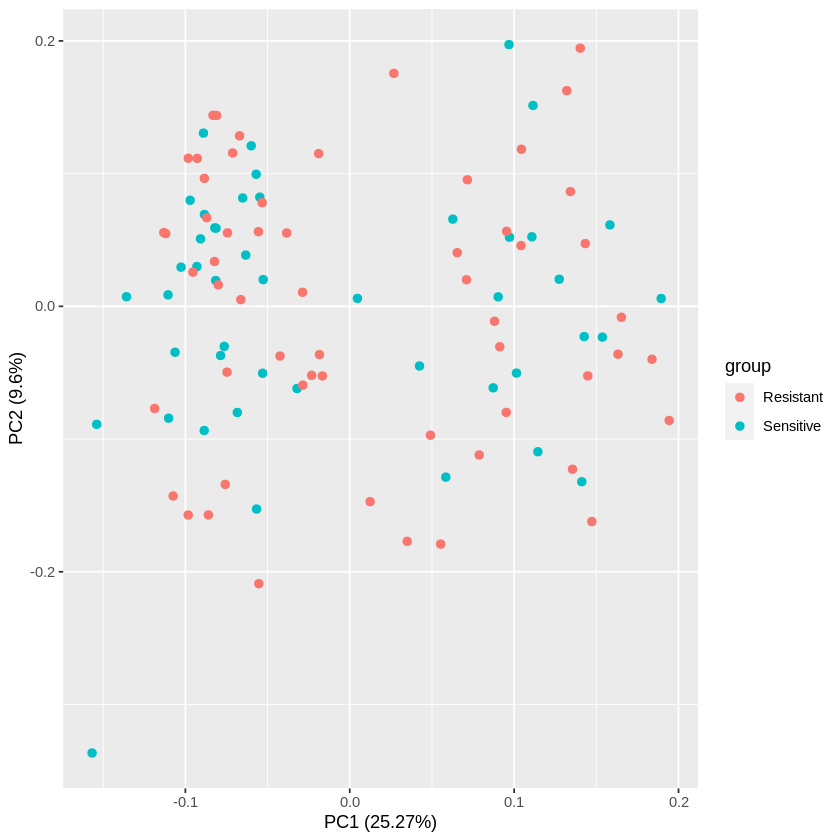

In [ ]:
#check R group and S group metabolism pattern difference
S_Group=dat_metab[row.names(dat_metab) %in% row.names(dat_bi[which(dat_bi$`A-770041`=="S"),]),]
S_Group$group="Sensitive"
R_Group=dat_metab[row.names(dat_metab) %in% row.names(dat_bi[which(dat_bi$`A-770041`=="R"),]),]
R_Group$group="Resistant"
dat_RS=rbind(S_Group,R_Group)
#head(dat_RS)

library(ggfortify)
# apply PCA - scale. = TRUE is highly advisable, but default is FALSE. 
#par(mfcol=c(2,2))
out_pca <- prcomp(dat_RS[,-ncol(dat_RS)],scale= TRUE)
#plot(out_pca,type="l")
autoplot(out_pca,data=dat_RS,colour='group',size=2,label=FALSE,label.size=1)

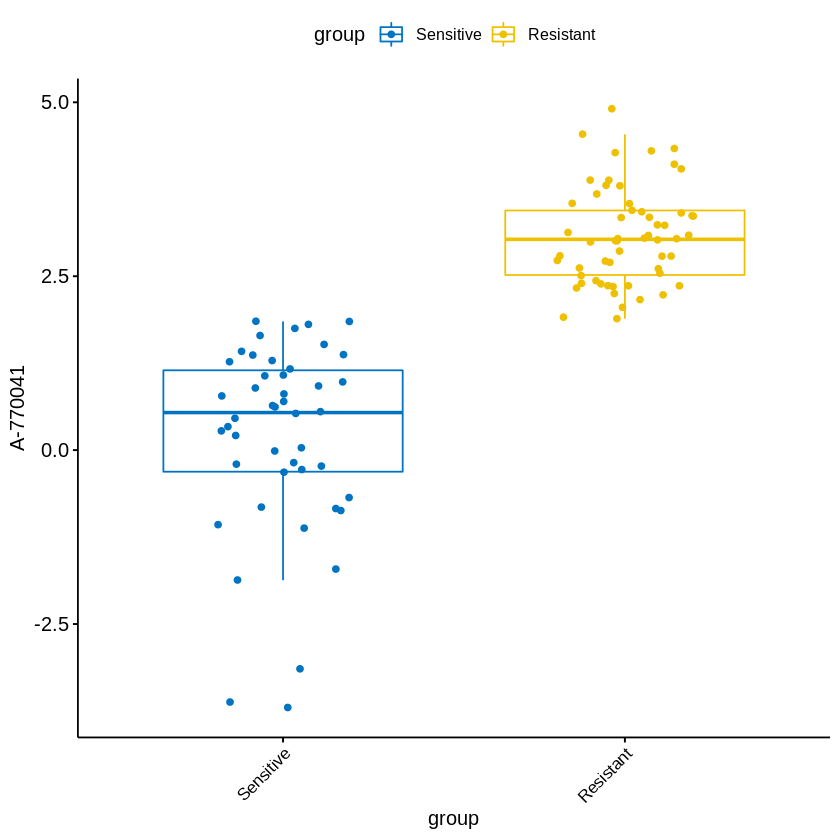

In [ ]:
#check R group and S group IC50 difference
# smaller IC50 means better(S group)
library(ggpubr)
p<-ggboxplot(merge(dat_drug,dat_RS,by="row.names"), x="group",y = "A-770041", color = "group",palette = "jco", add = "jitter")
p +theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,colour = "black", size = 10))

,avg_S_Group,avg_R_Group,logFC,pvalue,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
butyrobetaine,5.8305,5.2963,0.138641,0.04778139,None
GABA,6.1413,5.8328,0.074339,0.00087915,None
ornithine,5.9446,5.7603,0.045433,0.07826553,None
stearoylcarnitine,6.0459,5.8682,0.043033,0.17572272,None


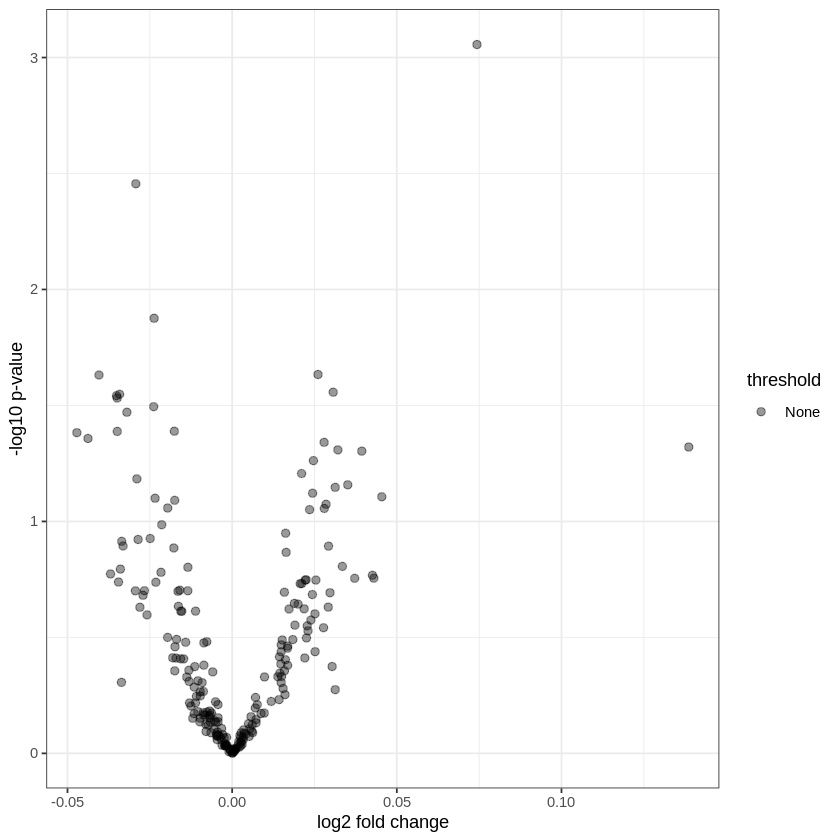

In [ ]:
options(scipen = 200)
options(digits=5)

ttest<-lapply(1:(ncol(S_Group)-1),function(x){     #"-1" exclude the $group in the last column
    r<-t.test(S_Group[,x],R_Group[,x],alternative = "two.sided")
    mt<-mean(S_Group[,x])
    mn<-mean(R_Group[,x])
    #herv<-colnames(tumor)[x]
    fc <- mt/mn
    
    re<-c(mt,mn,log(fc,base=2),r$p.value)
    return(re)
  } )

#plot
library("limma")
library("ggplot2")
library("dplyr")

d<-do.call(rbind, ttest)
d<-as.data.frame(d)
colnames(d)<-c("avg_S_Group","avg_R_Group","logFC","pvalue")
#d[is.na(d)]=-10
#plot(d$logFC,-log(d$pvalue,base = 10),pch=16,cex=0.8,xlim=c(-10,10))
logFC_cutoff=2

d<-d%>%mutate(threshold = ifelse(logFC >= logFC_cutoff,"Up", ifelse(logFC<=-2 , "Down", "None")))

ggplot(data=d, aes(x=logFC, y=-log10(pvalue))) +
  geom_point(alpha=0.4, size=2,aes(colour = threshold)) +
  scale_colour_manual(values = c("Up"= "red", "Down"="blue",  "None"= "black"))+
  theme(legend.position = "none") +
  theme_bw()+ 
  #ggtitle( this_tile ) +
  #xlim(c(-12, 12)) + ylim(c(0, 15)) +
  xlab("log2 fold change") + ylab("-log10 p-value")

row.names(d)<-colnames(S_Group)[-1]
d<-d[order(d[,3],decreasing=TRUE),]
d[1:4,]

### check Gene difference

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs pro

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs pro

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs pro

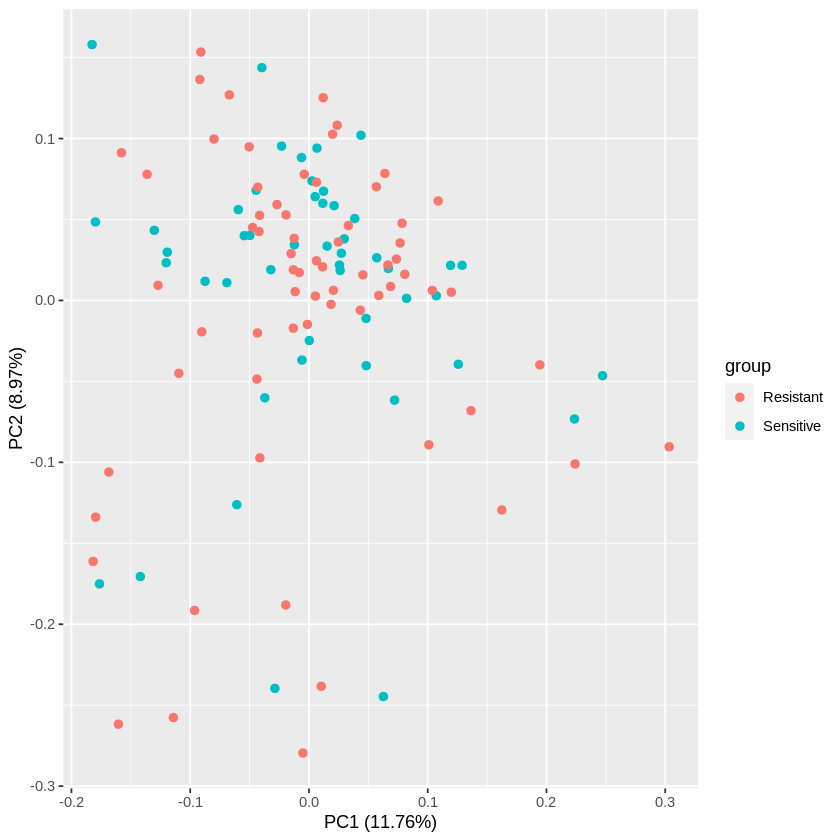

,avg_S_Group,avg_R_Group,logFC,pvalue,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
MIX23,-0.213184,-0.00170149,6.9692,0.135407,Up
SLC45A4,-0.522469,-0.00480597,6.7644,0.068037,Up
CFAP58,0.030327,0.00038806,6.2882,0.625279,Up
APOBEC3B,0.311612,0.00408955,6.2517,0.079051,Up
INAVA,-0.188224,-0.00352239,5.7398,0.374298,Up
PEX12,0.047816,0.00100000,5.5794,0.885203,Up
CDRT4,-0.263469,-0.00826866,4.9938,0.393098,Up
ZNF182,0.201000,0.00667164,4.9130,0.300034,Up
MADCAM1,0.109592,0.00402985,4.7653,0.622723,Up


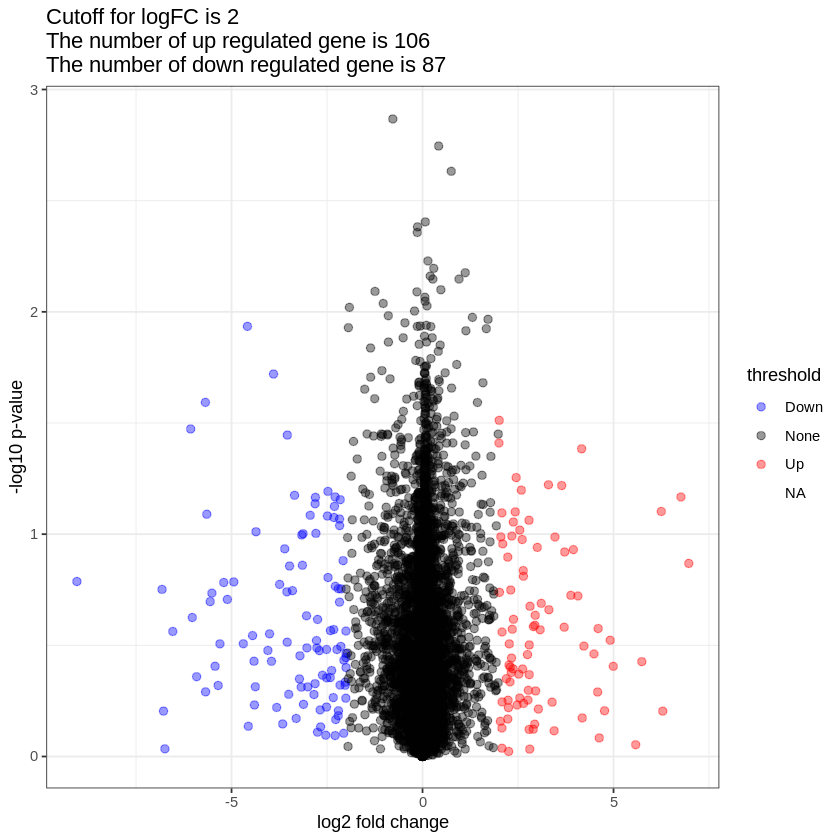

In [ ]:
#head(dat_rna)

#check R group and S group metabolism pattern difference
S_Group=dat_rna[row.names(dat_metab) %in% row.names(dat_bi[which(dat_bi$`A-770041`=="S"),]),]
S_Group$group="Sensitive"
R_Group=dat_rna[row.names(dat_metab) %in% row.names(dat_bi[which(dat_bi$`A-770041`=="R"),]),]
R_Group$group="Resistant"
dat_RS=rbind(S_Group,R_Group)
#head(dat_RS)

library(ggfortify)
# apply PCA - scale. = TRUE is highly advisable, but default is FALSE. 
#par(mfcol=c(2,2))
out_pca <- prcomp(dat_RS[,-ncol(dat_RS)],scale= TRUE)
#plot(out_pca,type="l")
autoplot(out_pca,data=dat_RS,colour='group',size=2,label=FALSE,label.size=1)


#volcano plot
options(scipen = 200)
options(digits=5)

ttest<-lapply(1:(ncol(S_Group)-1),function(x){     #"-1" exclude the $group in the last column
    r<-t.test(S_Group[,x],R_Group[,x],alternative = "two.sided")
    mt<-mean(S_Group[,x])
    mn<-mean(R_Group[,x])
    #herv<-colnames(tumor)[x]
    fc <- mt/mn
    
    re<-c(mt,mn,log(fc,base=2),r$p.value)
    return(re)
  } )

#plot
library("limma")
library("ggplot2")
library("dplyr")

d<-do.call(rbind, ttest)
d<-as.data.frame(d)
colnames(d)<-c("avg_S_Group","avg_R_Group","logFC","pvalue")

#plot(d$logFC,-log(d$pvalue,base = 10),pch=16,cex=0.8,xlim=c(-10,10))
logFC_cutoff=2

d<-d%>%mutate(threshold = ifelse(logFC >= logFC_cutoff,"Up", ifelse(logFC<=-2 , "Down", "None")))

this_tile <- paste0('Cutoff for logFC is ',round(logFC_cutoff,1),
                    '\nThe number of up regulated gene is ',table(d$threshold)[1] ,
                   '\nThe number of down regulated gene is ',table(d$threshold)[3])

ggplot(data=d, aes(x=logFC, y=-log10(pvalue))) +
  geom_point(alpha=0.4, size=2,aes(colour = threshold)) +
  scale_colour_manual(values = c("Up"= "red", "Down"="blue",  "None"= "black"))+
  theme(legend.position = "none") +
  theme_bw()+ 
  ggtitle( this_tile ) +
  #xlim(c(-12, 12)) + ylim(c(0, 15)) +
  xlab("log2 fold change") + ylab("-log10 p-value")

row.names(d)<-colnames(S_Group)[-1]
d<-d[order(d[,3],decreasing=TRUE),]
d[1:10,]

,growth_properties,SampleType,Pathology,tcga_code,FBS.,Cell_culture_media,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,⋯,Salubrinal,Dasatinib,XMD8-85,Roscovitine,Lapatinib,Cyclopamine,VX-680,JW-7-52-1,Erlotinib,Rapamycin
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1_PROSTATE,Adherent,tissue_cell,primary,PRAD,10,RPMI_1640,5.5475,5.6594,6.1148,5.8102,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42MGBA_CENTRAL_NERVOUS_SYSTEM,Adherent,tissue_cell,primary,GBM,20,RPMI:EMEM=1:1,6.4994,5.8095,5.8941,6.0591,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5637_URINARY_TRACT,Adherent,tissue_cell,primary,BLCA,10,RPMI_1640,6.0065,6.2617,5.2599,5.9468,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
639V_URINARY_TRACT,Adherent,tissue_cell,primary,BLCA,10,DMEM,6.3398,6.0758,6.6704,5.8759,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
769P_KIDNEY,Adherent,tissue_cell,primary,KIRC,10,RPMI_1640,5.4266,5.9860,6.1894,5.7592,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
786O_KIDNEY,Adherent,tissue_cell,primary,KIRC,10,RPMI_1640,5.6542,6.3709,5.9898,5.7705,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Warning message:
“Removed 186 rows containing non-finite values (stat_boxplot).”
Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 24.”
Warning message:
“Removed 203 rows containing missing values (geom_point).”


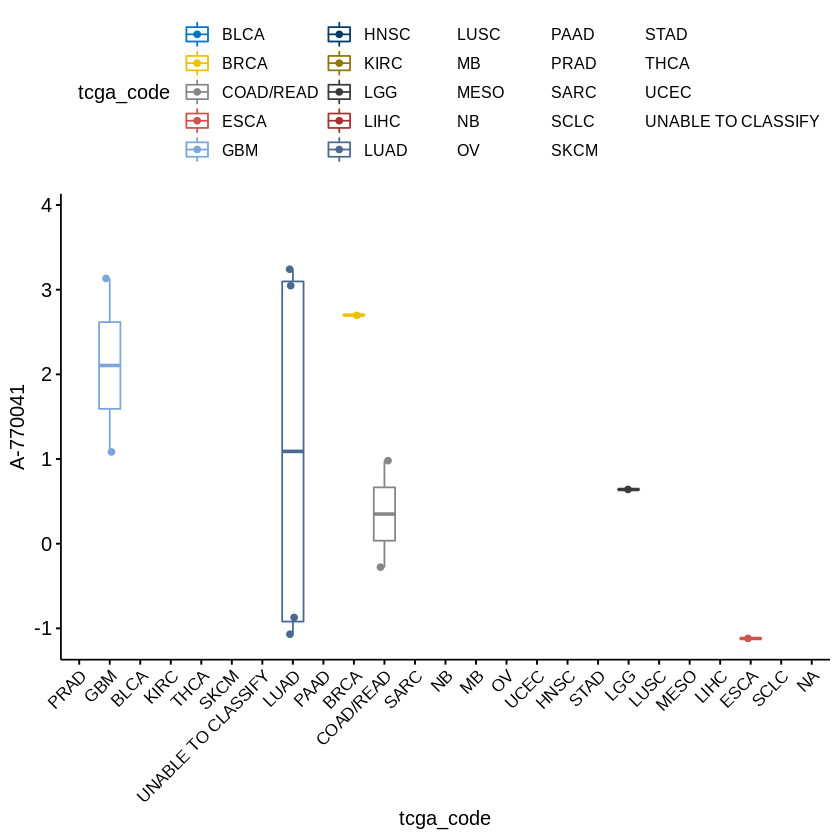

In [ ]:
#check efficiency in various cancer type
library(ggplot2)
library(ggpubr)
head(dat_pca)  #anno + metab +drug

p<-ggboxplot(dat_pca, x="tcga_code",y = "A-770041", color = "tcga_code",palette = "jco", add = "jitter")
p +theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,colour = "black", size = 10))

### check lung cancer related drug only

[1]  74 225

,#NA,#Resistant,#Sensitive,ratio
,<int>,<int>,<int>,<dbl>
CX-5461,17,155,215,0.581
A-770041,278,60,49,0.450
Y-39983,17,227,143,0.386
Dasatinib,280,68,39,0.364
QL-XI-92,17,241,129,0.349
Trametinib,31,237,119,0.334
rTRAIL,18,252,117,0.317
GSK690693,18,254,115,0.312
Tubastatin A,17,257,113,0.305


,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,AMP,citrate,⋯,C56:7-TAG,C56:6-TAG,C56:5-TAG,C56:4-TAG,C56:3-TAG,C56:2-TAG,C58:8-TAG,C58:7-TAG,C58:6-TAG,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NCIH28_PLEURA,5.9780,5.5319,5.9505,5.8847,5.5661,6.0789,5.8617,5.8365,5.5007,5.5936,⋯,6.4649,6.4613,6.3302,6.1136,6.0922,6.3195,6.5250,6.5034,5.8895,Sensitive
JHOS4_OVARY,6.0246,5.5028,5.9016,5.6803,6.0522,5.7468,5.7588,6.0232,6.0129,6.0212,⋯,6.0011,6.1669,6.1208,5.8175,5.6261,5.3338,6.3646,6.1276,6.0756,Sensitive
KYSE450_OESOPHAGUS,6.1684,6.1404,6.8070,5.2654,6.3489,5.9666,5.7655,5.8874,5.8561,6.2594,⋯,5.5269,5.6528,5.9760,6.0317,6.3290,6.8919,5.5310,5.5822,5.7910,Sensitive
SNGM_ENDOMETRIUM,6.0983,6.1400,6.1624,6.5489,6.0791,5.8134,5.9217,6.3568,5.6700,5.2642,⋯,6.2003,5.7623,5.6481,5.4814,5.4124,5.7428,6.1386,5.8930,6.0238,Sensitive
SW1990_PANCREAS,5.7050,6.2803,5.8916,5.8062,6.1693,5.4038,5.9743,5.7512,5.7790,6.0392,⋯,5.6047,5.5514,5.3147,5.2133,5.5805,5.3191,5.4546,5.2800,5.2115,Sensitive
5637_URINARY_TRACT,6.0065,6.2617,5.2599,5.9468,5.7842,6.0644,5.5933,5.8301,5.6456,5.8445,⋯,5.6117,5.6311,5.2127,5.3272,5.8060,6.2751,5.5207,5.3324,5.5161,Sensitive


,avg_S_Group,avg_R_Group,logFC,pvalue,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
creatine,5.8898,5.5864,0.076293,0.031061,None
phosphocreatine,5.6849,5.4383,0.063985,0.053457,None
malate,6.0677,5.8203,0.060048,0.004308,None
3-methyladipate/pimelate,5.9461,5.7594,0.046021,0.067647,None


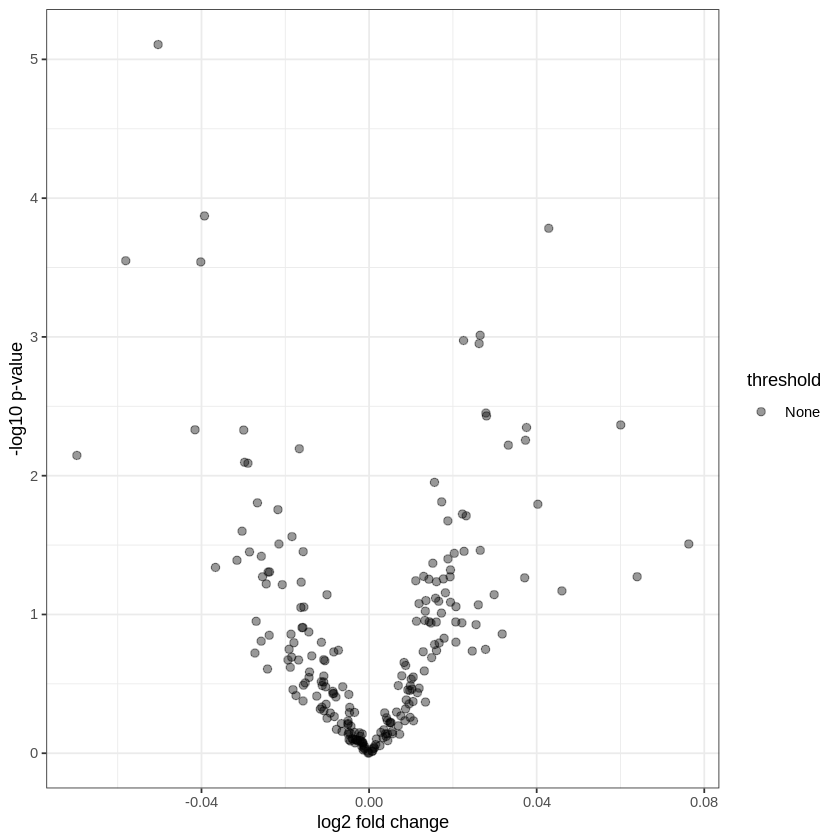

In [ ]:
#get lung samples only

dat_lung=dat_metab[grep("LUNG", row.names(dat_drug), value = T),]
dim(dat_lung)

#grep("SN-38", colnames(dat_drug), value = T)
#dat_drug_gene=dat_drug[,c("SN-38","Camptothecin","Etoposide")]   #targeted gene: TOP1 & TOP2
#head(dat_drug_gene)

#calculate effective ratio
count=as.data.frame(t(apply(dat_bi,2,table)))  #targeted gene: TOP1 & TOP2
#count=as.data.frame(t(apply(dat_bi[,c("Erlotinib","Lapatinib","CUDC-101","EKB-569","Gefitinib","Afatinib","Cetuximab","HG-5-88-01","Afatinib (rescreen)")],2,table)))  #targeted gene: EGFR
colnames(count)=c("#NA","#Resistant","#Sensitive")
count$ratio=signif(count$`#Sensitive`/(count$`#Resistant`+count$`#Sensitive`),3)
count=count[order(count[,"ratio"],decreasing=TRUE),]
count[1:10,]

#grep("TOP1", colnames(dat_rna), value = T)

#get S (sensitive) and R (resistant) group and check metabolism difference
S_Group=dat_metab[row.names(dat_metab) %in% row.names(dat_bi[which(dat_bi$`Afatinib (rescreen)`=="S"),]),]
S_Group$group="Sensitive"
R_Group=dat_metab[row.names(dat_metab) %in% row.names(dat_bi[which(dat_bi$`Afatinib (rescreen)`=="R"),]),]
R_Group$group="Resistant"
dat_RS=rbind(S_Group,R_Group)
head(dat_RS)

options(scipen = 200)
options(digits=5)

ttest<-lapply(1:(ncol(S_Group)-1),function(x){     #"-1" exclude the $group in the last column
    r<-t.test(S_Group[,x],R_Group[,x],alternative = "two.sided")
    mt<-mean(S_Group[,x])
    mn<-mean(R_Group[,x])
    #herv<-colnames(tumor)[x]
    fc <- mt/mn
    
    re<-c(mt,mn,log(fc,base=2),r$p.value)
    return(re)
  } )

#plot
library("limma")
library("ggplot2")
library("dplyr")

d<-do.call(rbind, ttest)
d<-as.data.frame(d)
colnames(d)<-c("avg_S_Group","avg_R_Group","logFC","pvalue")
#d[is.na(d)]=-10
#plot(d$logFC,-log(d$pvalue,base = 10),pch=16,cex=0.8,xlim=c(-10,10))
logFC_cutoff=2

d<-d%>%mutate(threshold = ifelse(logFC >= logFC_cutoff,"Up", ifelse(logFC<=-2 , "Down", "None")))

#this_tile <- paste0('Cutoff for logFC is ',round(logFC_cutoff,1),
#                    '\nThe number of up metabolite is ',sum(d$threshold == "Up") ,
#                    '\nThe number of down metabolite is ',sum(d$threshold == "Down"))

ggplot(data=d, aes(x=logFC, y=-log10(pvalue))) +
  geom_point(alpha=0.4, size=2,aes(colour = threshold)) +
  scale_colour_manual(values = c("Up"= "red", "Down"="blue",  "None"= "black"))+
  theme(legend.position = "none") +
  theme_bw()+ 
  #ggtitle( this_tile ) +
  #xlim(c(-12, 12)) + ylim(c(0, 15)) +
  xlab("log2 fold change") + ylab("-log10 p-value")

row.names(d)<-colnames(S_Group)[-1]
d<-d[order(d[,3],decreasing=TRUE),]
d[1:4,]

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ERBB2,Sensitive,Resistant,0.000037624,0.000038,0.000038,****,Wilcoxon


[1]     8 13404

[1]    45 13404

Warning message:
“Removed 20 rows containing missing values (geom_point).”


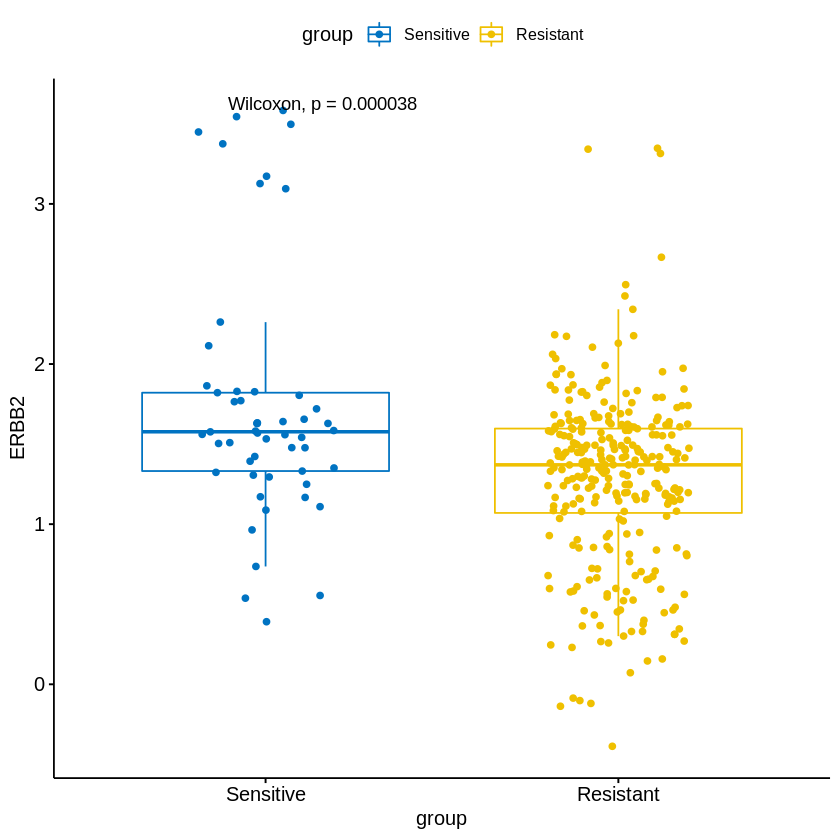

,avg_High_Exp,avg_Low_exp,FoldChange,pvalue,threshold
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
QPCT,-0.28425,-0.00017778,1598.906,0.532716,Up
IRX5,0.71225,0.00142222,500.801,0.023675,Up
BATF3,-0.53112,-0.00220000,241.420,0.029984,Up
PHETA2,-0.30250,-0.00162222,186.473,0.479789,Up
AXIN2,-0.10437,-0.00062222,167.746,0.816786,Up
LOXL4,-0.43900,-0.00284444,154.336,0.359810,Up
TCF4,-0.40875,-0.00273333,149.543,0.099449,Up
REEP2,-0.33450,-0.00297778,112.332,0.182852,Up
APLF,-1.16400,-0.01091111,106.680,0.149153,Up


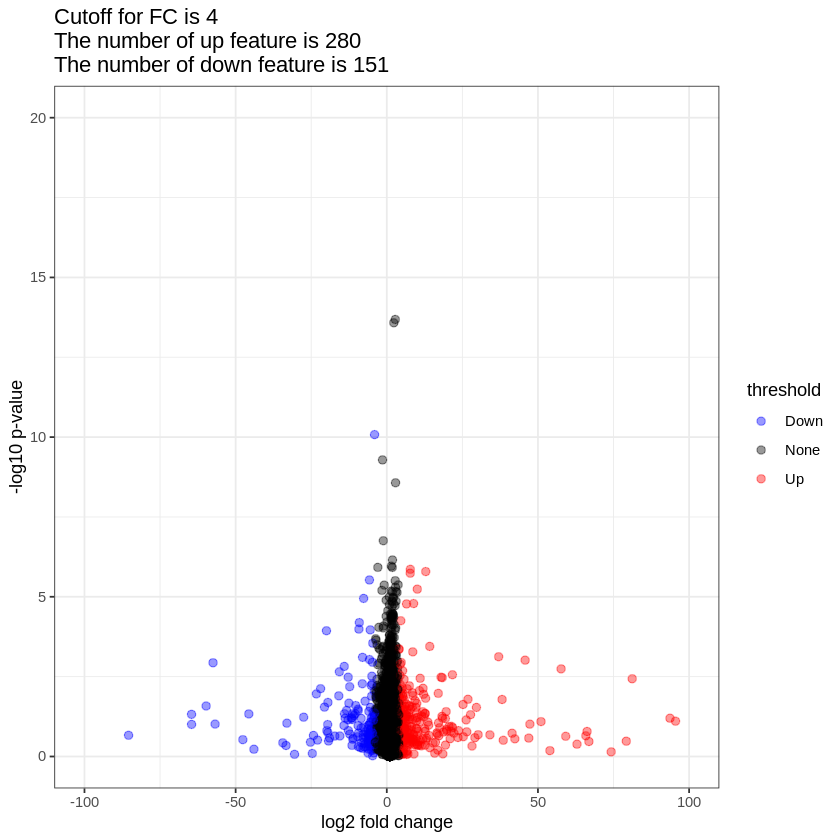

In [ ]:
options(scipen = 200)
options(digits=5)

#get S (sensitive) and R (resistant) group and check gene difference
S_Group=dat_rna[row.names(dat_rna) %in% row.names(dat_bi[which(dat_bi$`Afatinib (rescreen)`=="S"),]),]
S_Group$group="Sensitive"
R_Group=dat_rna[row.names(dat_rna) %in% row.names(dat_bi[which(dat_bi$`Afatinib (rescreen)`=="R"),]),]
R_Group$group="Resistant"
dat_RS=rbind(S_Group,R_Group)

##check specific gene
library(ggpubr)
compare_means(ERBB2~group, dat_RS, method="wilcox.test", paired=FALSE)
p <- ggboxplot(dat_RS, y="ERBB2",
               x = "group", color = "group",
               palette = "jco", add = "jitter")
# add p-value
p + stat_compare_means()


#DE, Volcano plot
a=dat_rna[rownames(dat_rna) %in% row.names(subset(S_Group,ERBB2>2.5)),]  #subset(S_Group,KRT6A>0))
a$group="High_Exp"
b=dat_rna[rownames(dat_rna) %in% row.names(subset(S_Group,ERBB2<2.5)),]
b$group="Low_Exp"
dat_plot=rbind(a,b)
dim(a)
dim(b)

#apply to calculate t-test p-value
ttest<-lapply(1:(ncol(dat_plot)-1),function(x){     #"-1" exclude the $group in the last column
    r<-t.test(a[,x],b[,x],alternative = "two.sided")
    ma<-mean(a[,x])
    mb<-mean(b[,x])
    fc<-ma/mb
    re<-c(ma,mb,fc,r$p.value)    #log(fc,base=2),if fc is negative value, log will make NaNs
    return(re)
} )

#plot
library("limma")
library("ggplot2")
library("dplyr")

d<-do.call(rbind, ttest)
d<-as.data.frame(d)
row.names(d)=colnames(a)[-ncol(a)]      #dangerous! do double check if it match the right gene name!!
#d=d[,-1]

colnames(d)<-c("avg_High_Exp","avg_Low_exp","FoldChange","pvalue")
#head(d)
#d$logFC=log(d$logFC,base=2)
#plot(d$logFC,-log(d$pvalue,base = 10),pch=16,cex=0.8,xlim=c(-10,10))

d<-d%>%mutate(threshold = ifelse(FoldChange >= 4,"Up", ifelse(FoldChange<=-4 , "Down", "None")))
#head(d)
this_tile <- paste0('Cutoff for FC is ',round(4,1),
                    '\nThe number of up feature is ',sum(d$threshold == "Up") ,
                    '\nThe number of down feature is ',sum(d$threshold == "Down"))


#提取信息并将图片加颜色
ggplot(data=d, aes(x=FoldChange, y=-log10(pvalue))) +
  geom_point(alpha=0.4, size=2,aes(colour = threshold)) +
  scale_colour_manual(values = c("Up"= "red", "Down"="blue",  "None"= "black"))+
  theme(legend.position = "none") +
  theme_bw()+ 
  ggtitle( this_tile ) +
  xlim(c(-100, 100)) + ylim(c(0, 20)) +
  xlab("log2 fold change") + ylab("-log10 p-value")

d<-d[order(d[,3],decreasing=TRUE),]
d[1:10,]
#d["EGFR",]
#write.csv(d,file="data/34paired_COAD_herv_level_statistic.csv",row.names = FALSE,quote = FALSE)

#DM


### Analysis 1: Metabolites differential analysis with sensitive and resistant samples

In [ ]:
#head(dat_drug)

#CELL 2016, 1001 CL ~ 265 drugs, recoding binarization threshold for each drug.
dat_bi=as.data.frame(read.table("dat/CELL_1001CL_265_anticancer_drugs_binary.csv",sep=",",check.names = FALSE,header=T,stringsAsFactors=F))
dat_bi=as.data.frame(dat_bi[1,-1])
#Drug Olaparib.1 labble not clear, remove this 2 drug (Olaparib (rescreen) and Olaparib).
dat_bi=dat_bi[,!colnames(dat_bi) %in% c("Olaparib","Olaparib.1")]
dim(dat_bi)
#head(dat_bi)

d="Erlotinib"
bint=as.numeric(as.character(dat_bi[,d]))

non_NA <- !is.na(dat_drug[,d])
targeted_drug<-dat_drug[non_NA,c(d,"CP466722")]
colnames(targeted_drug)[1]="logIC50"
#head(targeted_drug)
cl_sensitive=subset(targeted_drug,logIC50<=bint)
cl_sensitive$Drug_response="sensitive"
cl_resistant=subset(targeted_drug,logIC50>bint)
cl_resistant$Drug_response="resistant"
targeted_drug=rbind(cl_sensitive,cl_resistant)
targeted_drug=targeted_drug[,-2]
head(targeted_drug)
dim(cl_sensitive)
dim(cl_resistant)
dim(targeted_drug)

dat_m_td=merge(targeted_drug,dat_metab,by="row.names")
row.names(dat_m_td)=dat_m_td[,1]
dat_m_td=dat_m_td[,-1]
head(dat_m_td)
#hist(cl_sensitive[,1],breaks=10)
#hist(cl_resistant[,1],breaks=10)

[1] 1.57

,logIC50,Drug_response
,<dbl>,<chr>
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.69,sensitive
A253_SALIVARY_GLAND,0.29,sensitive
BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,1.16,sensitive
GCIY_STOMACH,-0.04,sensitive
HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.83,sensitive
LS123_LARGE_INTESTINE,1.53,sensitive


[1] 22  3

[1] 71  3

[1] 93  2

,logIC50,Drug_response,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,⋯,C56:8-TAG,C56:7-TAG,C56:6-TAG,C56:5-TAG,C56:4-TAG,C56:3-TAG,C56:2-TAG,C58:8-TAG,C58:7-TAG,C58:6-TAG
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.69,sensitive,5.368205,5.507812,6.434076,5.755874,5.661045,6.122270,5.571461,5.852753,⋯,6.195764,6.696261,6.683044,6.811352,6.741345,6.546231,6.747886,6.776250,6.731635,6.692274
8MGBA_CENTRAL_NERVOUS_SYSTEM,2.56,resistant,6.119355,5.176214,5.573806,6.449816,5.458019,5.920872,6.054922,5.801756,⋯,5.680587,5.610879,5.324209,5.439468,5.409796,5.272500,5.131311,5.354589,5.322087,5.397665
A253_SALIVARY_GLAND,0.29,sensitive,6.136619,6.236288,5.695799,6.150986,6.300304,6.510830,5.884781,6.578244,⋯,5.497955,5.396601,5.646220,5.275685,5.508604,5.966140,5.740519,5.478112,5.215001,5.390535
ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,1.73,resistant,5.769243,5.657776,7.007360,6.461725,5.483625,6.113060,5.954222,5.441768,⋯,6.348097,6.757919,6.899627,7.013284,6.780984,6.511750,6.604851,6.918177,7.066812,6.920192
AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,2.76,resistant,5.705403,6.084789,6.866777,6.207122,5.759520,6.366706,6.098397,6.068119,⋯,6.270512,6.181972,6.282546,6.314083,6.103973,6.269902,6.214164,6.551337,6.491458,6.607417
BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,1.16,sensitive,6.174466,5.447434,5.780828,6.142593,5.561422,5.491876,6.141315,5.406805,⋯,5.577662,5.682371,5.649835,5.541288,5.513389,5.410208,5.560415,5.644822,5.501869,5.680748


In [ ]:
#https://zhuanlan.zhihu.com/p/150760480
#（两组）（独立的）（连续变量数据既不服从正态分布，且满足方差齐性），可以考虑使用Wilcoxon秩和检验。  【满足3个（）条件】
library(dplyr)
x="aconitate"
# any group p< 0.05, reject H0, not fit norm distribution.
tapply(dat_m_td$aconitate, dat_m_td$Drug_response, shapiro.test)
#F test check variances, p>0.05, accept H0，variances are similar
var.test(aconitate ~ Drug_response, data = dat_m_td)

#p>0.05, accept H0, two set of data do not have significantly difference.
wilcox.test(aconitate ~ Drug_response, data = dat_m_td, alternative = "two.sided")

$resistant

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.97392, p-value = 0.1457


$sensitive

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.83955, p-value = 0.002231




	F test to compare two variances

data:  aconitate by Drug_response
F = 1.0501, num df = 70, denom df = 21, p-value = 0.941
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4854879 1.9869467
sample estimates:
ratio of variances 
          1.050073 



	Wilcoxon rank sum test with continuity correction

data:  aconitate by Drug_response
W = 744, p-value = 0.7414
alternative hypothesis: true location shift is not equal to 0


In [ ]:
library(dplyr)
options(scipen=200)
#head(dat_drug)

#CELL 2016, 1001 CL ~ 265 drugs, recoding binarization threshold for each drug.
dat_bi=as.data.frame(read.table("dat/CELL_1001CL_265_anticancer_drugs_binary.csv",sep=",",check.names = FALSE,header=T,stringsAsFactors=F))
dat_bi=as.data.frame(dat_bi[1,-1])
#head(dat_bi)
#Drug Olaparib.1 labble not clear, remove this 2 drug (Olaparib (rescreen) and Olaparib).
dat_bi=dat_bi[,!colnames(dat_bi) %in% c("Olaparib","Olaparib.1")]
dim(dat_bi)

seed =1007
re=0
d=c("0","0")
dd=c("0","0")

for (i in 1:ncol(dat_bi)){
#for (i in 44:46){
drug_name=colnames(dat_bi)[i]
#drug_name="Erlotinib"
non_NA <- !is.na(dat_drug[,drug_name])
targeted_drug<-dat_drug[non_NA,c(drug_name,"CP466722")]
colnames(targeted_drug)[1]="logIC50"
#head(targeted_drug)
bint=as.numeric(as.character(dat_bi[,i]))
cl_sensitive=subset(targeted_drug,logIC50<=bint)
cl_sensitive$Drug_response="sensitive"
cl_resistant=subset(targeted_drug,logIC50>bint)
cl_resistant$Drug_response="resistant"
targeted_drug=rbind(cl_sensitive,cl_resistant)
targeted_drug=targeted_drug[,-2]
#head(targeted_drug)

if(nrow(cl_sensitive)<3|nrow(cl_resistant) <3 ) {next}  #shapiro.test(x): sample size must be between 3 and 5000
dat_m_td=merge(targeted_drug,dat_metab,by="row.names")
row.names(dat_m_td)=dat_m_td[,1]
dat_m_td=dat_m_td[,-1]
#head(dat_m_td)

wilcoxon_test<-lapply(1:ncol(dat_metab),function(j){
#wilcoxon_test<-lapply(1:3,function(j){
    #x_name="aconitate"
    x_name=colnames(dat_metab)[j]
    x=dat_m_td[row.names(cl_sensitive),x_name]
    #check norm distribution
    st_sp <- signif(shapiro.test(x)$p.value,3)
    x=dat_m_td[row.names(cl_resistant),x_name]
    st_rp <- signif(shapiro.test(x)$p.value,3)

    #check variances, p should > 0.05,accept H0，variances are similar
    tmp=dat_m_td[,c("Drug_response",x_name)]
    colnames(tmp)=c("Drug_response","metabolite")
    ft_p<-signif(var.test(metabolite ~ Drug_response, data = tmp)$p.value,3)

    #Wilcoxon test, p >0.05, accept H0, two set of data do not have significantly difference.
    wt_p<-signif(wilcox.test(metabolite ~ Drug_response, data = tmp, alternative = "two.sided")$p.value,3)
    #only record significant changes
    if (wt_p <0.05){
    
    #calculate fold change: sensitive group IC50 / resistant group IC50
    tmp=summarise(group_by(tmp,Drug_response),mean(metabolite))
    fc=signif(subset(tmp,Drug_response=="sensitive")[[2]] / subset(tmp,Drug_response=="resistant")[[2]],3)
    
    re<-c(drug_name,x_name,wt_p,fc,st_sp,st_rp,ft_p)
    return(re)
        }
    } )

d<-do.call(rbind,wilcoxon_test)
dd=rbind(dd,d)
}

dd<-as.data.frame(dd[-1,],stringsAsFactors = FALSE)
colnames(dd)<-c("Tested_drugs","Metabolite","Wilconxon-test.p","Fold Change","shapiroTest_sensitiveGroup.p","shapiroTest_resistantGroup.p","F-test.p")
dd<-dd[order(dd[,4],decreasing=TRUE),]
dd[1:5,]
#save(dd,file="LR_dd.RData")
#write.csv(dd,file="out_doc/Metab_WilcoxonT_in_Each_Drug.csv",quote=F,row.names=F)

#dd=as.data.frame(read.table("out_doc/Metab_WilcoxonT_in_Each_Drug.csv",sep=",",check.names = FALSE,header=T,stringsAsFactors=F))

[1]   1 263

Warning message in rbind(dd, d):
“number of columns of result is not a multiple of vector length (arg 1)”


,Tested_drugs,Metabolite,Wilconxon-test.p,Fold Change,shapiroTest_sensitiveGroup.p,shapiroTest_resistantGroup.p,F-test.p
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
X.12271,EHT 1864,C32:1-PC,0.047,1.01,0.615,0.000000000000000000000894,0.289
X.12348,PF-4708671,C32:1-PC,0.00859,1.02,0.0346,0.00000000000000000000185,0.216
X.7600,Masitinib,C32:1-PC,0.0346,1.02,0.434,0.00000000000000000000208,0.00478
X.2518,Phenformin,C32:1-PC,0.0236,1.01,0.521,0.00000000000000000000216,0.0394
X.8450,PIK-93,C32:1-PC,0.0404,1,0.00000948,0.00000000000000000000236,0.00000229


## check cell cycle

In [ ]:

#head(dat_drug)
dat_cc=merge(dat_anno[,c("Doubling_time_hr","Pathology","growth_properties")],dat_drug,by="row.names")
non_NA <- !is.na(dat_cc$Doubling_time_hr)
dat_cc=dat_cc[non_NA,] 

dd=c("0","0")

y_name=colnames(dat_drug)[1]
y=dat_cc[,y_name]
non_NA <- !is.na(y)
y=dat_cc[non_NA,y_name]
x=dat_cc[non_NA,"Doubling_time_hr"]

[1] 177   6

,Drugs,P_affected_by_Cell_Cycle,sample_size,cor,conf_int_1,conf_int_2
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
re.20,Bleomycin (50 uM),0.0000000000000972,311,0.405507682138411,0.308,0.494
re.171,HG-5-113-01,0.000000416,156,0.392061489052636,0.25,0.517
re.123,Bosutinib,0.00000000037,268,0.370764682816931,0.263,0.47
re.129,ABT-888,0.000000000497,267,0.368883910390648,0.26,0.468
re.128,Olaparib,0.000000000634,267,0.366764673084683,0.258,0.466
re.121,Thapsigargin,0.000000000524,293,0.352670346181959,0.248,0.449
re.161,PD-0332991,0.00000000817,262,0.346712091130412,0.235,0.449
re.75,UNC1215,0.000000000963,300,0.343696291248401,0.24,0.44
re.86,CCT018159,0.00000000223,299,0.337065445044799,0.233,0.434


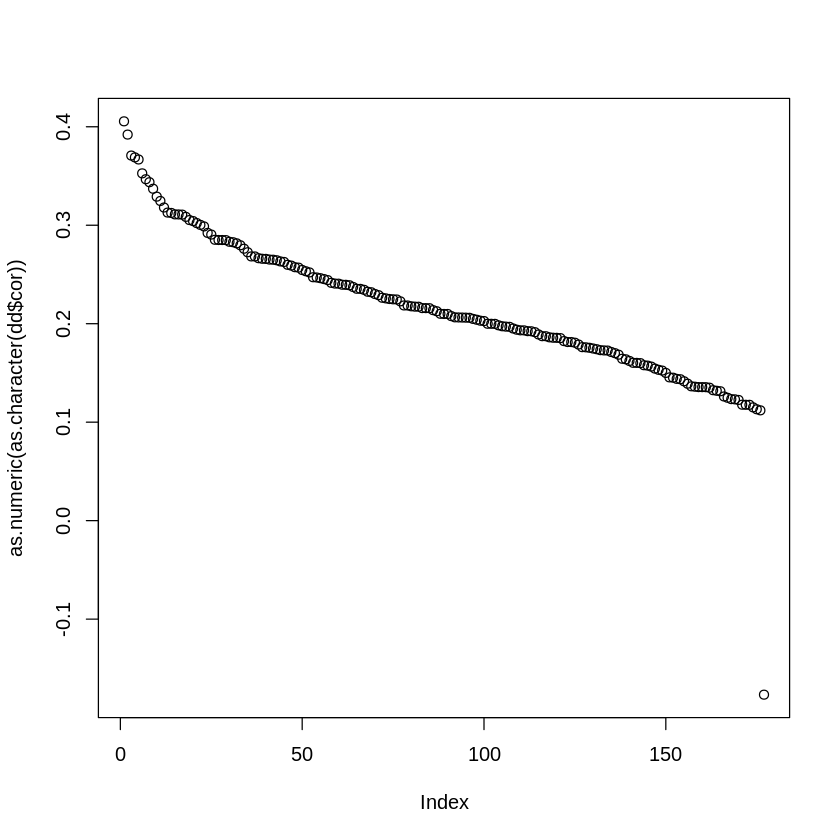

In [ ]:
options(scipen=200)

#cell cycle (doubling time) vs drug response
dat_anno=as.data.frame(read.table("dat/Cell_lines_annotations_v6.txt",sep="\t",check.names = FALSE,header=T,row.names=1,stringsAsFactors=F))
#head(dat_anno)

#head(dat_drug)
dat_cc=merge(dat_anno[,c("Doubling_time_hr","Pathology","growth_properties")],dat_drug,by="row.names")
non_NA <- !is.na(dat_cc$Doubling_time_hr)
dat_cc=dat_cc[non_NA,] 

dd=c("0","0")

for (i in 1:ncol(dat_drug)){
#for (i in 2:30){
y_name=colnames(dat_drug)[i]
y=dat_cc[,y_name]
non_NA <- !is.na(y)
y=dat_cc[non_NA,y_name]
x=dat_cc[non_NA,"Doubling_time_hr"]
    
if(length(x)<5 | length(y)<5){next}
pc=cor.test(x,y,method="pearson")
pvalue=signif(pc$p.value,3)  #univariant, pvalue at pos 2
if(pvalue>=0.05){next}
size=length(x)
conf_int=signif(pc$conf.int,3) 
r=cor(x,y)
re<-c(y_name,pvalue,size,r,conf_int)

dd=rbind(dd,re)
}

dd<-as.data.frame(dd[-1,])
colnames(dd)<-c("Drugs","P_affected_by_Cell_Cycle","sample_size","cor","conf_int_1","conf_int_2")
dd<-dd[order(dd[,4],decreasing=TRUE),]
dim(dd)
dd
#save(dd,file="LR_dd.RData")
#write.csv(dd,file="out_doc/PC_drug_Cellcycle.csv",quote=F,row.names=F)
#hist(as.numeric(as.character(dd$cor)),breaks=100)
plot(as.numeric(as.character(dd$cor)))


### Analysis 2: Within the sensitive Cell lines, calculate mutation / not mutation ratio
normally cell lines did not resopnse -> no mutation, no response

In [ ]:
hotspots=as.data.frame(read.table("dat/hotspots.txt",sep="\t",check.names = FALSE,header=T,stringsAsFactors=F))
head(hotspots)

,Gene,Residue,Type,Variants,Q-value,Samples,Tumor Type Composition
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>
1,NRAS,Q61,single residue,R:204|K:142|L:46|H:27|P:2|*:1,0,422,skin:187|thyroid:71|blood:37|bowel:35|lung:17|soft_tissue:11|unk:11|testis:9|bladder:8|brain:6|biliary_tract:5|ovary:5|uterus:5|head_neck:3|stomach:3|thymus:3|pancreas:2|adrenal_gland:1|bone:1|kidney:1|liver:1
2,PIK3CA,E545,single residue,K:575|G:21|Q:20|A:12|D:5,0,633,breast:174|bowel:97|bladder:90|lung:51|head_neck:48|stomach:35|cervix:34|uterus:30|brain:22|biliary_tract:8|kidney:8|prostate:8|skin:7|ovary:5|pancreas:5|penis:3|thyroid:3|testis:2|liver:1|unk:1|vulva:1
3,IDH1,R132,single residue,H:570|C:139|G:28|S:16|L:12|I:1,0,766,brain:612|biliary_tract:57|skin:25|blood:23|prostate:11|lung:8|bone:6|bowel:5|liver:4|bladder:2|breast:2|head_neck:2|pancreas:2|soft_tissue:2|unk:2|adrenal_gland:1|thymus:1|thyroid:1
4,PIK3CA,H1047,single residue,R:537|L:85|Y:18|Q:7,0,647,breast:361|bowel:54|uterus:51|stomach:28|brain:27|head_neck:25|bladder:20|lung:17|soft_tissue:11|ovary:9|pancreas:7|prostate:6|kidney:5|skin:5|thyroid:5|unk:5|cervix:4|biliary_tract:3|liver:3|adrenal_gland:1
5,BRAF,V600,single residue,E:833|M:29|K:24|R:4|V:4|G:3,0,897,skin:357|thyroid:316|bowel:113|lung:33|unk:21|brain:20|blood:11|pancreas:10|biliary_tract:4|bladder:2|head_neck:2|ovary:2|breast:1|kidney:1|lymph:1|soft_tissue:1|stomach:1|uterus:1
6,EGFR,L858,single residue,R:144,0,144,lung:143|bowel:1


In [ ]:
anno<-as.data.frame(read.table("dat/CCLE_metabolomics_20190502.csv",sep=",",check.names = FALSE,header=T,row.names=1,stringsAsFactors=F))

head(anno)

,DepMap_ID,2-aminoadipate,3-phosphoglycerate,alpha-glycerophosphate,4-pyridoxate,aconitate,adenine,adipate,alpha-ketoglutarate,AMP,⋯,C56:8-TAG,C56:7-TAG,C56:6-TAG,C56:5-TAG,C56:4-TAG,C56:3-TAG,C56:2-TAG,C58:8-TAG,C58:7-TAG,C58:6-TAG
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DMS53_LUNG,ACH-000698,6.1127,6.0342,5.8969,6.0005,5.5136,5.8685,5.9772,5.6931,5.9237,⋯,6.0702,6.1334,6.0911,6.2577,6.3727,6.2025,5.9396,6.3098,6.1160,5.9994
SW1116_LARGE_INTESTINE,ACH-000489,5.5774,5.7270,5.1115,6.0732,5.8025,5.8245,5.8888,5.7684,5.7608,⋯,6.2487,6.6336,6.3781,6.3410,6.3609,6.3335,6.1373,7.0659,6.8322,6.3631
NCIH1694_LUNG,ACH-000431,5.8864,5.5749,5.5413,5.8484,5.6650,5.8755,5.8949,5.8396,5.7426,⋯,5.9429,5.9470,5.8380,5.9134,6.1375,5.8075,5.7041,5.8812,5.7852,5.5042
P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000707,5.7700,6.0992,6.2333,5.5435,5.7678,6.1559,6.1111,5.9495,6.3427,⋯,6.5169,6.1138,6.2821,6.2487,6.1095,6.0436,5.8468,6.4294,5.7798,6.2415
HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000509,5.4807,5.4697,6.5094,6.2510,5.1906,5.8971,6.1483,5.6075,5.8716,⋯,6.1620,6.7779,6.6764,6.6957,6.7510,6.3851,6.6826,6.7579,6.7286,6.8793
UMUC3_URINARY_TRACT,ACH-000522,5.8920,6.0393,6.3096,5.6459,5.5015,5.9752,5.9074,5.1800,7.0053,⋯,5.9067,6.4723,6.2987,6.3487,6.2112,6.4923,6.7701,6.1764,6.3534,6.3204


In [ ]:
options(scipen = 200)
options(digits=5)
library(dplyr)

#extract seneitive cell lines
dat_bi=as.data.frame(read.table("dat/CELL_1001CL_265_anticancer_drugs_binary.csv",sep=",",check.names = FALSE,header=T,stringsAsFactors=F))
dat_bi=as.data.frame(dat_bi[1,-1])
#Drug Olaparib.1 labble not clear, remove this 2 drug (Olaparib (rescreen) and Olaparib).
dat_bi=dat_bi[,!colnames(dat_bi) %in% c("Olaparib","Olaparib.1")]

#match by Depmap ID
anno<-as.data.frame(read.table("dat/CCLE_metabolomics_20190502.csv",sep=",",check.names = FALSE,header=T,row.names=1,stringsAsFactors=F))
#focus on cancer hospot gene
hotspots=as.data.frame(read.table("dat/hotspots.txt",sep="\t",check.names = FALSE,header=T,stringsAsFactors=F))
#head(hotspots)
hotspots=unique(hotspots$Gene)

seed =1007
re=0
d=c("0","0")
dd=c("0","0","0","0","0","0")

#Forloop for each drug
for (i in 1:ncol(dat_bi)){
#for (i in 1:3){
drug_name=colnames(dat_bi)[i]
#drug_name="Erlotinib"
non_NA <- !is.na(dat_drug[,drug_name])
targeted_drug<-dat_drug[non_NA,c(drug_name,"CP466722")]
colnames(targeted_drug)[1]="logIC50"
#head(targeted_drug)
bint=as.numeric(as.character(dat_bi[,i]))
cl_sensitive=subset(targeted_drug,logIC50<=bint)
cl_resistant=subset(targeted_drug,logIC50>bint)
    
    for (M_gene in hotspots){
    #extract Cell lines with specific mutation 
    mutation_sample=dat_mut[dat_mut$Hugo_Symbol==M_gene,]
    mutation_sample=unique(mutation_sample[,"DepMap_ID"])   #mutation samples
    #length(mutation_sample)  
        
    #match by Depmap ID
    tmp=subset(anno,DepMap_ID %in% mutation_sample)
    #dim(tmp)   #mutated cell lines with specific gene mutation.
    cl_sensitive_mutated=subset(cl_sensitive, row.names(cl_sensitive) %in% row.names(tmp))
    cl_resistant_mutated=subset(cl_resistant, row.names(cl_resistant) %in% row.names(tmp))
    #head(cl_sensitive_mutated)

    N_mutation= length(mutation_sample)
    N_sensitive = nrow(cl_sensitive)
    N_sensitive_mutation=nrow(cl_sensitive_mutated)
    if (N_sensitive_mutation == 0) { next }
    sm_s_ratio = signif(N_sensitive_mutation/N_sensitive,3)
    N_resistant = nrow(cl_resistant)
    N_resistant_mutation=nrow(cl_resistant_mutated)
    sm_r_ratio = signif(N_resistant_mutation/N_resistant,3)
        
    d<-c(drug_name,M_gene,N_mutation,N_sensitive_mutation,sm_s_ratio,sm_r_ratio)  #should be high in sm_s_ratio and low in sm_r_ratio
    dd=rbind(dd,d)
    }

}

dd<-as.data.frame(dd[-1,],stringsAsFactors = FALSE)
colnames(dd)<-c("Tested_drugs","Mutated_gene","Total_mutation_size_in_CCLE","the_number_of_mutated_sensitive_cell_lines","the_mutated_rate_in_sensitive_cell_lines","the_mutated_rate_in_resistant_cell_lines")
dd<-dd[order(dd[,5],decreasing=TRUE),]
dd[1:5,]

#write.csv(dd,file="out_doc/Mutation_Drug_metabolites.csv",quote=F,row.names=F)

,Tested_drugs,Mutated_gene,Total_mutation_size_in_CCLE,the_number_of_mutated_sensitive_cell_lines,the_mutated_rate_in_sensitive_cell_lines,the_mutated_rate_in_resistant_cell_lines
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
d.5031,JQ1,TP53,699,1,1,0.33
d.5032,JQ1,CTNNB1,56,1,1,0.0287
d.5033,JQ1,FOXP1,48,1,1,0.0229
d.5034,JQ1,EPHA3,86,1,1,0.0372
d.29900,FK866,TP53,699,1,1,0.326


,Predicted_Drug,Mutated_gene,pvalue,#mutated_sample,#not_mutated_sample
,<chr>,<chr>,<chr>,<chr>,<chr>
re,BRD-A00077618-236-07-6::2.5::HTS,NRAS,0.87,10,274
re.1,BRD-A00077618-236-07-6::2.5::HTS,PIK3CA,0.44,22,261
re.2,BRD-A00077618-236-07-6::2.5::HTS,IDH1,0.044,4,280
re.3,BRD-A00077618-236-07-6::2.5::HTS,BRAF,0.43,22,257
re.4,BRD-A00077618-236-07-6::2.5::HTS,EGFR,0.26,14,265
re.5,BRD-A00077618-236-07-6::2.5::HTS,TP53,0.14,86,198


[1] 1133866       5

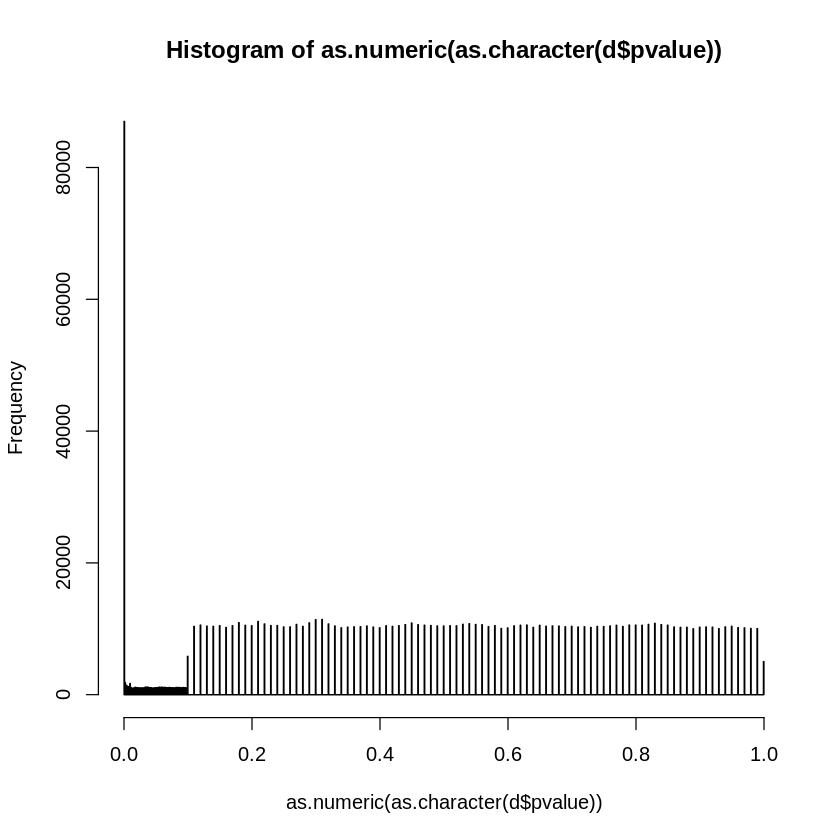

In [ ]:
hotspots=as.data.frame(read.table("dat/hotspots.txt",sep="\t",check.names = FALSE,header=T,stringsAsFactors=F))
#head(hotspots)
hotspots=unique(hotspots$Gene)

options(scipen = 200)
options(digits=5)
library(ggpubr)
d<-c("0","0","0","0","0")

for (i in 1:ncol(dat_drug)) {
#for (i in 1:3) {
drug_ID=colnames(dat_drug)[i]
#drug_ID
Q1=quantile(na.omit(dat_drug[,i]),c(0.25,0.75))[[1]]
Q3=quantile(na.omit(dat_drug[,i]),c(0.25,0.75))[[2]]
drug_Q13=subset(dat_drug,dat_drug[,i]<Q1|dat_drug[,i]>Q3)
#drug_Q13[drug_Q13>Q3]=1
#drug_Q13[drug_Q13<Q1]=0
    
    
for (j in 1:length(hotspots)) {
#for (j in 1:3) {
    gene=hotspots[j]
    #print(hotspots[[j]])
    mutation_sample=dat_mut[dat_mut$Hugo_Symbol==gene,]
    mutation_sample=unique(mutation_sample[,"DepMap_ID"])   #mutation samples
    size=length(intersect(row.names(drug_Q13),mutation_sample))
    if(size==0){next}

#extract samples with obvious drug sensitive and targeted mutation
    G1=drug_Q13[rownames(drug_Q13) %in% mutation_sample,]
    G1$group="mutated"
    G1=G1[,c(j,ncol(G1))]
    G2=drug_Q13[!rownames(drug_Q13) %in% mutation_sample,]
    G2$group="not_mutated"
    G2=G2[,c(j,ncol(G2))]
    G1=na.omit(G1)   #remove NA value
    G2=na.omit(G2)
    dat_plot=rbind(G1,G2)
    colnames(dat_plot)[1]="Drug_sensitive"
    if (dim(dat_plot)[1]==0){next}
    #calculate p-value
    if (dim(G1)[1]<2 | dim(G2)[1]<2) {   #t.test smaple size must >=2
        pvalue=0
        } else {
        pvalue=signif(compare_means(Drug_sensitive~group, dat_plot, method="t.test", paired=FALSE)[[5]],3) 
        }
    
    #output
    re<-c(drug_ID,gene,pvalue,dim(G1)[1],dim(G2)[1])
    d=rbind(d,re)
    }

}
d=as.data.frame(d[-1,],stringsAsFactors = FALSE)
colnames(d)<-c("Predicted_Drug","Mutated_gene","pvalue","#mutated_sample","#not_mutated_sample")
head(d)
#write.csv(d,file = "doc/Hotspots_MutationNdrugsensitive_wilcoxTest.csv",quote=F,row.names=F)
dim(d)
hist(as.numeric(as.character(d$pvalue)),breaks=1000)

In [ ]:
#(debug)
i=1
j=222

drug_ID=colnames(dat_drug)[i]
#drug_ID
Q1=quantile(na.omit(dat_drug[,i]),c(0.25,0.75))[[1]]
Q3=quantile(na.omit(dat_drug[,i]),c(0.25,0.75))[[2]]
drug_Q13=subset(dat_drug,dat_drug[,i]<Q1|dat_drug[,i]>Q3)
#drug_Q13[drug_Q13>Q3]=1
#drug_Q13[drug_Q13<Q1]=0
    
    
    gene=hotspots[j]
    #print(hotspots[[j]])
    mutation_sample=dat_mut[dat_mut$Hugo_Symbol==gene,]
    mutation_sample=unique(mutation_sample[,"DepMap_ID"])   #mutation samples
    size=length(intersect(row.names(drug_Q13),mutation_sample))
    size

#extract samples with obvious drug sensitive and targeted mutation
    G1=drug_Q13[rownames(drug_Q13) %in% mutation_sample,]
    G1$group="mutated"
    G1=G1[,c(j,ncol(G1))]
    G2=drug_Q13[!rownames(drug_Q13) %in% mutation_sample,]
    G2$group="not_mutated"
    G2=G2[,c(j,ncol(G2))]
    G1=na.omit(G1)   #remove NA value
    G2=na.omit(G2)
    dat_plot=rbind(G1,G2)
    colnames(dat_plot)[1]="Drug_sensitive"
    #head(dat_plot)
    #head(G1)
    #head(G2)
    if (dim(dat_plot)[1]==0){next}
    #calculate p-value
    if (dim(G1)[1]<2 | dim(G2)[1]<2) {   #t.test smaple size must >=2
        pvalue=0
        } else {
        pvalue=signif(compare_means(Drug_sensitive~group, dat_plot, method="t.test", paired=FALSE)[[5]],3) 
        }
pvalue

[1] 2

[1] 0

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Drug_sensitive,mutated,not_mutated,0.5119467,0.51,0.51,ns,Wilcoxon


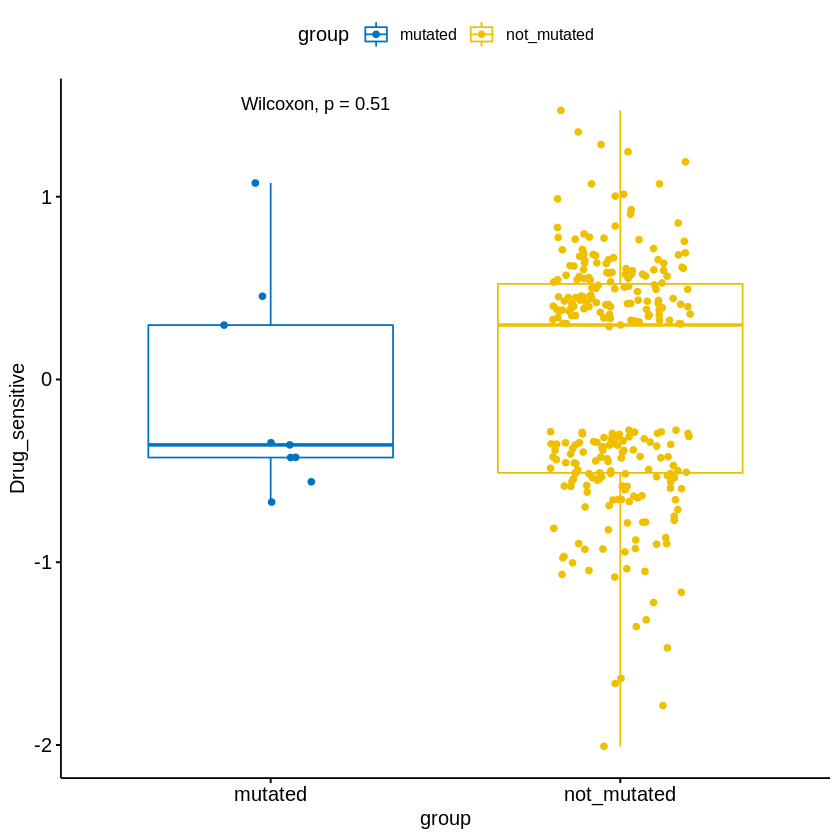

In [ ]:
#head(dat_mut)
#colnames(dat_mut)
mutation_sample=dat_mut[dat_mut$Hugo_Symbol=="ARID2",]
mutation_sample=unique(mutation_sample[,"DepMap_ID"])   #mutation samples
#length(mutation_sample)
#length(intersect(row.names(drug_Q13),mutation_sample))

#extract samples with obvious drug sensitive and targeted mutation
G1=drug_Q13[rownames(drug_Q13) %in% mutation_sample,]
G1$group="mutated"
G1=G1[,c(1,ncol(G1))]
G2=drug_Q13[!rownames(drug_Q13) %in% mutation_sample,]
G2$group="not_mutated"
G2=G2[,c(1,ncol(G2))]
dat_plot=rbind(G1,G2)
colnames(dat_plot)[1]="Drug_sensitive"
#head(dat_plot)

library(ggpubr)

compare_means(Drug_sensitive~group, dat_plot, method="wilcox.test", paired=FALSE)
p <- ggboxplot(dat_plot, y="Drug_sensitive",
               x = "group", color = "group",
               palette = "jco", add = "jitter")
# add p-value
p + stat_compare_means()


### Analysis 2 : drug sensitive distribution in mutated samples 

[1]    6 4686

,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,BRD-A00827783-001-24-6::2.5::HTS,⋯,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACH-000042,0.14086599,-0.1637022,0.99965028,0.4127560,-0.52213530,-0.11762604,0.624262821,0.10158545,-1.2181576,0.542213611,⋯,0.22202397,-0.00788946,0.643235657,-0.12066689,0.34701808,0.152883437,0.017750060,0.438416165,-1.993839,0.07262566
ACH-000054,-0.51336326,-0.2840354,0.51732106,0.6543128,-0.75012334,0.67147238,1.179012079,-0.75322093,-1.1304717,1.150847220,⋯,-0.66555876,0.26447647,0.557057249,-0.84628837,-0.63822092,0.499957600,0.231331266,-0.296577670,-2.716927,0.63304762
ACH-000279,-0.07138956,-0.3034779,-0.04606291,0.4681988,0.42494610,0.34134287,-0.111562521,-1.63401379,-1.1579111,0.281381636,⋯,0.27602578,-0.50714690,0.367711430,-0.45087066,-0.25389042,0.100247296,0.651175074,-0.001695775,-2.733320,0.23274791
ACH-000488,-0.34009312,-0.1137936,0.06390235,0.3411780,-0.15613524,0.02584959,0.224126450,-0.06363012,-0.3130896,0.332007647,⋯,0.08088559,-0.23943858,-0.526390224,-0.22395861,0.15999282,0.120728053,0.003137341,-0.570402451,-2.652188,0.18114207
ACH-000880,-0.36839090,0.2979103,0.48441269,0.3411809,-0.17314573,0.27943984,-0.002028723,-0.69164242,-0.5500966,0.194869386,⋯,0.05046976,0.24501542,0.001826148,-0.36876131,0.06043802,0.161087501,-0.359773451,-0.407488231,-2.276803,0.01038245
ACH-000997,0.30393741,-0.5124315,0.50661195,0.4047946,-0.02811774,0.66069884,0.282220213,0.28418722,-1.1893942,-0.006098177,⋯,0.49820565,0.04690648,-0.024142112,-0.04773412,0.49296938,-0.005077311,0.156376704,0.356507203,-1.937710,0.66449979


,"apply(dat_genemut, 2, sd)",drug
,<dbl>,<chr>
BRD-K26667523-001-02-5::2.5::HTS,2.376815,BRD-K26667523-001-02-5::2.5::HTS
BRD-K37687095-001-06-9::2.5::HTS,2.366994,BRD-K37687095-001-06-9::2.5::HTS
BRD-A28970875-300-04-9::2.5::HTS,2.300264,BRD-A28970875-300-04-9::2.5::HTS
BRD-K72815923-034-01-2::2.5::HTS,2.266779,BRD-K72815923-034-01-2::2.5::HTS
BRD-K49865102-001-08-4::2.5::HTS,2.129837,BRD-K49865102-001-08-4::2.5::HTS
BRD-K68174511-001-06-6::2.5::HTS,1.918613,BRD-K68174511-001-06-6::2.5::HTS


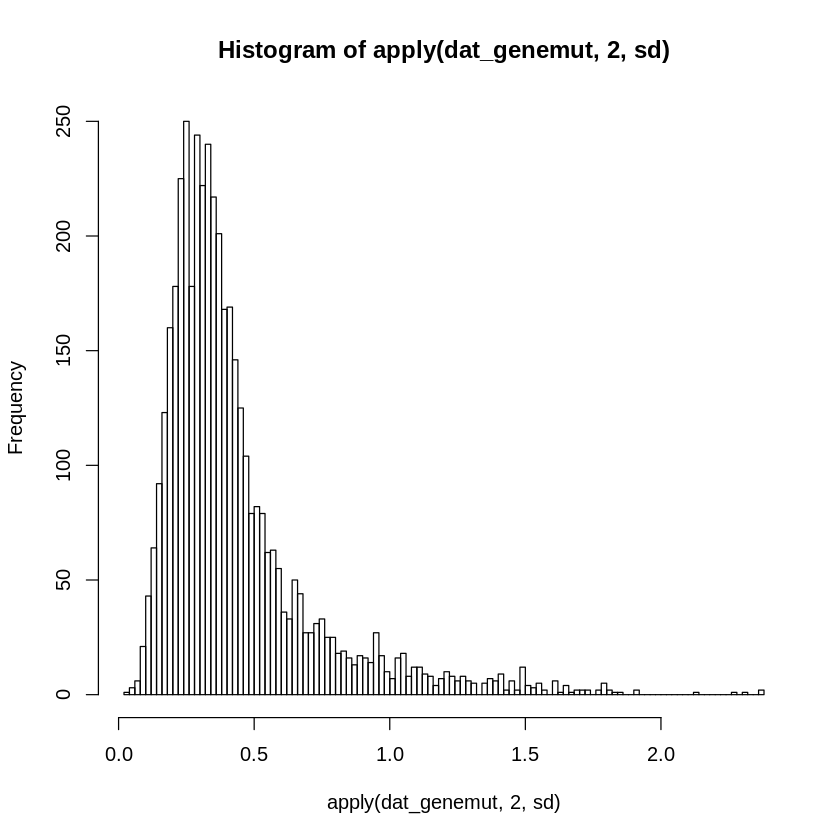

In [ ]:
    #j=222
    #gene=hotspots[j]
    #print(hotspots[[j]])
    gene="IDH1"
    mutation_sample=dat_mut[dat_mut$Hugo_Symbol==gene,]
    #head(mutation_sample)
    mutation_sample=unique(mutation_sample[,"DepMap_ID"])   #mutation samples
    #size=length(intersect(row.names(dat_drug),mutation_sample))
    dat_genemut=dat_drug[rownames(dat_drug) %in% mutation_sample,]
    dim(dat_genemut)
    head(dat_genemut)
    hist(apply(dat_genemut,2,sd),breaks=100)
    sd_gene=as.data.frame(apply(dat_genemut,2,sd))
    sd_gene$drug=row.names(sd_gene)
    head(sd_gene[order(sd_gene[,1],decreasing=T),])

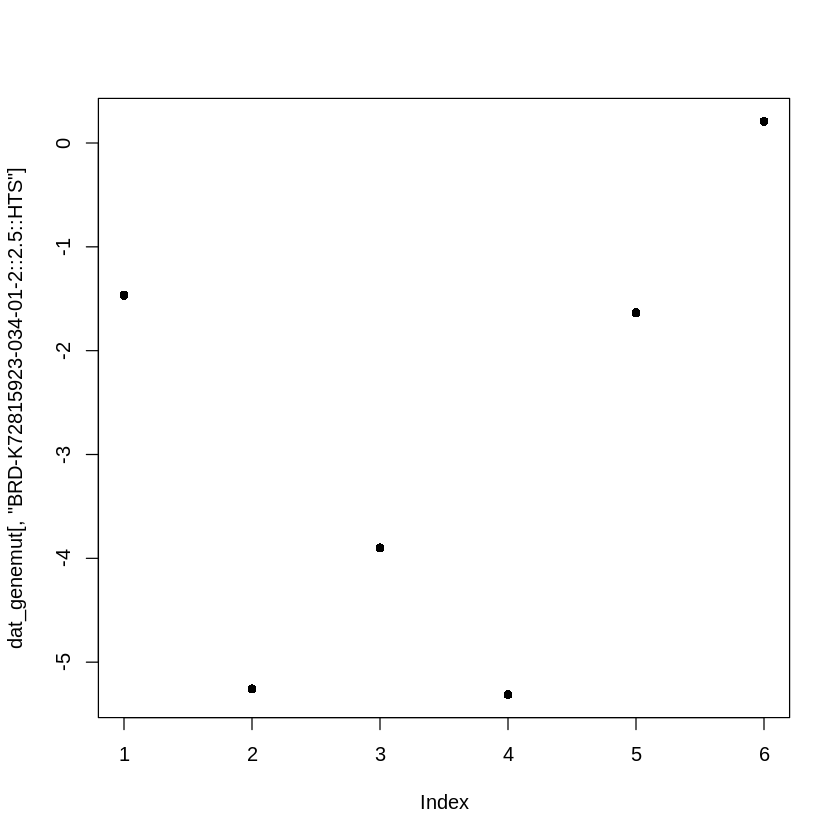

In [ ]:
plot(dat_genemut[,"BRD-K72815923-034-01-2::2.5::HTS"],pch=16)

In [ ]:
i=18
j=222

    gene=hotspots[j]
    #print(hotspots[[j]])
    mutation_sample=dat_mut[dat_mut$Hugo_Symbol==gene,]
    #head(mutation_sample)
    mutation_sample=unique(mutation_sample[,"DepMap_ID"])   #mutation samples
    size=length(intersect(row.names(dat_drug),mutation_sample))
    #if(size==0){next}

#extract samples with obvious drug sensitive and targeted mutation
    G1=drug_Q13[rownames(drug_Q13) %in% mutation_sample,]
    G1$group="mutated"
    G1=G1[,c(j,ncol(G1))]
    G2=drug_Q13[rownames(drug_Q13) %in% mutation_sample,]
    G2$group="not_mutated"
    G2=G2[,c(j,ncol(G2))]
    dat_plot=rbind(G1,G2)
    colnames(dat_plot)[1]="Drug_sensitive"
    dat_plot=na.omit(dat_plot)
    head(dat_plot)
    
    #calculate p-value
    #pvalue=signif(compare_means(Drug_sensitive~group, dat_plot, method="wilcox.test", paired=FALSE)[[5]],3)
    

Drug_sensitive,group
<dbl>,<chr>


## PHARMGKB VS CELL LINES

In [10]:
#READ IN DATA
head(dat_rna)
dim(dat_rna)

head(dat_drug)
dim(dat_drug)

,SCYL3,C1orf112,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,LAS1L,ENPP4,⋯,FMC1-LUC7L2,ZNF559-ZNF177,NCBP2AS2,SRXN1,GTF2H5,NUDT3,KMT2B,ATP6V1FNB,C2orf15,SNURF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1_PROSTATE,0.989,1.389,-1.097,1.739,2.074,1.580,0.708,1.600,1.614,1.091,⋯,1.166,-0.409,1.387,1.600,0.829,1.041,0.760,0.053,0.662,1.999
2313287_STOMACH,1.224,1.125,-0.638,2.233,1.968,1.270,1.178,1.463,1.414,1.204,⋯,0.544,-0.770,1.136,2.232,0.403,1.166,0.550,-0.367,0.930,-0.495
253JBV_URINARY_TRACT,0.412,1.036,-1.222,1.488,1.346,1.156,0.661,0.900,1.991,0.562,⋯,1.501,-0.108,1.569,2.304,0.637,1.009,0.544,-0.102,0.158,1.922
253J_URINARY_TRACT,0.512,0.721,-0.553,1.654,1.289,0.898,0.566,1.004,1.810,0.585,⋯,1.478,0.305,1.341,1.982,0.592,0.701,0.574,-0.328,-0.319,1.832
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.436,0.967,-0.347,1.727,0.922,1.184,1.046,1.602,1.467,0.422,⋯,1.168,0.134,1.207,1.657,0.758,0.909,0.720,-0.638,-0.886,1.941
5637_URINARY_TRACT,0.493,1.500,0.297,1.857,0.989,1.170,0.927,1.158,1.781,0.572,⋯,0.787,-0.155,0.940,1.598,0.565,0.728,0.649,-0.469,0.479,1.695


[1]  1019 13403

,erlotinib:1,AICAR:1001,vinblastine:1004,cisplatin:1005,cytarabine:1006,docetaxel:1007,methotrexate:1008,tretinoin:1009,gefitinib:1010,navitoclax:1011,⋯,ITK inhibitor:63,KIN001-128:64,pyrimethamine:71,JW-7-52-1:83,KIN001-139:86,GW-843682X:87,entinostat:88,parthenolide:89,MG-132:9,TGX-221:94
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACH-000001,NA,NA,-8.436349,NA,NA,-7.275349,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACH-000002,NA,9.252952,-7.069426,3.160163,NA,-7.168425,NA,NA,NA,-3.216113,⋯,NA,NA,NA,NA,NA,NA,-0.01710426,NA,-1.07544447,NA
ACH-000004,NA,10.379682,-4.314050,1.040777,-4.5042887,NA,-6.248732,NA,NA,0.211601,⋯,NA,NA,3.366938,-4.8488346,-0.8412699,-5.945220,-1.08925825,1.657674,-2.14173104,NA
ACH-000006,NA,9.670194,-5.518255,NA,NA,NA,-6.070819,NA,NA,NA,⋯,3.243567,NA,NA,-1.0329983,-2.5707071,-5.045605,-0.64802833,NA,NA,NA
ACH-000007,NA,NA,NA,NA,-0.9143081,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0.1890403,NA,NA,NA,NA,-0.03165351,NA
ACH-000008,NA,10.004112,-5.562190,2.873407,NA,-6.565967,NA,NA,NA,NA,⋯,2.871747,1.429981,NA,-5.6289016,-2.3524978,-6.070098,0.38673194,NA,-4.96433081,NA


[1] 962 310

### Mutation - SNP genotype

In [ ]:
#cell line genotype 1018CL ~ 920 PHARMGKB SNP
dat<-as.data.frame(read.table("SNP_data/CellLine_SNPArray/genotypes/Pharm_SNP_matrix.csv",sep=",",na.strings = c(""),check.names = FALSE,header=T,row.names=1,stringsAsFactors=F))
dat = t(dat)
#head(dat)
dim(dat)

## GDSC v2 - 1000 panel 
#CELL 2016, 990 CL ~ 265 drugs, recoding log IC50s, use cell lines cosmics ID to mark cell lines.
dat_drug=as.data.frame(read.table("dat/CELL_1001CL_265_anticancer_drugs_logIC50.csv",sep=",",row.names=1,check.names = FALSE,header=T,stringsAsFactors=F))
#dat_drug=dat_drug[,-1]
#head(dat_drug)
dim(dat_drug)

#there are some drug not tested in some Cell lines
dat_drug_SNP=merge(dat_drug,dat,by="row.names")
row.names(dat_drug_SNP)=dat_drug_SNP[,1]
dat_drug_SNP=dat_drug_SNP[,-1]
head(dat_drug_SNP)
dim(dat_drug_SNP)

[1] 1018  920

Warning message in file(file, "rt"):
“cannot open file 'dat/CELL_1001CL_265_anticancer_drugs_logIC50.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
#check genotype number of each SNP

#head(dat[row.names(dat_drug_SNP),])
fun<-function(x){length(as.data.frame(table(x))[,1])}
out=as.data.frame(apply(dat[row.names(dat_drug_SNP),],2,fun))
out$SNP=row.names(out)
multiAltSNP=out[which(out[,1]==2),] #>3 OR <2
head(multiAltSNP)

,"apply(dat[row.names(dat_drug_SNP), ], 2, fun)",SNP
,<int>,<chr>
rs11971167,2,rs11971167
rs1800100,2,rs1800100
rs2229107,2,rs2229107


[1] "TL-2-105"

[1] "rs11971167"

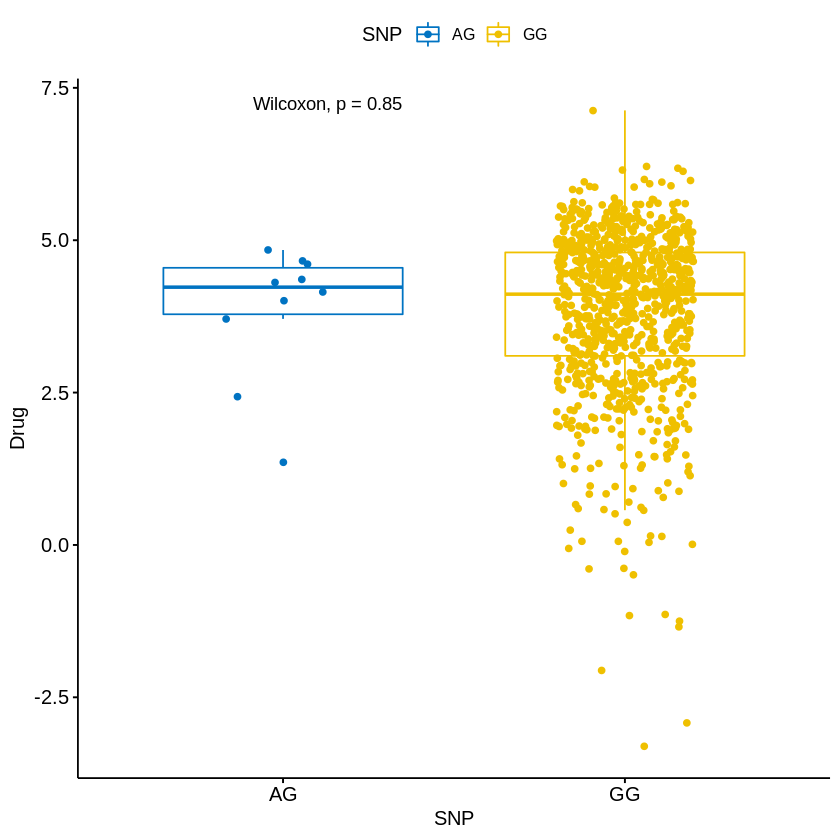

In [ ]:
library(ggplot2)
library(ggpubr)


DrugName=colnames(dat_drug)[2]
SNP="rs11971167"
DrugName
SNP

#for each drug, get non-na cell lines and match back to all SNP genotypes
dat_drug_SNP=merge(dat_drug[!is.na(dat_drug[,DrugName]),c("Sample Names",DrugName)],dat,all.x=T,by="row.names")
row.names(dat_drug_SNP)=dat_drug_SNP[,1]
#dim(dat_drug_SNP)
#head(dat_drug_SNP)

##SNP might have NA as well, table function will ignore them directly
genotypes=as.character(as.data.frame(table(dat_drug_SNP[,SNP]))[,1])
test="wilcox.test"
if(length(genotypes)==3){  #AA AB BB 
    G1=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[1]),c(DrugName,SNP)]
    G2=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[2]),c(DrugName,SNP)]
    G3=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[3]),c(DrugName,SNP)]
    dat_m=rbind(G1,G2,G3)
    colnames(dat_m)=c("Drug","SNP")
    #check if Drug IC50 match norm distrubutation(p>0.05), if yes, use t test, if not Wilcoxon
    if (shapiro.test(G1[,DrugName])$p >0.05 && shapiro.test(G2[,DrugName])$p >0.05 && shapiro.test(G3[,DrugName])$p >0.05){
       test="t.test" 
    }
}

if(length(genotypes)==2){  #AA AB
    G1=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[1]),c(DrugName,SNP)]
    G2=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[2]),c(DrugName,SNP)]
    dat_m=rbind(G1,G2)
    colnames(dat_m)=c("Drug","SNP")
     if (shapiro.test(G1[,DrugName])$p >0.05 && shapiro.test(G2[,DrugName])$p >0.05){
       test="t.test" 
    }
    
}

#head(dat_drug_SNP)
re=compare_means(Drug~SNP, dat_m, method=test, paired=FALSE)
re=re[which(re[,"p.adj"]<0.5),]
p <- ggboxplot(dat_m, x="SNP",
               y = "Drug", color = "SNP",
               palette = "jco", add = "jitter")
# add p-value & plot
p + stat_compare_means()

if(dim(re)[1]!=0){
    re=as.data.frame(re)
    re=cbind(DrugName,SNP,re[,-1])
    re
    }




In [ ]:
#auto run

library(ggplot2)
library(ggpubr)
library(dplyr)
options(scipen = 200)
options(digits=3)

dd=NULL

for (i in 2:ncol(dat_drug)){
#for (i in 2:5){
    DrugName=colnames(dat_drug)[i]
    #for each drug, get non-na cell lines and match back to all SNP genotypes
    dat_drug_SNP=merge(dat_drug[!is.na(dat_drug[,DrugName]),c("Sample Names",DrugName)],dat,all.x=T,by="row.names")
    
    test<-lapply(1:ncol(dat),function(j){
    #test<-lapply(1:10,function(j){
        SNP=colnames(dat)[j]
       ##SNP might have NA as well, table function will ignore them directly
        genotypes=as.character(as.data.frame(table(dat_drug_SNP[,SNP]))[,1])
        test="wilcox.test"
        
        if(length(genotypes)==3){  #AA AB BB 
            G1=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[1]),c(DrugName,SNP)]
            G2=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[2]),c(DrugName,SNP)]
            G3=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[3]),c(DrugName,SNP)]
            dat_m=rbind(G1,G2,G3)
            colnames(dat_m)=c("Drug","SNP")
            #calculate the average IC50 in each genotype group
            ave=as.character(aggregate(dat_m$Drug,by=list(type=dat_m$SNP),mean)[,2])
            #check if Drug IC50 match norm distrubutation(p>0.05), if yes, use t test, if not Wilcoxon
            #if (shapiro.test(G1[,DrugName])$p >0.05 && shapiro.test(G2[,DrugName])$p >0.05 && shapiro.test(G3[,DrugName])$p >0.05){
            #   test="t.test" 
            #}
        }

        if(length(genotypes)==2){  #AA AB
            G1=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[1]),c(DrugName,SNP)]
            G2=dat_drug_SNP[which(dat_drug_SNP[,SNP]==genotypes[2]),c(DrugName,SNP)]
            dat_m=rbind(G1,G2)
            colnames(dat_m)=c("Drug","SNP")
            #calculate the average IC50 in each genotype group
            ave=as.character(aggregate(dat_m$Drug,by=list(type=dat_m$SNP),mean)[,2])
            ave[3]=0
           #  if (shapiro.test(G1[,DrugName])$p >0.05 && shapiro.test(G2[,DrugName])$p >0.05){
           #    test="t.test" 
           # }
    
        }
        #head(dat_drug_SNP)
        re=compare_means(Drug~SNP, dat_m, method=test, paired=FALSE)
        re=re[which(re[,"p.adj"]<0.05),]

        if(dim(re)[1]!=0){
            re=as.data.frame(re)
            re=cbind(DrugName,SNP,re[,-1],ave[1],ave[2],ave[3])
            return(re)
            }
        } )
                 
d<-do.call(rbind, test)
d<-as.data.frame(d)
dd=rbind(dd,d)
    
    }

head(dd)
write.csv(dd,file="out_doc/TEST_drug_snpGROUP.csv",quote=F,row.names=F)

,DrugName,SNP,group1,group2,p,p.adj,p.format,p.signif,method,ave[1],ave[2],ave[3]
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
1,TL-2-105,rs10124893,AA,AG,0.00742,0.0150,0.0074,**,Wilcoxon,3.89848571428571,3.59737288135593,3.93008982035928
2,TL-2-105,rs10124893,AG,GG,0.00162,0.0049,0.0016,**,Wilcoxon,3.89848571428571,3.59737288135593,3.93008982035928
3,TL-2-105,rs10210302,CT,TT,0.00892,0.0270,0.0089,**,Wilcoxon,3.83569060773481,3.71733727810651,4.00509090909091
4,TL-2-105,rs10224002,AA,GA,0.00337,0.0100,0.0034,**,Wilcoxon,3.92105442176871,3.62436,3.83451219512195
5,TL-2-105,rs10513762,CC,CT,0.00198,0.0059,0.002,**,Wilcoxon,3.88616094986807,3.50992647058824,3.96307692307692
6,TL-2-105,rs1051685,AA,GG,0.01070,0.0320,0.011,*,Wilcoxon,3.81743083003953,3.79356589147287,4.353125


### check CCLE 5 signiture genes vs drug response

In [11]:
#READ IN DATA
dat_gene=dat_rna[,c("IL18BP","PALMD","SOCS6","SPP1","WDR35")]
#head(dat_gene)

#Drug response - PRISM 1448 compounds
#The second screen involved 1502 BRD with 8 dose per drug.  Recording log MFI fold change, absolute value smaller is better.
dat_drug=as.data.frame(read.csv("dat/secondary-screen-dose-response-curve-parameters.csv",check.names = FALSE,header=T,stringsAsFactors=F))
#head(dat_drug)

#head(dat_drug)   #1448 compounds, matched with ccle_name

dd=c("drug_name","gene","cor")

for (i in unique(dat_drug$name)){
#d_name="1-phenylbiguanide" #cytarabine
d_name=i
drug=subset(dat_drug,name==d_name) #cytarabine
drug=drug[,c("ccle_name","ic50")]
drug=na.omit(drug)
dim(drug)
#head(drug)

drug=merge(drug,dat_gene,by.y="row.names",by.x="ccle_name")
cutoff=0

if (nrow(drug)>100){
    if (!is.nan(cor(drug$ic50,drug$IL18BP, method ="spearman")) && abs(cor(drug$ic50,drug$IL18BP, method ="spearman"))>=cutoff){re=c(d_name,"IL18BP",cor(drug$ic50,drug$IL18BP));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$ic50,drug$PALMD, method ="spearman")) && abs(cor(drug$ic50,drug$PALMD, method ="spearman"))>=cutoff) {re=c(d_name,"PALMD",cor(drug$ic50,drug$PALMD));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$ic50,drug$SOCS6, method ="spearman")) && abs(cor(drug$ic50,drug$SOCS6, method ="spearman"))>=cutoff) {re=c(d_name,"SOCS6",cor(drug$ic50,drug$SOCS6));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$ic50,drug$SPP1, method ="spearman")) && abs(cor(drug$ic50,drug$SPP1, method ="spearman"))>=cutoff) {re=c(d_name,"SPP1",cor(drug$ic50,drug$SPP1));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$ic50,drug$WDR35, method ="spearman")) && abs(cor(drug$ic50,drug$WDR35, method ="spearman"))>=cutoff) {re=c(d_name,"WDR35",cor(drug$ic50,drug$WDR35));dd=rbind(dd,re)}
}
    
    }

colnames(dd)=dd[1,]
dd=dd[-1,]
dd<-as.data.frame(dd)
#max(as.numeric(as.character(dd$cor)))
#min(as.numeric(as.character(dd$cor)))
head(dd)
dim(dd)

#write.table(dd, file = "out_doc/5gene_compounds_cor.txt", append = FALSE, quote = FALSE, sep = "\t",row.names = FALSE,col.names = TRUE)

Warning message in file(file, "rt"):
“cannot open file 'dat/secondary-screen-dose-response-curve-parameters.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


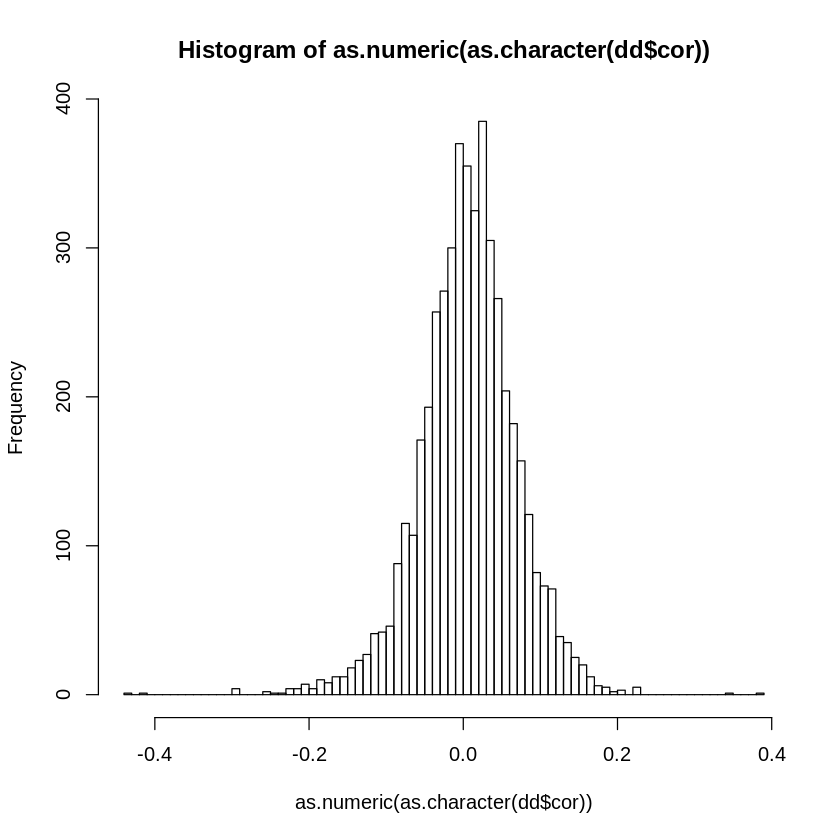

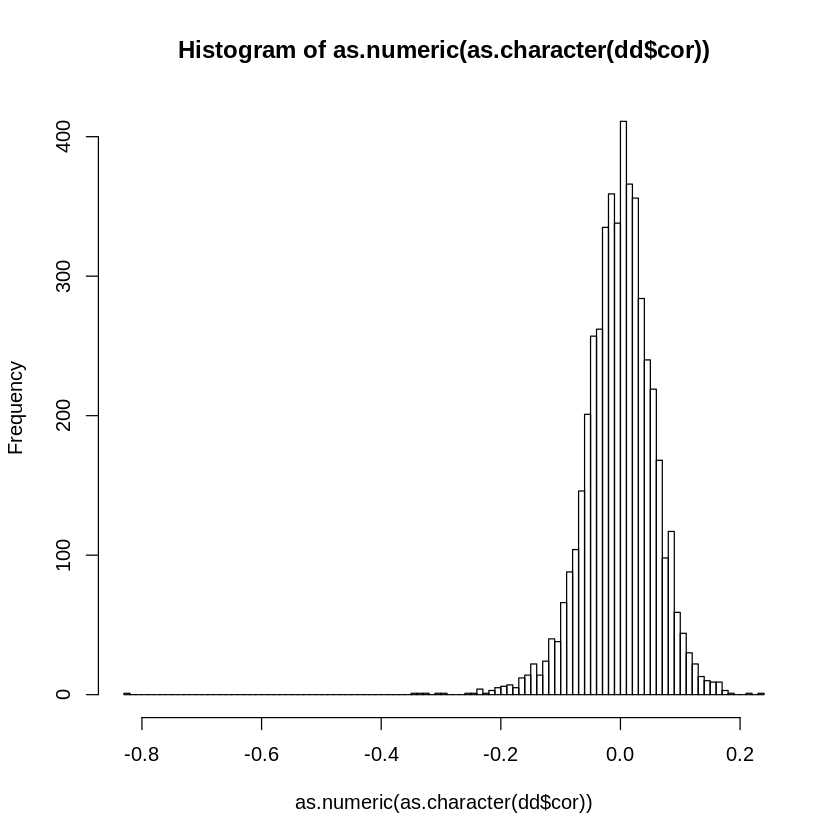

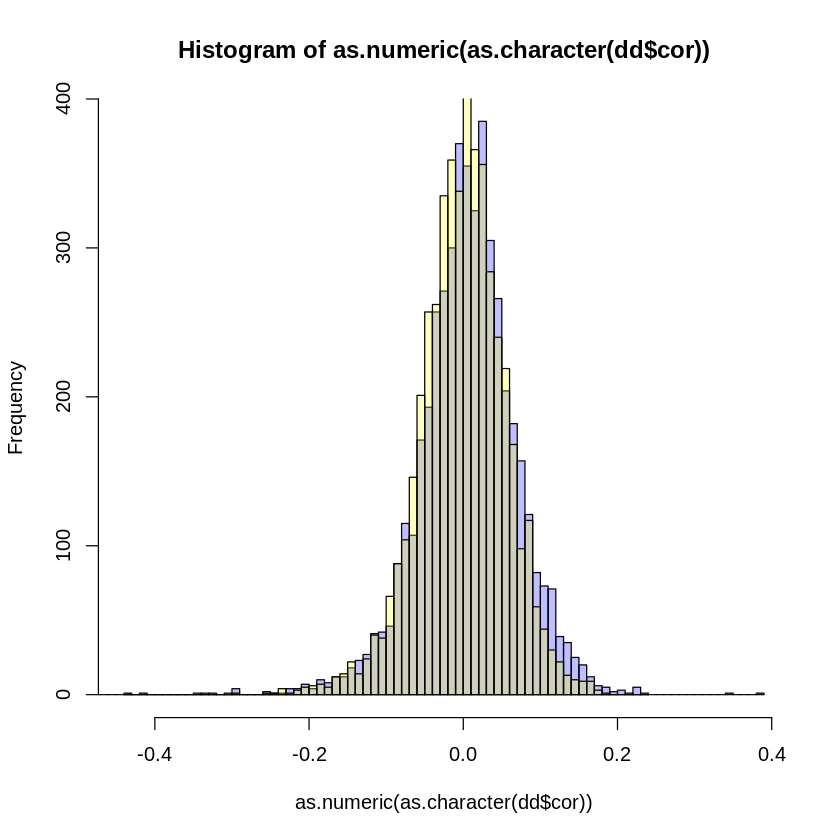

In [ ]:
p1=hist(as.numeric(as.character(dd$cor)),breaks=100)

##############################################################################################################
#permutation test
dd=c("drug_name","gene","cor")

for (i in unique(dat_drug$name)){
#d_name="1-phenylbiguanide" #cytarabine
d_name=i
drug=subset(dat_drug,name==d_name) #cytarabine
drug=drug[,c("ccle_name","ic50")]
drug=na.omit(drug)
drug$ic50=drug$ic50[sample(1:nrow(drug),nrow(drug))]    #shuffle ic50
dim(drug)
#head(drug)

drug=merge(drug,dat_gene,by.y="row.names",by.x="ccle_name")

cutoff=0

if (nrow(drug)>100){
    if (!is.nan(cor(drug$ic50,drug$IL18BP, method ="spearman")) && abs(cor(drug$ic50,drug$IL18BP, method ="spearman"))>=cutoff){re=c(d_name,"IL18BP",cor(drug$ic50,drug$IL18BP));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$ic50,drug$PALMD, method ="spearman")) && abs(cor(drug$ic50,drug$PALMD, method ="spearman"))>=cutoff) {re=c(d_name,"PALMD",cor(drug$ic50,drug$PALMD));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$ic50,drug$SOCS6, method ="spearman")) && abs(cor(drug$ic50,drug$SOCS6, method ="spearman"))>=cutoff) {re=c(d_name,"SOCS6",cor(drug$ic50,drug$SOCS6));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$ic50,drug$SPP1, method ="spearman")) && abs(cor(drug$ic50,drug$SPP1, method ="spearman"))>=cutoff) {re=c(d_name,"SPP1",cor(drug$ic50,drug$SPP1));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$ic50,drug$WDR35, method ="spearman")) && abs(cor(drug$ic50,drug$WDR35, method ="spearman"))>=cutoff) {re=c(d_name,"WDR35",cor(drug$ic50,drug$WDR35));dd=rbind(dd,re)}
}
    
    }



colnames(dd)=dd[1,]
dd=dd[-1,]
dd<-as.data.frame(dd)
#max(as.numeric(as.character(dd$cor)))  
#min(as.numeric(as.character(dd$cor)))

p2=hist(as.numeric(as.character(dd$cor)),breaks=100)

plot(p1,col=rgb(0,0,1,1/4))  #,xlim=c(-0.45,0.4)
plot(p2,col=rgb(1,1,0,1/4),add=T)  # second

In [32]:
#head(dat_rna)
colnames(dat_rna)[grep("PIK3",colnames(dat_rna))]

[1] "PIK3C2A" "PIK3CB"  "PIK3C3"  "PIK3IP1" "PIK3R2"  "PIK3R3"  "PIK3CA" 
 [8] "PIK3C2B" "PIK3R1"  "PIK3AP1" "PIK3CD"  "PIK3R4"

In [44]:
#GDSC
#rna
dat_gene=dat_rna[,c("IL18BP","PALMD","SOCS6","SPP1","WDR35","EGFR")]
#head(dat_rna)

#GDSC website version
dat_drug=as.data.frame(read.csv("dat/GDSC1_v84_drug_logIC50_AUC.csv",check.names = FALSE,header=T,stringsAsFactors=F))
tmp=as.data.frame(read.csv("dat/sample_info.csv",check.names = FALSE,header=T,stringsAsFactors=F))

#remove blood cancer
dim(tmp)
table(tmp$default_growth_pattern)
tmp=subset(tmp,default_growth_pattern!="2D: suspension")
dim(tmp)
length(unique(tmp$COSMICID))

tmp=tmp[,c("cell_line_name","CCLE_Name","COSMICID")]
dat_drug=merge(tmp,dat_drug,by.y="Cosmic ID",by.x="COSMICID")
dat_drug$IC50=as.numeric(as.character(dat_drug$IC50))
length(unique(dat_drug$`Drug ID`))
head(dat_drug)
#hist(dat_drug$IC50,breaks=100)


#calculate risk score
signature<-as.data.frame(read.table("~/workshop/05NPC/final_version/output/cox_lasso_coef_2.txt",header =FALSE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
colnames(signature)=c("ID","coef")
#head(signature)

signature=merge(signature,t(dat_rna),x.all=TRUE,by.x="ID",by.y="row.names")
#sweep(info,1)
row.names(signature)=signature[,1]
signature=signature[,-1]
signature=sweep(data.matrix(signature[,-1]),1,signature$coef, FUN = "*")
#signature
dim(signature)

S_score<-as.data.frame(apply(signature,2,sum))
#S_score$ID=row.names(S_score)
colnames(S_score)[1]="score"
head(S_score)

[1] 1840   29


                                                       2D: adherent 
                              778                               828 
2D: mixed adherent and suspension                    2D: suspension 
                               51                               183 

[1] 1657   29

[1] 878

[1] 403

,COSMICID,cell_line_name,CCLE_Name,Drug Name,Drug ID,Cell Line Name,TCGA Classification,Tissue,Tissue Sub-type,IC50,AUC,Max Conc,RMSE,Z score,Dataset Version
,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,683667,PFSK-1,PFSK1_CENTRAL_NERVOUS_SYSTEM,Zibotentan,266,PFSK-1,MB,nervous_system,medulloblastoma,5.4490681,0.98596729,20.000,0.03481825,-0.04235539,GDSC1
2,683667,PFSK-1,PFSK1_CENTRAL_NERVOUS_SYSTEM,Ruxolitinib,206,PFSK-1,MB,nervous_system,medulloblastoma,4.2754413,0.98807140,5.240,0.02290595,0.33563234,GDSC1
3,683667,PFSK-1,PFSK1_CENTRAL_NERVOUS_SYSTEM,AZD4877,1409,PFSK-1,MB,nervous_system,medulloblastoma,-6.8707323,0.06184408,0.625,0.10331857,-2.19332533,GDSC1
4,683667,PFSK-1,PFSK1_CENTRAL_NERVOUS_SYSTEM,BX795,1037,PFSK-1,MB,nervous_system,medulloblastoma,2.1315366,0.91828963,5.000,0.10124758,0.16744107,GDSC1
5,683667,PFSK-1,PFSK1_CENTRAL_NERVOUS_SYSTEM,ICL1100013,1266,PFSK-1,MB,nervous_system,medulloblastoma,-0.6269971,0.36579271,20.000,0.15585102,-1.43964175,GDSC1
6,683667,PFSK-1,PFSK1_CENTRAL_NERVOUS_SYSTEM,HG-5-113-01,1142,PFSK-1,MB,nervous_system,medulloblastoma,0.8492206,0.70417296,10.000,0.06818418,-0.76557004,GDSC1


[1]    5 1019

,score
,<dbl>
22RV1_PROSTATE,2.5668555
2313287_STOMACH,1.7790808
253JBV_URINARY_TRACT,4.2502594
253J_URINARY_TRACT,-1.1437332
42MGBA_CENTRAL_NERVOUS_SYSTEM,1.2994703
5637_URINARY_TRACT,0.7181847


In [5]:
length(unique(dat_drug$CCLE_Name))
a=as.data.frame(table(dat_drug$`Drug ID`),stringsAsFactors = FALSE)
head(a[order(a$Freq,decreasing=TRUE),])
max(a$Freq)
min(a$Freq)
dim(a)
#head(subset(dat_drug,`Drug Name`=="Cisplatin"))

[1] 851

,Var1,Freq
,<chr>,<int>
393,1494,824
249,1033,823
222,1005,822
224,1007,822
229,1012,822
230,1013,822


[1] 824

[1] 87

[1] 403   2


      EGFR     IL18BP      PALMD Risk Score      SOCS6       SPP1      WDR35 
       395        395        395        395        395        395        395 

,drug_name,feature,cor
,<chr>,<chr>,<chr>
re,266,IL18BP,-0.0268763557706753
re.1,266,PALMD,0.11271407858029
re.2,266,SOCS6,0.322639290190926
re.3,266,SPP1,0.0605092802009807
re.4,266,WDR35,0.193921334980829
re.5,266,Risk Score,0.247249621521546


[1] 2765    3

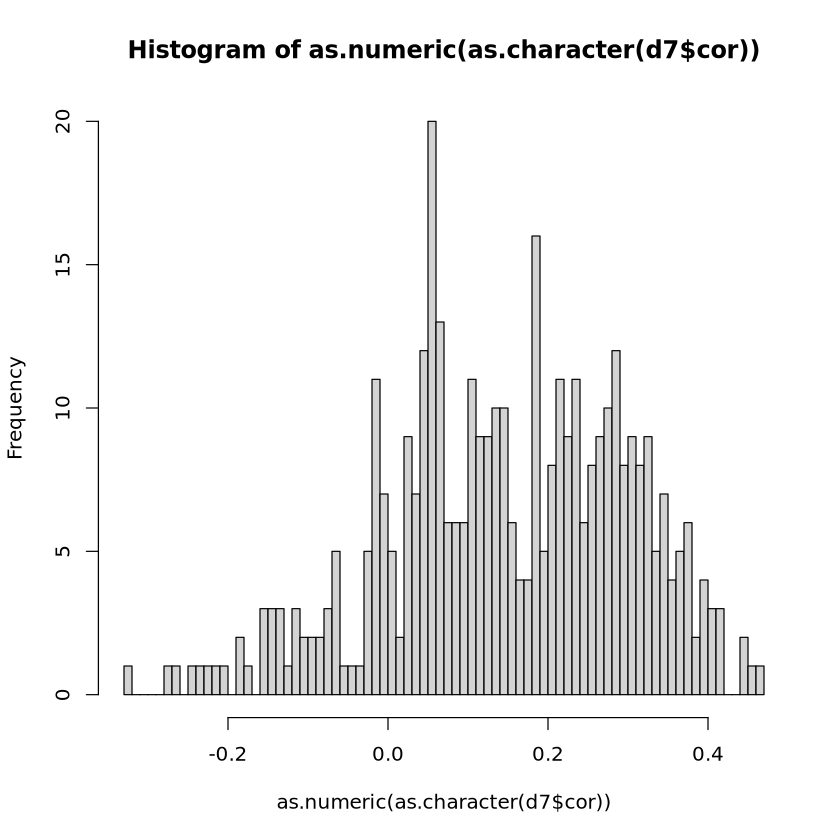

In [63]:
dd=c("drug_name","feature","cor")

for (i in unique(dat_drug$`Drug ID`)){   #288 drugs
    #d_name="1-phenylbiguanide" #cytarabine
    d_name=i
    drug=subset(dat_drug,`Drug ID`==d_name) #cytarabine
    #head(drug)
    drug=drug[,c("CCLE_Name","IC50")]
    drug=na.omit(drug)
    drug=merge(S_score,drug,by.y="CCLE_Name",by.x="row.names")
    drug=merge(drug,dat_gene,by.x="Row.names",by.y="row.names")
    #dim(drug)
    #head(drug)
    cutoff=0

    if (nrow(drug)>100){
        if (!is.nan(cor(drug$IC50,drug$IL18BP, method ="spearman")) && abs(cor(drug$IC50,drug$IL18BP, method ="spearman"))>=cutoff){re=c(d_name,"IL18BP",cor(drug$IC50,drug$IL18BP));dd=rbind(dd,re)}
        if (!is.nan(cor(drug$IC50,drug$PALMD, method ="spearman")) && abs(cor(drug$IC50,drug$PALMD, method ="spearman"))>=cutoff) {re=c(d_name,"PALMD",cor(drug$IC50,drug$PALMD));dd=rbind(dd,re)}
        if (!is.nan(cor(drug$IC50,drug$SOCS6, method ="spearman")) && abs(cor(drug$IC50,drug$SOCS6, method ="spearman"))>=cutoff) {re=c(d_name,"SOCS6",cor(drug$IC50,drug$SOCS6));dd=rbind(dd,re)}
        if (!is.nan(cor(drug$IC50,drug$SPP1, method ="spearman")) && abs(cor(drug$IC50,drug$SPP1, method ="spearman"))>=cutoff) {re=c(d_name,"SPP1",cor(drug$IC50,drug$SPP1));dd=rbind(dd,re)}
        if (!is.nan(cor(drug$IC50,drug$WDR35, method ="spearman")) && abs(cor(drug$IC50,drug$WDR35, method ="spearman"))>=cutoff) {re=c(d_name,"WDR35",cor(drug$IC50,drug$WDR35));dd=rbind(dd,re)}
        if (!is.nan(cor(drug$IC50,drug$score, method ="spearman")) && abs(cor(drug$IC50,drug$score, method ="spearman"))>=cutoff) {re=c(d_name,"Risk Score",cor(drug$IC50,drug$score));dd=rbind(dd,re)}
        if (!is.nan(cor(drug$IC50,drug$EGFR, method ="spearman")) && abs(cor(drug$IC50,drug$EGFR, method ="spearman"))>=cutoff) {re=c(d_name,"EGFR",cor(drug$IC50,drug$EGFR));dd=rbind(dd,re)}

}
    
    }


colnames(dd)=dd[1,]
dd=dd[-1,]
dd<-as.data.frame(dd)
#max(as.numeric(as.character(dd$cor)))
#min(as.numeric(as.character(dd$cor)))
table(dd$feature)

head(dd)
dim(dd)
d1=subset(dd,feature=="IL18BP")
d2=subset(dd,feature=="PALMD")
d3=subset(dd,feature=="SOCS6")
d4=subset(dd,feature=="SPP1")
d5=subset(dd,feature=="WDR35")
d6=subset(dd,feature=="Risk Score")
d7=subset(dd,feature=="EGFR")
#p11=hist(as.numeric(as.character(d1$cor)),breaks=100)
#p12=hist(as.numeric(as.character(d2$cor)),breaks=100)
#p13=hist(as.numeric(as.character(d3$cor)),breaks=100)
#p14=hist(as.numeric(as.character(d4$cor)),breaks=100)
#p15=hist(as.numeric(as.character(d5$cor)),breaks=100)
#p16=hist(as.numeric(as.character(d6$cor)),breaks=100)
p17=hist(as.numeric(as.character(d7$cor)),breaks=100)

#write.table(dd, file = "out_doc/5gene_drugs_cor.txt", append = FALSE, quote = FALSE, sep = "\t",row.names = FALSE,col.names = TRUE)

In [65]:
d=subset(dd,`feature`=="EGFR")
d$cor = as.numeric(d$cor)
d[order(d$cor,decreasing = T),]

,drug_name,feature,cor
,<chr>,<chr>,<dbl>
re.503,275,EGFR,0.4692499
re.2204,265,EGFR,0.4503664
re.1469,211,EGFR,0.4486833
re.2085,290,EGFR,0.4421009
re.734,264,EGFR,0.4146772
re.2197,412,EGFR,0.4106659
re.559,257,EGFR,0.4104188
re.1392,286,EGFR,0.4071548
re.979,254,EGFR,0.4063791


,drug_name,feature,cor
,<chr>,<chr>,<chr>
re,266,IL18BP,-0.0268763557706753
re.1,266,PALMD,0.11271407858029
re.2,266,SOCS6,0.322639290190926
re.3,266,SPP1,0.0605092802009807
re.4,266,WDR35,0.193921334980829
re.5,266,Risk Score,0.247249621521546


,drug_name,feature,cor
,<chr>,<chr>,<chr>
re.2204,265,EGFR,0.4503664075774


[1] 0.3765437

[1] 533   9

`geom_smooth()` using formula = 'y ~ x'
Warning message in cor.test.default(drug$IC50, drug$EGFR, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  drug$IC50 and drug$EGFR
S = 15733844, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3765437 


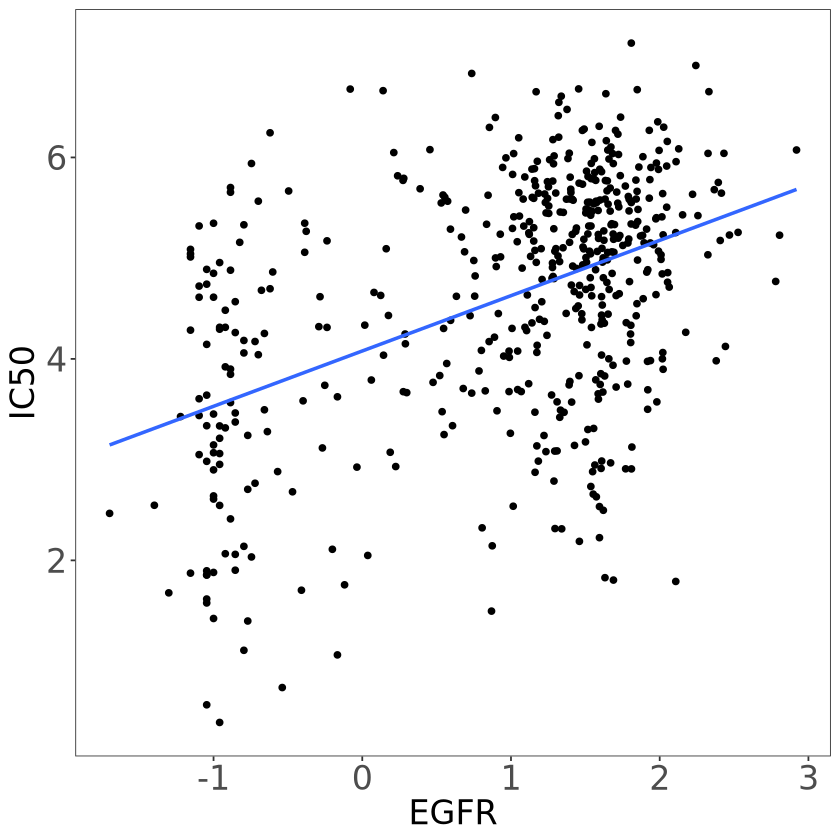

In [58]:

d_name ="265"
head(dd)
subset(dd,drug_name==d_name & feature == "EGFR")   #Afatinib 1032; TGX221 94

drug=subset(dat_drug,`Drug ID`==d_name) #cytarabine
    #head(drug)
    drug=drug[,c("CCLE_Name","IC50")]
    drug=na.omit(drug)
    drug=merge(S_score,drug,by.y="CCLE_Name",by.x="row.names")
    drug=merge(drug,dat_gene,by.x="Row.names",by.y="row.names")

cor(drug$IC50,drug$EGFR, method ="spearman")
dim(drug)

library(ggplot2)
p =ggplot(drug, aes(EGFR,IC50)) +geom_point() +theme_bw() + geom_smooth(method = lm,se = FALSE)+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),axis.text=element_text(size=20),axis.title=element_text(size=20))
p

#correlation
correlation_result <- cor.test(drug$IC50, drug$EGFR, method = "spearman")
correlation_result

,drug_name,feature,cor
,<chr>,<chr>,<chr>
re,Zibotentan,IL18BP,-0.0625416827673686
re.1,Zibotentan,PALMD,-0.0267161910359007
re.2,Zibotentan,SOCS6,-0.0203002600274164
re.3,Zibotentan,SPP1,0.00636878490500285
re.4,Zibotentan,WDR35,-0.0209838820173214
re.5,Zibotentan,Risk Score,-0.0260585998398698


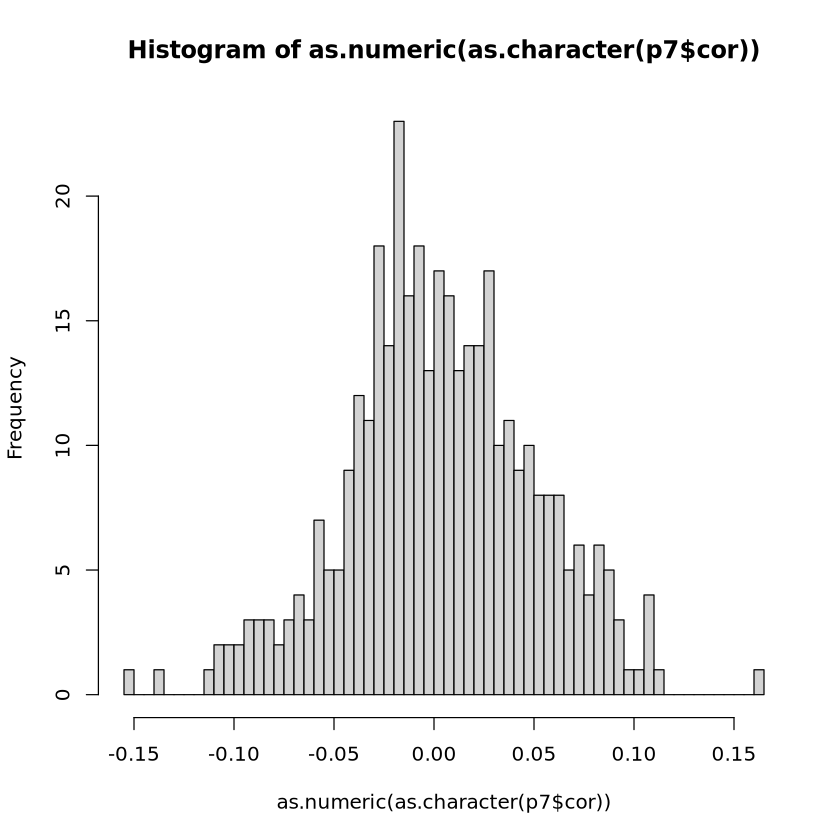

In [31]:
#p1=hist(as.numeric(as.character(dd$cor)),breaks=100)

##############################################################################################################
#permutation test

dd=c("drug_name","feature","cor")


for (i in unique(dat_drug$`Drug Name`)){   #288 drugs
#d_name="1-phenylbiguanide" #cytarabine
d_name=i
drug=subset(dat_drug,`Drug Name`==d_name) #cytarabine
drug=drug[,c("CCLE_Name","IC50")]
drug=na.omit(drug)
drug=merge(S_score,drug,by.y="CCLE_Name",by.x="row.names")
drug=merge(drug,dat_gene,by.x="Row.names",by.y="row.names")
drug$IC50=drug$IC50[sample(1:nrow(drug),nrow(drug))]    #shuffle IC50
dim(drug)
#head(drug)

cutoff=0

if (nrow(drug)>100){
    if (!is.nan(cor(drug$IC50,drug$IL18BP, method ="spearman")) && abs(cor(drug$IC50,drug$IL18BP, method ="spearman"))>=cutoff){re=c(d_name,"IL18BP",cor(drug$IC50,drug$IL18BP));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$PALMD, method ="spearman")) && abs(cor(drug$IC50,drug$PALMD, method ="spearman"))>=cutoff) {re=c(d_name,"PALMD",cor(drug$IC50,drug$PALMD));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$SOCS6, method ="spearman")) && abs(cor(drug$IC50,drug$SOCS6, method ="spearman"))>=cutoff) {re=c(d_name,"SOCS6",cor(drug$IC50,drug$SOCS6));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$SPP1, method ="spearman")) && abs(cor(drug$IC50,drug$SPP1, method ="spearman"))>=cutoff) {re=c(d_name,"SPP1",cor(drug$IC50,drug$SPP1));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$WDR35, method ="spearman")) && abs(cor(drug$IC50,drug$WDR35, method ="spearman"))>=cutoff) {re=c(d_name,"WDR35",cor(drug$IC50,drug$WDR35));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$score, method ="spearman")) && abs(cor(drug$IC50,drug$score, method ="spearman"))>=cutoff) {re=c(d_name,"Risk Score",cor(drug$IC50,drug$score));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$EGFR, method ="spearman")) && abs(cor(drug$IC50,drug$EGFR, method ="spearman"))>=cutoff) {re=c(d_name,"EGFR",cor(drug$IC50,drug$EGFR));dd=rbind(dd,re)}

}
    
    }


colnames(dd)=dd[1,]
dd=dd[-1,]
dd<-as.data.frame(dd)
head(dd)

p1=subset(dd,feature=="IL18BP")
p2=subset(dd,feature=="PALMD")
p3=subset(dd,feature=="SOCS6")
p4=subset(dd,feature=="SPP1")
p5=subset(dd,feature=="WDR35")
p6=subset(dd,feature=="Risk Score")
p7=subset(dd,feature=="EGFR")
#p21=hist(as.numeric(as.character(p1$cor)),breaks=100)
#p22=hist(as.numeric(as.character(p2$cor)),breaks=100)
#p23=hist(as.numeric(as.character(p3$cor)),breaks=100)
#p24=hist(as.numeric(as.character(p4$cor)),breaks=100)
#p25=hist(as.numeric(as.character(p5$cor)),breaks=100)
#p26=hist(as.numeric(as.character(p6$cor)),breaks=100)
p27=hist(as.numeric(as.character(p7$cor)),breaks=100)
#plot(p11,col=rgb(0,0,1,1/4),xlim=c(-0.4,0.5),ylim=c(0,20))
#plot(p21,col=rgb(1,1,0,1/4),add=T)  # second

In [27]:
#head(d1)
#dim(d1)
#head(p1)
#dim(p1)

# Compute t-test (mean of the differences, p-value)
t.test(as.numeric(as.character(d2$cor)), as.numeric(as.character(p2$cor)), paired = TRUE)  #PALMD
t.test(as.numeric(as.character(d3$cor)), as.numeric(as.character(p3$cor)), paired = TRUE)   #SOCS6
t.test(as.numeric(as.character(d5$cor)), as.numeric(as.character(p5$cor)), paired = TRUE)   #WDR35

#other groups
t.test(as.numeric(as.character(d1$cor)), as.numeric(as.character(p1$cor)), paired = TRUE)   #IL18BP
t.test(as.numeric(as.character(d4$cor)), as.numeric(as.character(p4$cor)), paired = TRUE)   #SPP1
t.test(as.numeric(as.character(d6$cor)), as.numeric(as.character(p6$cor)), paired = TRUE)   #Score


	Paired t-test

data:  as.numeric(as.character(d2$cor)) and as.numeric(as.character(p2$cor))
t = 15.272, df = 394, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.06028789 0.07810291
sample estimates:
mean difference 
      0.0691954 



	Paired t-test

data:  as.numeric(as.character(d3$cor)) and as.numeric(as.character(p3$cor))
t = 20.907, df = 394, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.1117699 0.1349729
sample estimates:
mean difference 
      0.1233714 



	Paired t-test

data:  as.numeric(as.character(d5$cor)) and as.numeric(as.character(p5$cor))
t = 12.602, df = 394, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.05062152 0.06933655
sample estimates:
mean difference 
     0.05997904 



	Paired t-test

data:  as.numeric(as.character(d1$cor)) and as.numeric(as.character(p1$cor))
t = 0.928, df = 394, p-value = 0.354
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.003806811  0.010613544
sample estimates:
mean difference 
    0.003403366 



	Paired t-test

data:  as.numeric(as.character(d4$cor)) and as.numeric(as.character(p4$cor))
t = 1.9101, df = 394, p-value = 0.05684
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.0002654333  0.0184196961
sample estimates:
mean difference 
    0.009077131 



	Paired t-test

data:  as.numeric(as.character(d6$cor)) and as.numeric(as.character(p6$cor))
t = 17.497, df = 394, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 0.08714121 0.10920297
sample estimates:
mean difference 
     0.09817209 


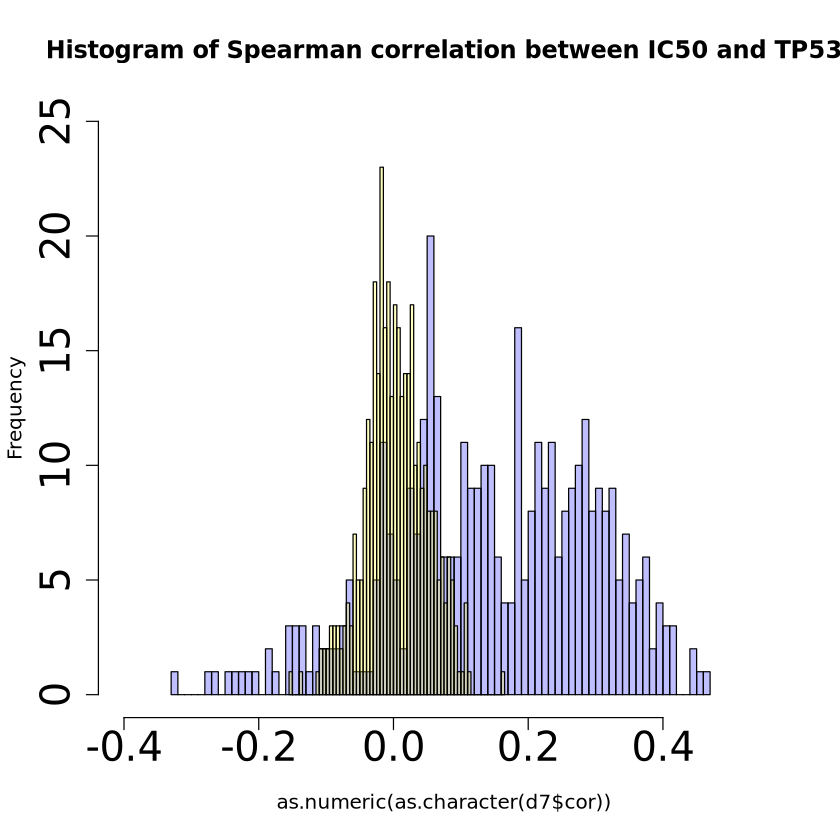

In [42]:
plot(p17,col=rgb(0,0,1,1/4),xlim=c(-0.4,0.55),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and TP53")
plot(p27,col=rgb(1,1,0,1/4),add=T)  # second

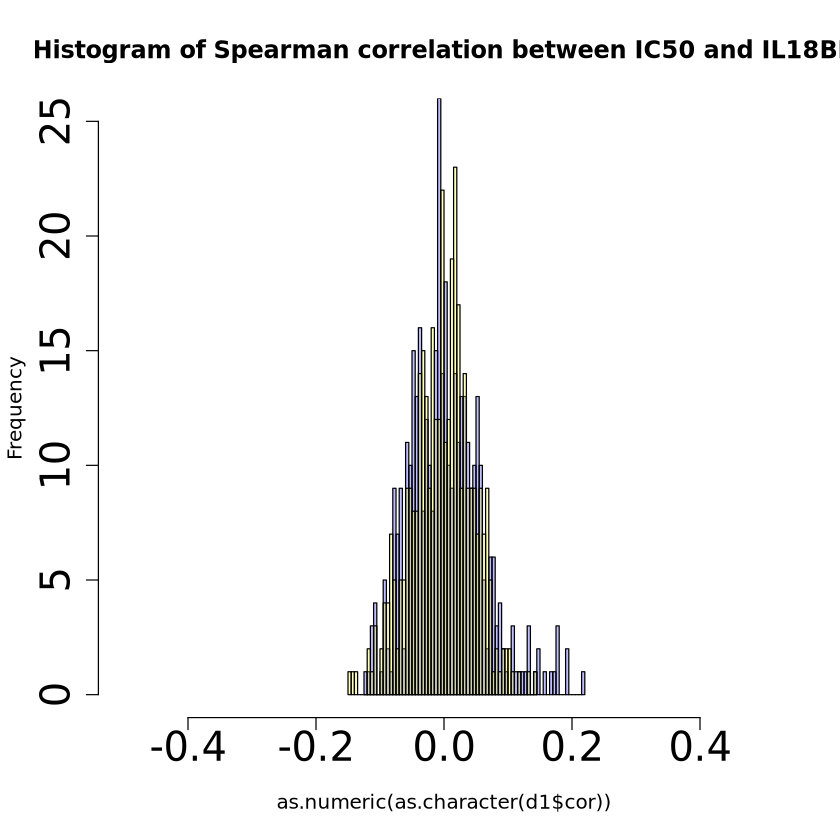

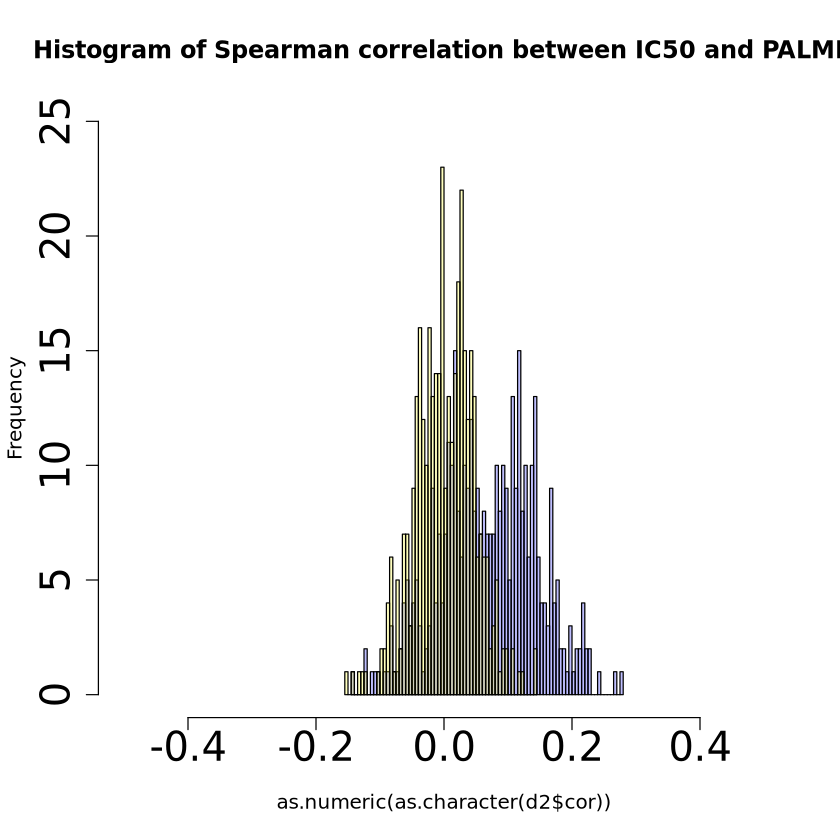

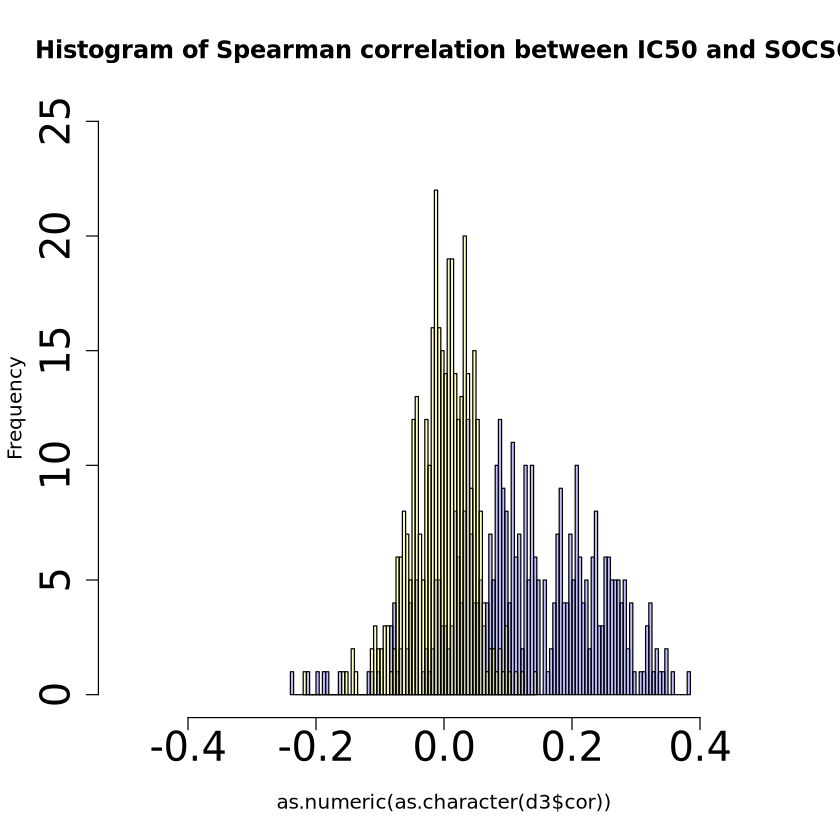

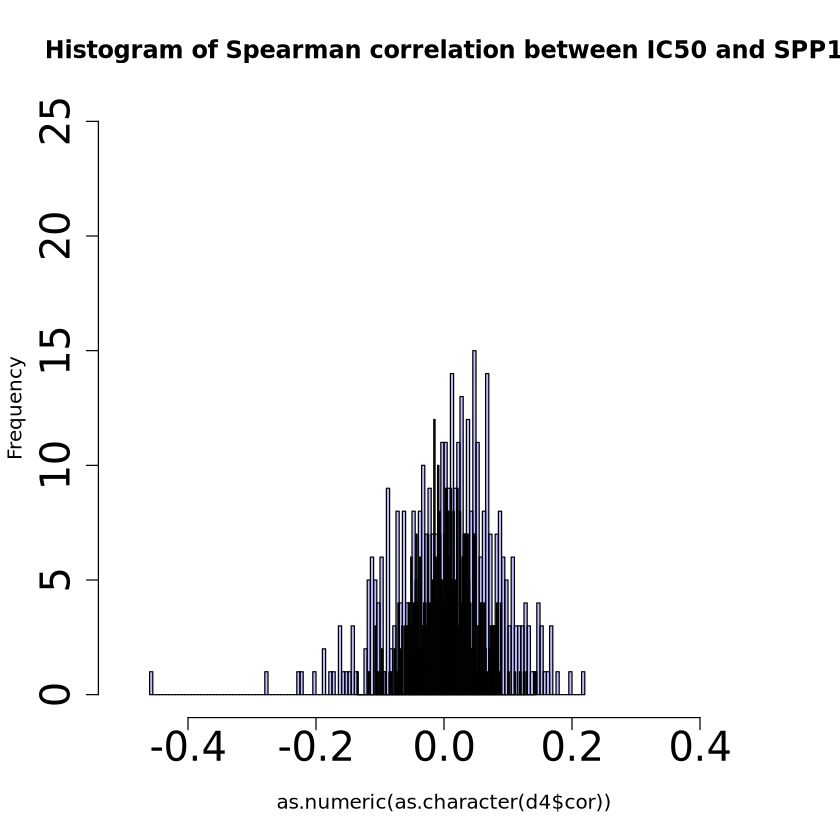

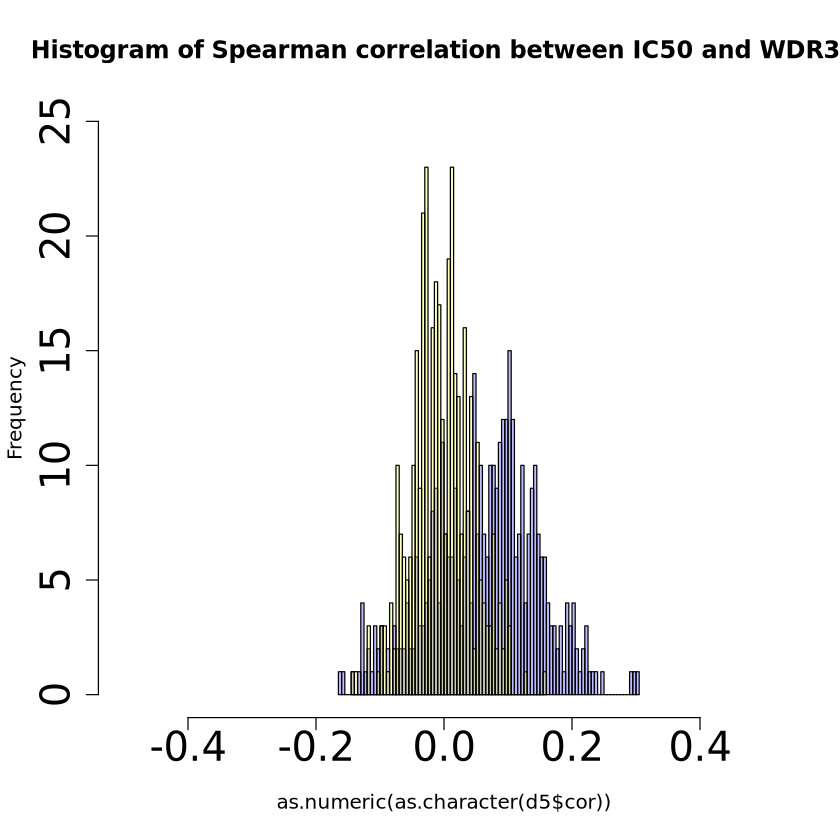

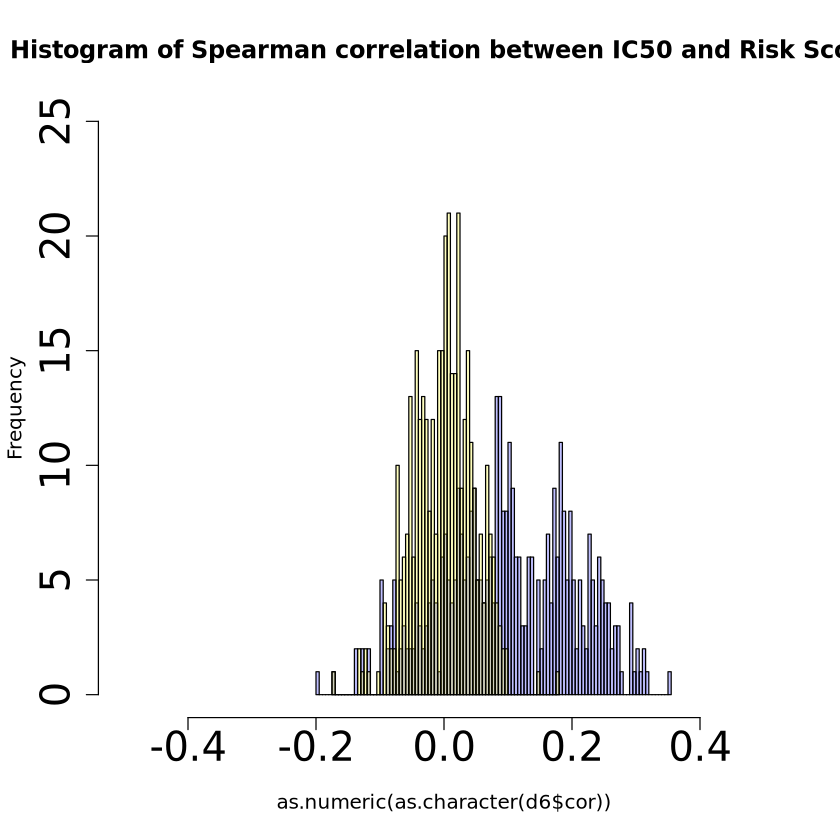

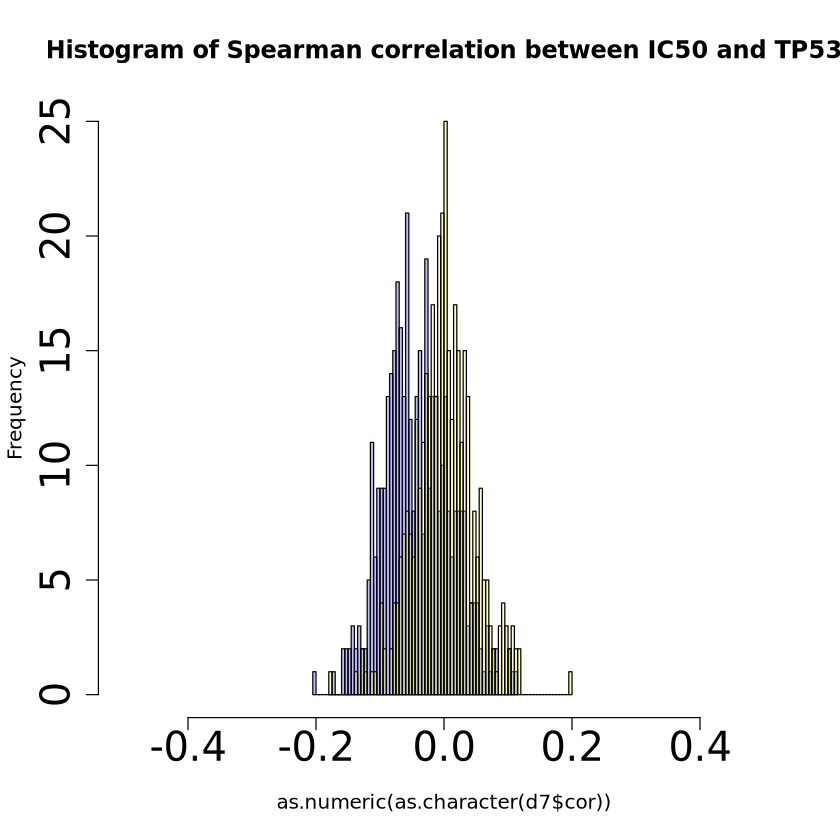

In [6]:
#pdf(file="hist_corelation_permutation.pdf")

#par(mfrow=c(2,2))
plot(p11,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.5),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and IL18BP")
#abline(v=0,col="red")
#abline(v=0.2,col="red",lty=3)
#abline(v=-0.2,col="red",lty=3)
plot(p21,col=rgb(1,1,0,1/4),add=T)  # second

plot(p12,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.5),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and PALMD")
plot(p22,col=rgb(1,1,0,1/4),add=T)  # second

plot(p13,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.5),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and SOCS6")
plot(p23,col=rgb(1,1,0,1/4),add=T)  # second

plot(p14,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.5),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and SPP1")
plot(p24,col=rgb(1,1,0,1/4),add=T)  # second

plot(p15,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.5),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and WDR35")
plot(p25,col=rgb(1,1,0,1/4),add=T)  # second

plot(p16,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.5),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and Risk Score")
plot(p26,col=rgb(1,1,0,1/4),add=T)  # second

plot(p17,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.5),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and TP53")
plot(p27,col=rgb(1,1,0,1/4),add=T)  # second
#dev.off()

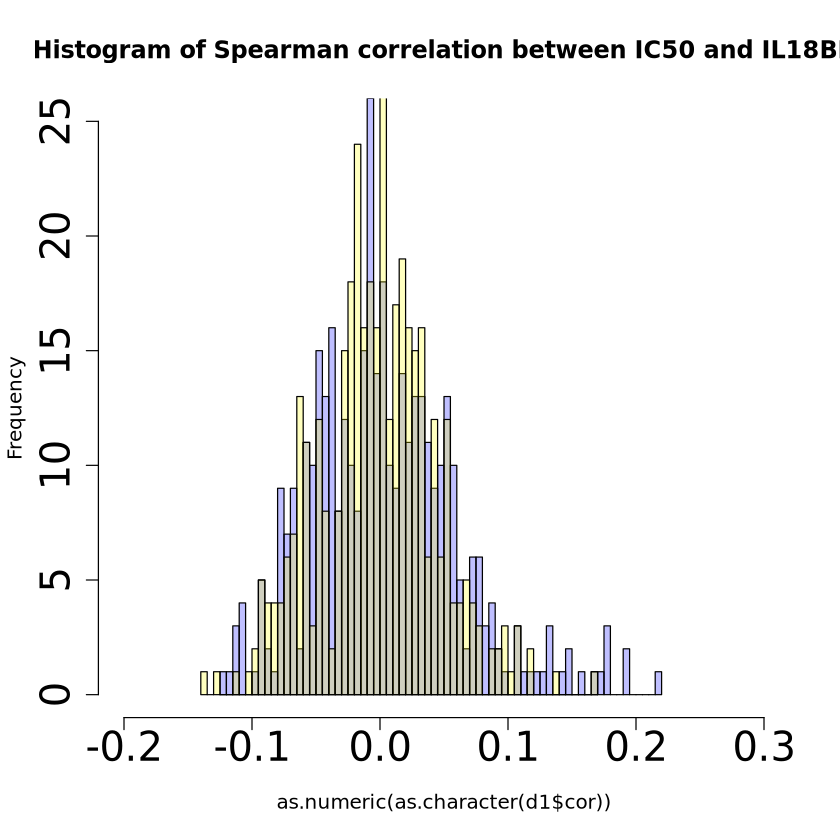

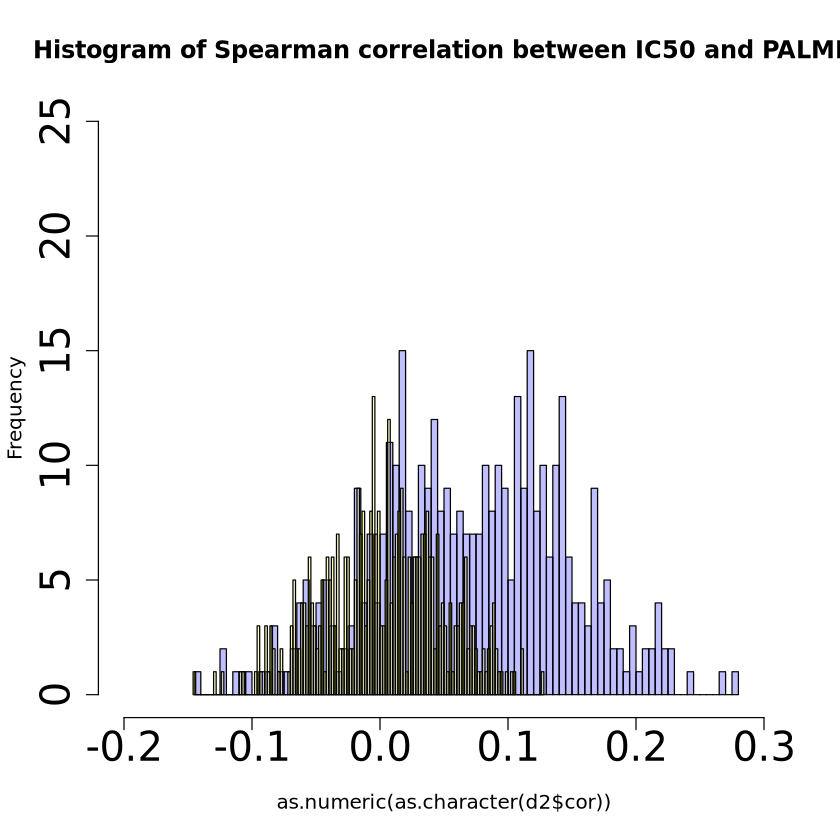

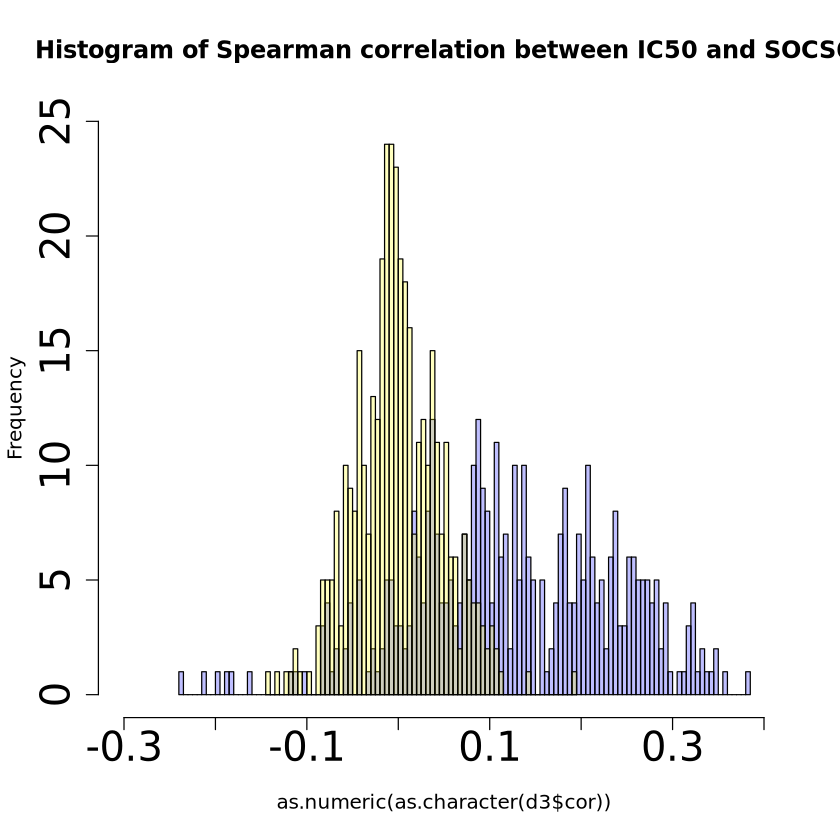

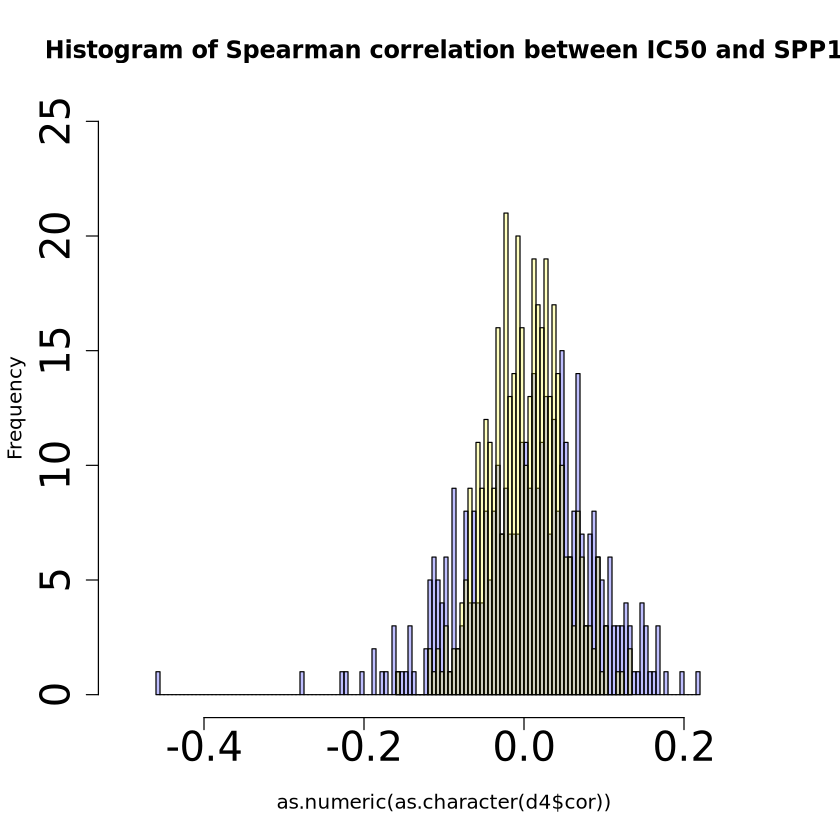

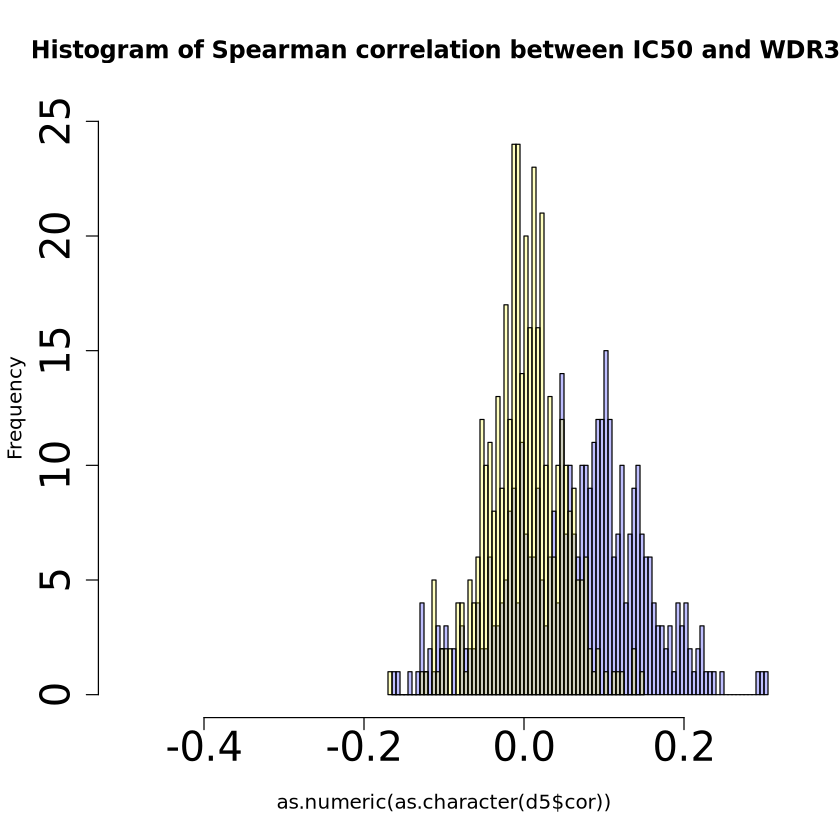

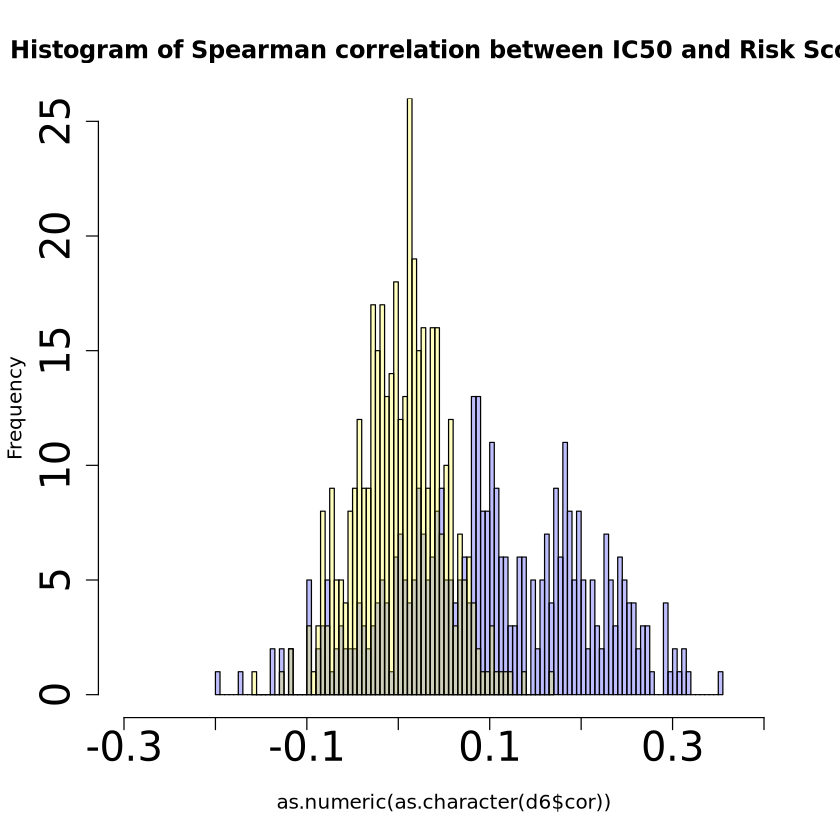

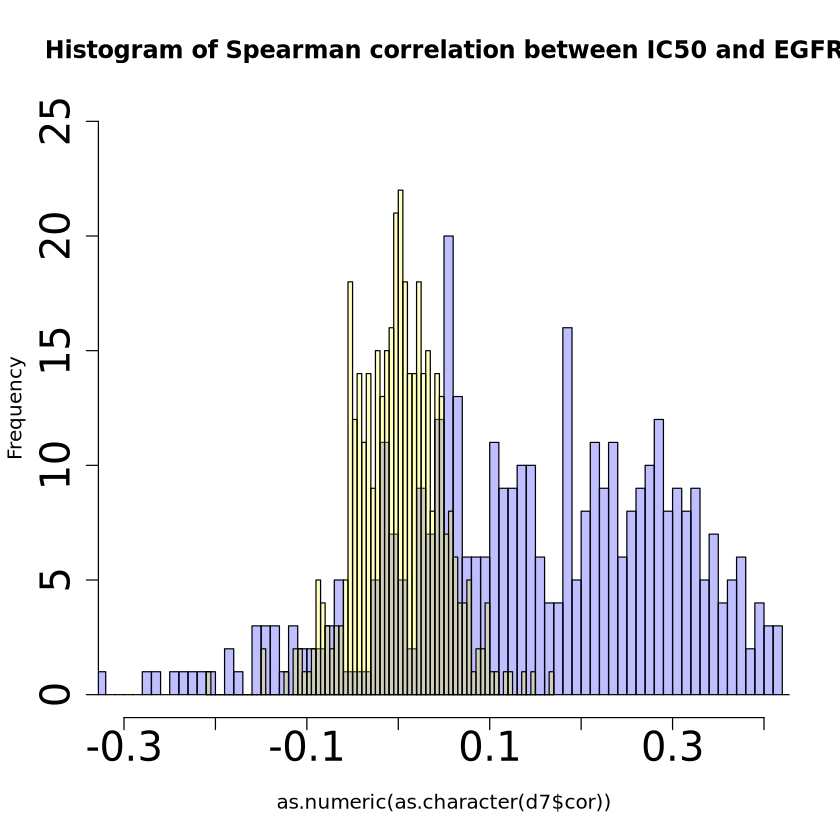

In [ ]:
#pdf(file="hist_corelation_permutation.pdf")

#par(mfrow=c(2,2))
plot(p11,col=rgb(0,0,1,1/4),xlim=c(-0.2,0.3),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and IL18BP")
#abline(v=0,col="red")
#abline(v=0.2,col="red",lty=3)
#abline(v=-0.2,col="red",lty=3)
plot(p21,col=rgb(1,1,0,1/4),add=T)  # second

plot(p12,col=rgb(0,0,1,1/4),xlim=c(-0.2,0.3),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and PALMD")
plot(p22,col=rgb(1,1,0,1/4),add=T)  # second

plot(p13,col=rgb(0,0,1,1/4),xlim=c(-0.3,0.4),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and SOCS6")
plot(p23,col=rgb(1,1,0,1/4),add=T)  # second

plot(p14,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.3),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and SPP1")
plot(p24,col=rgb(1,1,0,1/4),add=T)  # second

plot(p15,col=rgb(0,0,1,1/4),xlim=c(-0.5,0.3),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and WDR35")
plot(p25,col=rgb(1,1,0,1/4),add=T)  # second

plot(p16,col=rgb(0,0,1,1/4),xlim=c(-0.3,0.4),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and Risk Score")
plot(p26,col=rgb(1,1,0,1/4),add=T)  # second

plot(p17,col=rgb(0,0,1,1/4),xlim=c(-0.3,0.4),ylim=c(0,25),cex.axis=2,main="Histogram of Spearman correlation between IC50 and EGFR")
plot(p27,col=rgb(1,1,0,1/4),add=T)  # second
#dev.off()

In [20]:

#d_name="1-phenylbiguanide" #cytarabine
d_name= "lapatinib" #"Alpelisib" #Idelalisib"  #Trametinib" #TGX221 Dabrafenib
drug=subset(dat_drug,`Drug Name`==d_name) #1372 1373
drug=drug[,c("CCLE_Name","IC50")]
drug=na.omit(drug)
drug=merge(drug,dat_gene,by.y="row.names",by.x="CCLE_Name")
dim(drug)
head(drug)

model <- lm(EGFR ~ IC50, data = drug)
summary(model)$coefficients[2, 4]
confint(model)[2, ]

#correlation
correlation_result <- cor.test(drug$IC50, drug$EGFR, method = "spearman")
correlation_result

library(ggplot2)
p =ggplot(drug, aes(EGFR,IC50)) +geom_point() + geom_smooth(method = lm,se = FALSE)+theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),axis.text=element_text(size=20),axis.title=element_text(size=20))
p

#pdf(file="IL18BP_trametinib_cor.pdf")
#p
#dev.off()

[1]  0 13

CCLE_Name,IC50,IL18BP,PALMD,SOCS6,SPP1,WDR35,PIK3CB,PIK3CA,PIK3CD,PIK3C2A,PIK3C2B,EGFR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


In [27]:
#GDSC - depmap
#rna
dat_rna=dat_rna[,c("IL18BP","PALMD","SOCS6","SPP1","WDR35","EGFR")]
#head(dat_rna)

#GDSC website version
dat_drug=as.data.frame(read.csv("dat/Drug_sensitivity_IC50_Sanger_GDSC1.csv",check.names = FALSE,row.names=1,header=T,stringsAsFactors=F))

tmp=as.data.frame(read.csv("dat/sample_info.csv",check.names = FALSE,header=T,stringsAsFactors=F))
tmp=tmp[,c("DepMap_ID","CCLE_Name")]
dat_drug=merge(tmp,dat_drug,by.y="row.names",by.x="DepMap_ID")
drug=merge(dat_rna,dat_drug,by.y="CCLE_Name",by.x="row.names")
row.names(drug)=drug[,1]
drug=drug[,-c(1,8)] #DepMap_ID 
head(drug)

,IL18BP,PALMD,SOCS6,SPP1,WDR35,EGFR,erlotinib (GDSC1:1),AICAR (GDSC1:1001),vinblastine (GDSC1:1004),cisplatin (GDSC1:1005),⋯,ITK inhibitor (GDSC1:63),KIN001-128 (GDSC1:64),pyrimethamine (GDSC1:71),JW-7-52-1 (GDSC1:83),KIN001-139 (GDSC1:86),GW-843682X (GDSC1:87),entinostat (GDSC1:88),parthenolide (GDSC1:89),MG-132 (GDSC1:9),TGX-221 (GDSC1:94)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1_PROSTATE,0.929,0.611,0.787,-1.523,0.912,0.785,NA,NA,-6.230997,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2313287_STOMACH,0.393,-0.745,1.346,-0.569,0.599,1.045,NA,NA,-6.710700,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.828,-1.155,0.922,0.267,0.628,1.461,NA,10.30423,-6.626177,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5637_URINARY_TRACT,0.305,-1.699,1.076,-0.658,0.634,1.919,NA,NA,-9.311574,2.780856,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
639V_URINARY_TRACT,0.824,-0.886,1.008,0.621,1.201,1.279,NA,NA,-6.924519,2.285541,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
647V_URINARY_TRACT,0.468,-1.699,0.975,0.140,0.324,1.809,NA,NA,-4.980884,2.567980,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,gene,drug,spearman_cor
,<chr>,<chr>,<chr>
re,WDR35,AICAR (GDSC1:1001),0.0875329971531173
re.1,WDR35,vinblastine (GDSC1:1004),0.0666583103661292
re.2,WDR35,navitoclax (GDSC1:1011),0.0698606682259386
re.3,WDR35,vorinostat (GDSC1:1012),0.0850591807075238
re.4,WDR35,CI 1040 (GDSC1:1015),0.00594807526195346


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.29265  0.02171  0.11622  0.13047  0.24439  0.53012 

,gene,drug,spearman_cor
,<chr>,<chr>,<chr>
re,WDR35,AICAR (GDSC1:1001),0.0640450351475497
re.1,WDR35,cytarabine (GDSC1:1006),0.125232147583714
re.2,WDR35,docetaxel (GDSC1:1007),0.126830473947824
re.3,WDR35,navitoclax (GDSC1:1011),0.0565998432026877
re.4,WDR35,vorinostat (GDSC1:1012),0.0401435227070787


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.208393 -0.037941  0.005055  0.006250  0.046653  0.230321 

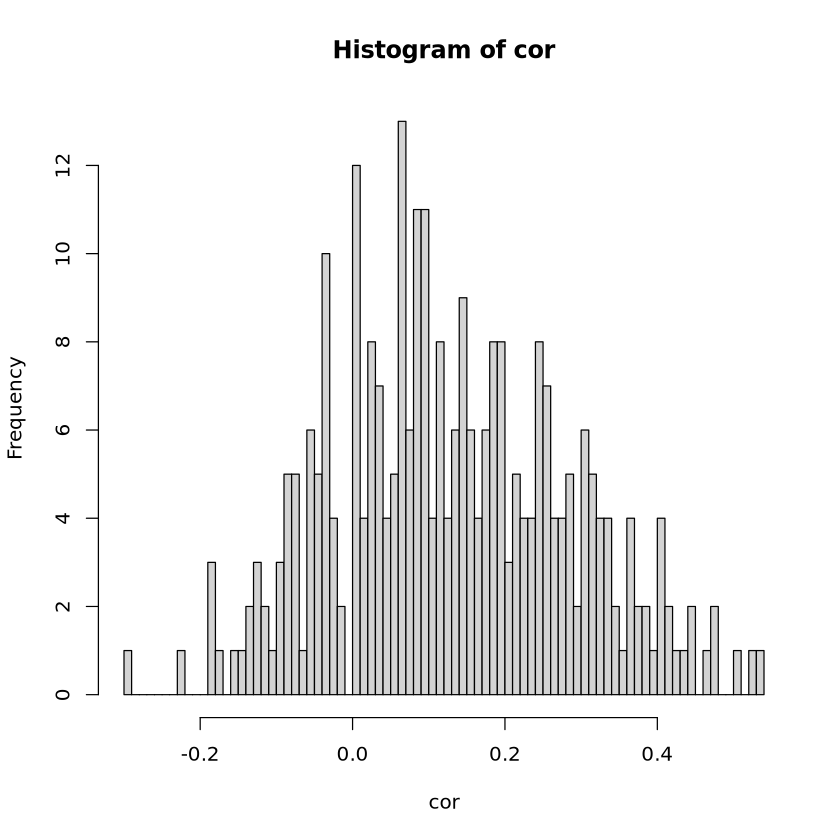

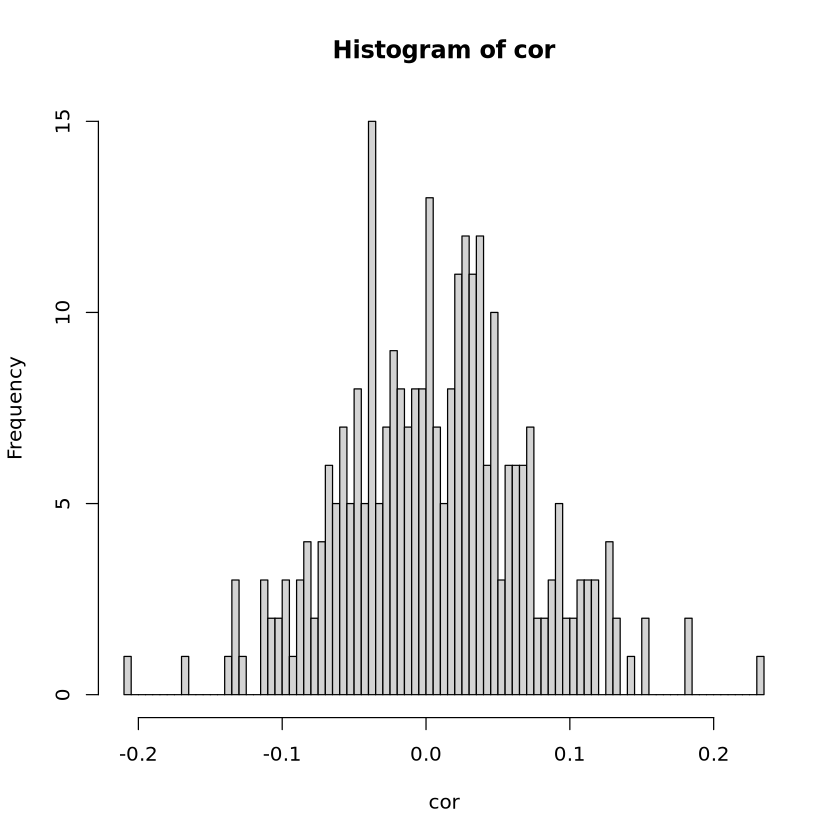

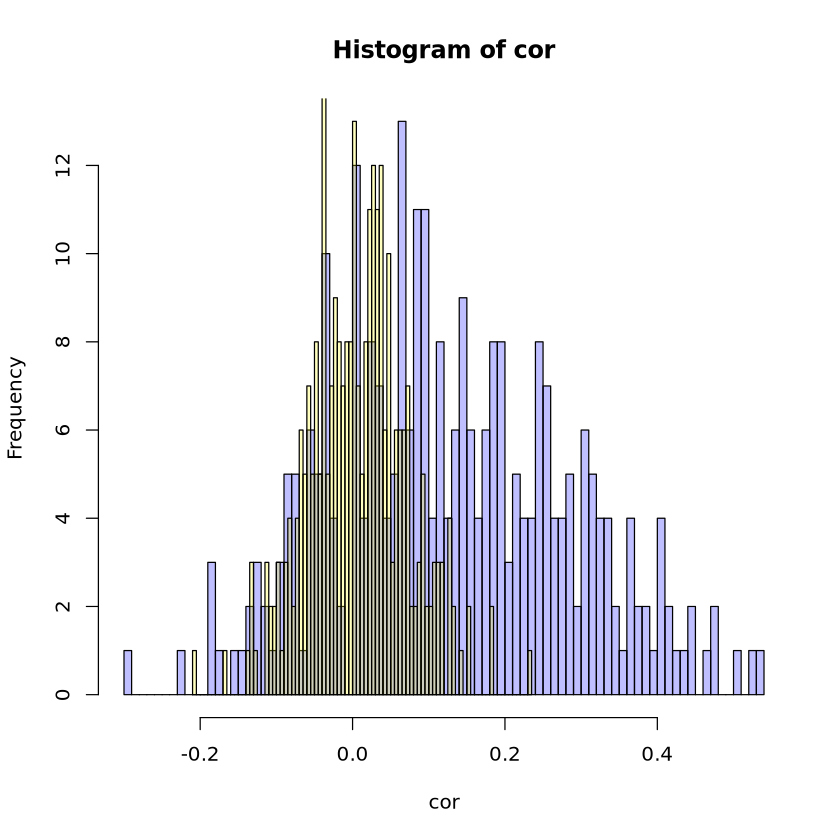

In [28]:
#COORELATION
cor <- 0
d<-c("0","0","0")
for (i in 1:5) {
    for (j in 6:dim(drug)[2]) {
        non_NA <- !is.na(drug[,j])
        x=drug[non_NA,i]  #gene exp
        if (length(x)<100){next}
        cor_n <- cor(x, y = drug[non_NA,j], method = "spearman")
        cor<-append(cor,cor_n)
        if(as.numeric(as.character(cor_n))>0){
            gene<-colnames(drug)[i]
            drug_name<-colnames(drug)[j]
            re<-c(gene,drug_name,cor_n)
            d<-rbind(d,re)
        }
    }
}

d<-as.data.frame(d)
colnames(d)<-c("gene","drug","spearman_cor")
d<-d[-1,]
d[1:5,]

cor<-cor[-1]
summary(cor)
#length(cor[cor >0.8])
#length(cor[cor >0.9])
#frequency
p1=hist(cor,breaks=100)
#abline(v = 0.1, col = "red")

#Permutation Test
cor <- 0
d<-c("0","0","0")
for (i in 1:5) {
    for (j in 6:dim(drug)[2]) {
        non_NA <- !is.na(drug[,j])
        x=drug[non_NA,i]  #gene exp
        x=x[sample(1:length(x),length(x))] 
        if (length(x)<100){next}
        cor_n <- cor(x, y = drug[non_NA,j], method = "spearman")
        cor<-append(cor,cor_n)
        if(as.numeric(as.character(cor_n))>0){
            gene<-colnames(drug)[i]
            drug_name<-colnames(drug)[j]
            re<-c(gene,drug_name,cor_n)
            d<-rbind(d,re)
        }
    }
}

d<-as.data.frame(d)
colnames(d)<-c("gene","drug","spearman_cor")
d<-d[-1,]
d[1:5,]

cor<-cor[-1]
summary(cor)
#length(cor[cor >0.8])
#length(cor[cor >0.9])
#frequency
p2=hist(cor,breaks=100)

plot(p1,col=rgb(0,0,1,1/4))
plot(p2,col=rgb(1,1,0,1/4),add=T)  # second

In [29]:
head(drug)

,IL18BP,PALMD,SOCS6,SPP1,WDR35,EGFR,erlotinib (GDSC1:1),AICAR (GDSC1:1001),vinblastine (GDSC1:1004),cisplatin (GDSC1:1005),⋯,ITK inhibitor (GDSC1:63),KIN001-128 (GDSC1:64),pyrimethamine (GDSC1:71),JW-7-52-1 (GDSC1:83),KIN001-139 (GDSC1:86),GW-843682X (GDSC1:87),entinostat (GDSC1:88),parthenolide (GDSC1:89),MG-132 (GDSC1:9),TGX-221 (GDSC1:94)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1_PROSTATE,0.929,0.611,0.787,-1.523,0.912,0.785,NA,NA,-6.230997,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2313287_STOMACH,0.393,-0.745,1.346,-0.569,0.599,1.045,NA,NA,-6.710700,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.828,-1.155,0.922,0.267,0.628,1.461,NA,10.30423,-6.626177,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5637_URINARY_TRACT,0.305,-1.699,1.076,-0.658,0.634,1.919,NA,NA,-9.311574,2.780856,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
639V_URINARY_TRACT,0.824,-0.886,1.008,0.621,1.201,1.279,NA,NA,-6.924519,2.285541,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
647V_URINARY_TRACT,0.468,-1.699,0.975,0.140,0.324,1.809,NA,NA,-4.980884,2.567980,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,EGFR,IC50
,<dbl>,<dbl>
CAL27_UPPER_AERODIGESTIVE_TRACT,2.442,-1.698497
CAL54_KIDNEY,1.913,-1.584400
DU145_PROSTATE,1.728,-2.050512
FADU_UPPER_AERODIGESTIVE_TRACT,1.978,-1.140017
HCC827_LUNG,2.920,-5.694640
HSC2_UPPER_AERODIGESTIVE_TRACT,2.469,-1.533830



	Spearman's rank correlation rho

data:  drug_p$IC50 and drug_p$EGFR
S = 470, p-value = 0.02795
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6433566 


`geom_smooth()` using formula = 'y ~ x'


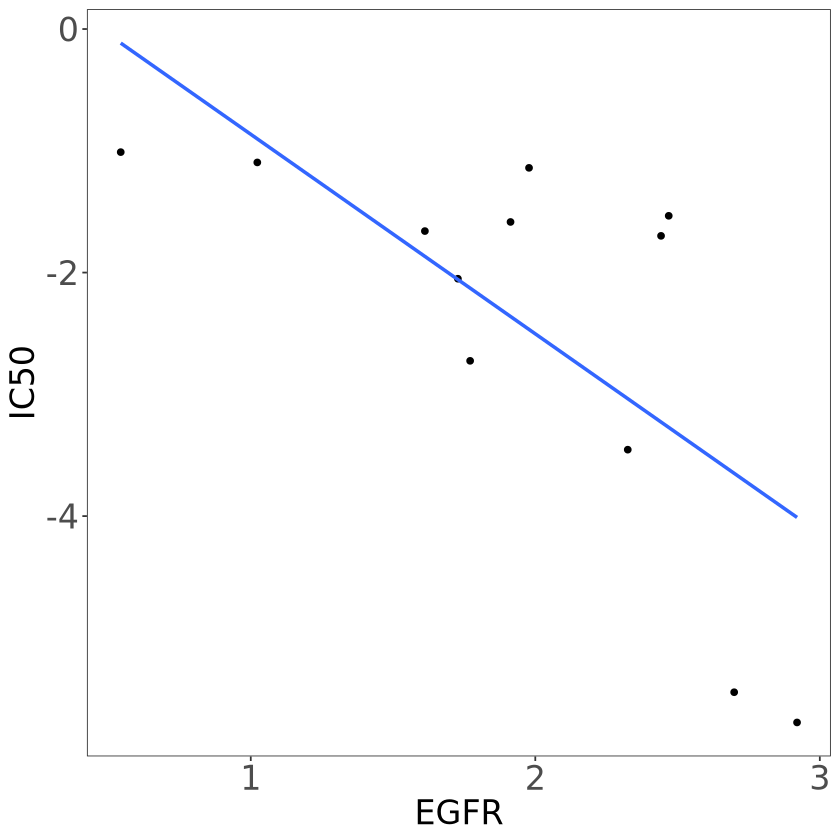

In [39]:

#d_name="1-phenylbiguanide" #cytarabine
drug_p=drug[,c("EGFR","gefitinib (GDSC1:1010)")]
drug_p=na.omit(drug_p)
colnames(drug_p) <- c("EGFR","IC50")
head(drug_p)

model <- lm(EGFR ~ IC50, data = drug_p)


#correlation
correlation_result <- cor.test(drug_p$IC50, drug_p$EGFR, method = "spearman")
correlation_result

library(ggplot2)
p =ggplot(drug_p, aes(EGFR,IC50)) +geom_point() + geom_smooth(method = lm,se = FALSE)+theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),axis.text=element_text(size=20),axis.title=element_text(size=20))
p

#pdf(file="IL18BP_trametinib_cor.pdf")
#p
#dev.off()

,IL18BP,PALMD,SOCS6,SPP1,WDR35
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22RV1_PROSTATE,0.929,0.611,0.787,-1.523,0.912
2313287_STOMACH,0.393,-0.745,1.346,-0.569,0.599
253JBV_URINARY_TRACT,0.382,-1.301,0.973,3.579,0.967
253J_URINARY_TRACT,0.371,-6.000,1.139,3.355,0.597
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.828,-1.155,0.922,0.267,0.628
5637_URINARY_TRACT,0.305,-1.699,1.076,-0.658,0.634


,CCLE Cell Line Name,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50,IC50,Amax,ActArea
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.67,11.0,2.16,.27,-10,-13,-26,-43","3.31,3.72,5.36,4.67,13.1,.18,2.42,7.51",8,Sigmoid,8.7177736,8.000000,-42.55801,0.7124
2,22RV1_PROSTATE,22Rv1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8",".94,12.5,-14,4.16,-25,-32,-52,-71","1.95,13.3,6.98,21.8,16.0,18.8,4.84,7.93",8,Sigmoid,8.1651636,2.329924,-71.58934,1.6723
3,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.91,8.39,-3.5,12.4,-.55,-6.2,-48,-63","13.7,7.70,11.1,6.43,24.0,9.57,9.57,10.4",8,Sigmoid,1.5145085,2.682130,-63.49137,1.1852
4,5637_URINARY_TRACT,5637,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","2.15,9.91,-3.5,.056,-2.1,-14,-30,-62","4.05,9.75,12.7,4.36,11.0,10.0,24.6,.14",8,Sigmoid,8.0065952,5.002314,-62.35278,0.9948
5,639V_URINARY_TRACT,639-V,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","11.8,-7.3,-9.4,-15,-11,-21,-53,-50",".95,5.67,11.1,.68,31.6,22.3,1.45,3.08",8,Sigmoid,0.9311957,1.736181,-51.95981,1.5436
6,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,697,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","18.4,4.65,8.64,19.3,-19,-20,-21,-78","25.4,1.92,15.0,23.1,24.7,13.5,1.26,2.51",8,Sigmoid,8.7006545,4.260822,-73.33379,1.7665


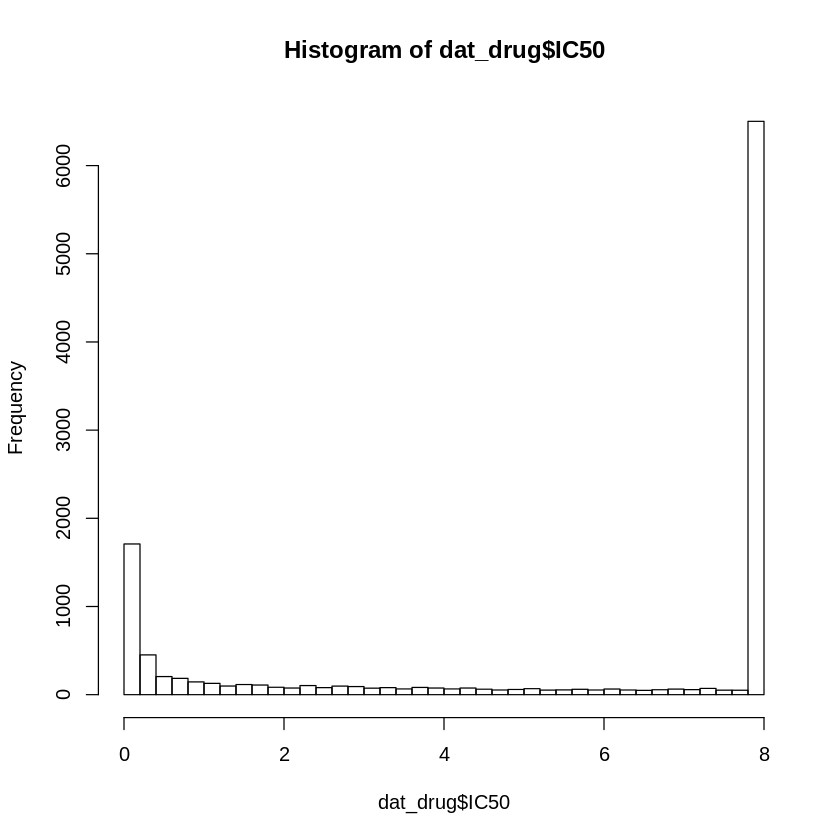

In [8]:
## CCLE 24 drugs, as all IC50 <=8, so removed IC50=8 to reduce bias

#rna
dat_rna=dat_rna[,c("IL18BP","PALMD","SOCS6","SPP1","WDR35")]
head(dat_rna)

#CCLE 24 drugs
dat_drug=as.data.frame(read.csv("dat/CCLE_NP24.2009_Drug_data_2015.02.24.csv",check.names = FALSE,header=T,stringsAsFactors=F))
head(dat_drug)
dat_drug=dat_drug[,c("CCLE Cell Line Name","Compound","IC50")]
#head(dat_drug)
hist(dat_drug$IC50,breaks=50)

,drug_name,gene,cor
,<fct>,<fct>,<fct>
re,AEW541,IL18BP,-0.0262206906905204
re.1,AEW541,PALMD,0.0235648204887812
re.2,AEW541,SOCS6,0.157753421186312
re.3,AEW541,SPP1,0.153437105088717
re.4,AEW541,WDR35,0.0571709176515873
re.5,Nilotinib,IL18BP,-0.237015138048235


[1] 85  3

,drug_name,gene,cor
,<fct>,<fct>,<fct>
re,AEW541,IL18BP,-0.0901397100332858
re.1,AEW541,PALMD,0.0254520307695604
re.2,AEW541,SOCS6,0.0703776482709419
re.3,AEW541,SPP1,-0.0433110567983397
re.4,AEW541,WDR35,0.0559554196801537
re.5,Nilotinib,IL18BP,0.0497431228826763


[1] 85  3

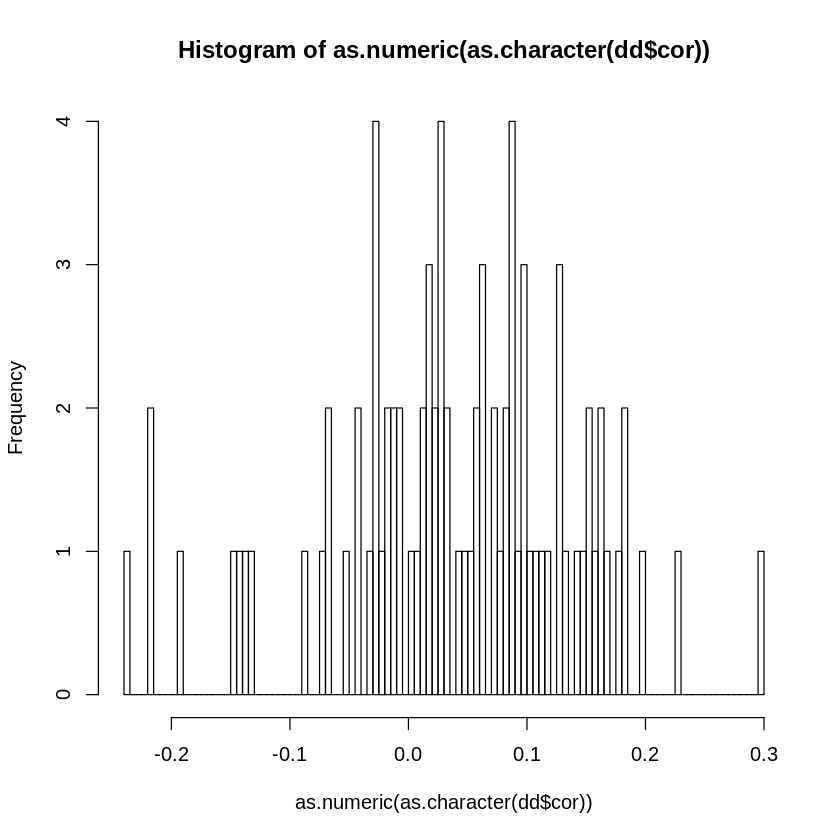

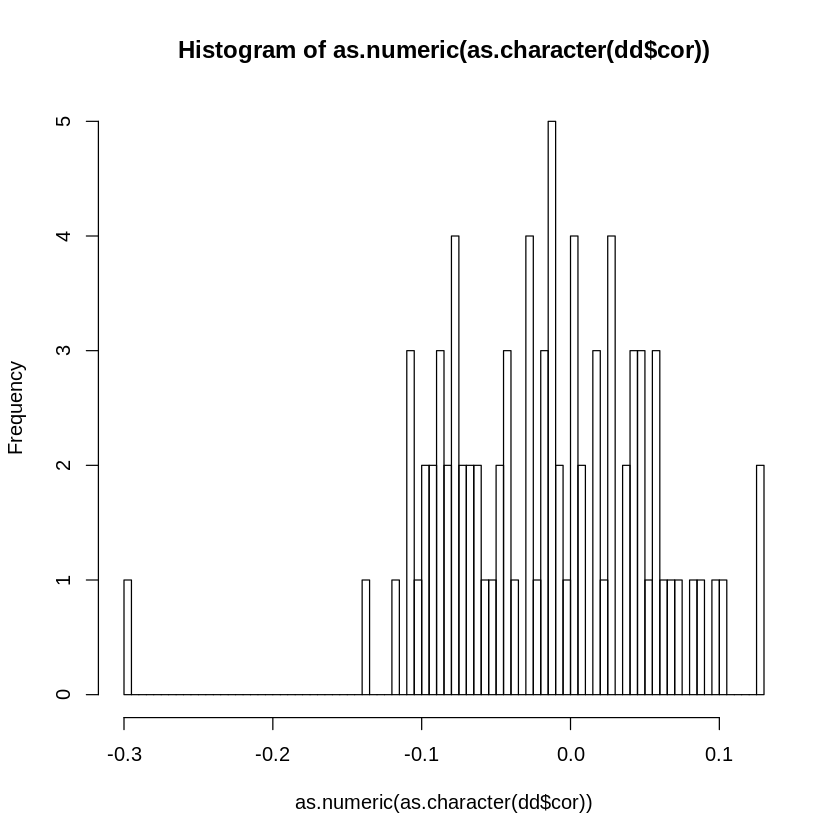

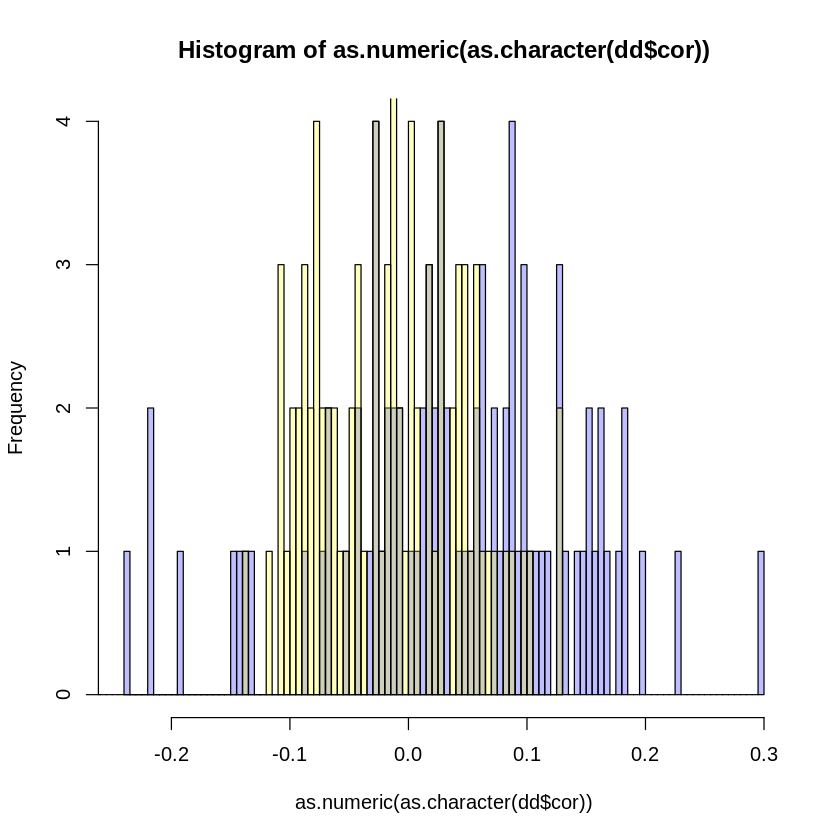

In [82]:
dd=c("drug_name","gene","cor")

for (i in unique(dat_drug$Compound)){   #288 drugs
#d_name="1-phenylbiguanide" #cytarabine
d_name=i
drug=subset(dat_drug,Compound==d_name) #cytarabine
drug_nr=subset(drug,IC50==8)
drug=subset(drug,IC50<8)
dim(drug)
drug=drug[,c("CCLE Cell Line Name","IC50")]
drug=na.omit(drug)
dim(drug)
head(drug)

drug=merge(drug,dat_gene,by.x="CCLE Cell Line Name",by.y="row.names")
cutoff=0

if (nrow(drug)>100){
    if (!is.nan(cor(drug$IC50,drug$IL18BP, method ="spearman")) && abs(cor(drug$IC50,drug$IL18BP, method ="spearman"))>=cutoff){re=c(d_name,"IL18BP",cor(drug$IC50,drug$IL18BP));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$PALMD, method ="spearman")) && abs(cor(drug$IC50,drug$PALMD, method ="spearman"))>=cutoff) {re=c(d_name,"PALMD",cor(drug$IC50,drug$PALMD));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$SOCS6, method ="spearman")) && abs(cor(drug$IC50,drug$SOCS6, method ="spearman"))>=cutoff) {re=c(d_name,"SOCS6",cor(drug$IC50,drug$SOCS6));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$SPP1, method ="spearman")) && abs(cor(drug$IC50,drug$SPP1, method ="spearman"))>=cutoff) {re=c(d_name,"SPP1",cor(drug$IC50,drug$SPP1));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$WDR35, method ="spearman")) && abs(cor(drug$IC50,drug$WDR35, method ="spearman"))>=cutoff) {re=c(d_name,"WDR35",cor(drug$IC50,drug$WDR35));dd=rbind(dd,re)}
}
    
    }


colnames(dd)=dd[1,]
dd=dd[-1,]
dd<-as.data.frame(dd)
#summary(dd$cor)
head(dd)
dim(dd)
p1=hist(as.numeric(as.character(dd$cor)),breaks=100)

write.table(dd, file = "out_doc/5gene_24drugs_cor.txt", append = FALSE, quote = FALSE, sep = "\t",row.names = FALSE,col.names = TRUE)



##############################################################################################################
#permutation test


dd=c("drug_name","gene","cor")

for (i in unique(dat_drug$Compound)){   #288 drugs
#d_name="1-phenylbiguanide" #cytarabine
d_name=i
drug=subset(dat_drug,Compound==d_name) #cytarabine
drug=subset(drug,IC50<8)
head(drug)
drug=drug[,c("CCLE Cell Line Name","IC50")]
drug=na.omit(drug)
drug$IC50=drug$IC50[sample(1:nrow(drug),nrow(drug))]    #shuffle IC50
dim(drug)
head(drug)

drug=merge(drug,dat_gene,by.x="CCLE Cell Line Name",by.y="row.names")
cutoff=0

if (nrow(drug)>100){
    if (!is.nan(cor(drug$IC50,drug$IL18BP, method ="spearman")) && abs(cor(drug$IC50,drug$IL18BP, method ="spearman"))>=cutoff){re=c(d_name,"IL18BP",cor(drug$IC50,drug$IL18BP));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$PALMD, method ="spearman")) && abs(cor(drug$IC50,drug$PALMD, method ="spearman"))>=cutoff) {re=c(d_name,"PALMD",cor(drug$IC50,drug$PALMD));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$SOCS6, method ="spearman")) && abs(cor(drug$IC50,drug$SOCS6, method ="spearman"))>=cutoff) {re=c(d_name,"SOCS6",cor(drug$IC50,drug$SOCS6));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$SPP1, method ="spearman")) && abs(cor(drug$IC50,drug$SPP1, method ="spearman"))>=cutoff) {re=c(d_name,"SPP1",cor(drug$IC50,drug$SPP1));dd=rbind(dd,re)}
    if (!is.nan(cor(drug$IC50,drug$WDR35, method ="spearman")) && abs(cor(drug$IC50,drug$WDR35, method ="spearman"))>=cutoff) {re=c(d_name,"WDR35",cor(drug$IC50,drug$WDR35));dd=rbind(dd,re)}
}
    
    }


colnames(dd)=dd[1,]
dd=dd[-1,]
dd<-as.data.frame(dd)
#summary(dd$cor)
head(dd)
dim(dd)
p2=hist(as.numeric(as.character(dd$cor)),breaks=100)

plot(p1,col=rgb(0,0,1,1/4))
plot(p2,col=rgb(1,1,0,1/4),add=T)  # second

,drug_name,gene,p_adj,#not response sample,#Sensitive samples
,<fct>,<fct>,<fct>,<fct>,<fct>
re,17-AAG,WDR35,0.036,27,476
re.1,PHA-665752,PALMD,0.0021,455,48
re.2,PHA-665752,SOCS6,0.012,455,48
re.3,Lapatinib,WDR35,6e-07,353,151
re.4,AZD0530,SOCS6,0.02,348,156
re.5,AZD0530,WDR35,0.013,348,156


[1] 37  5

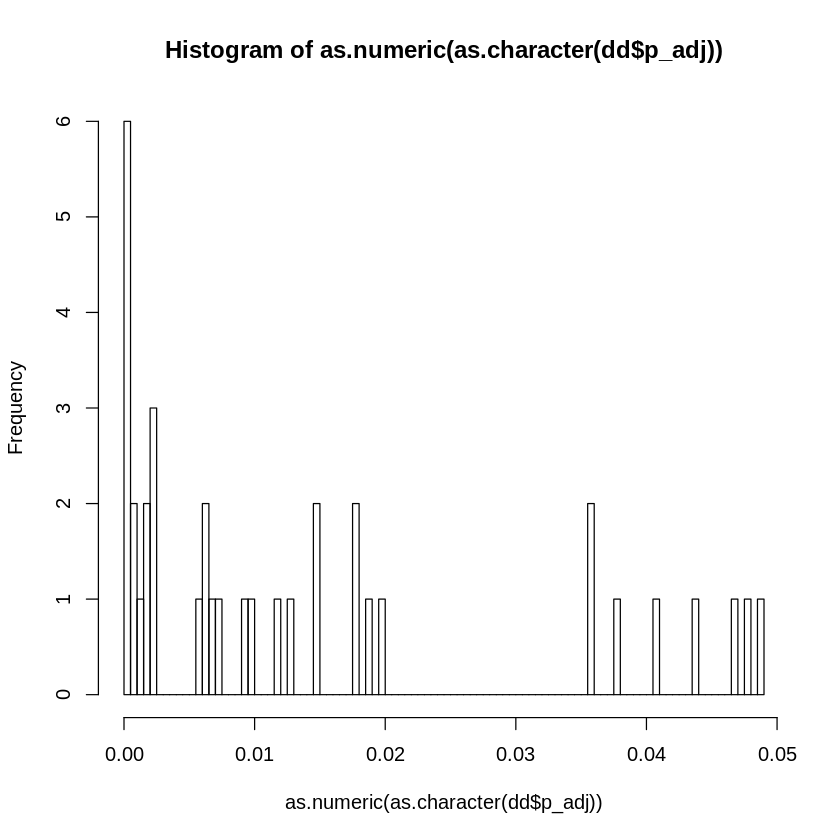

In [83]:
library(ggpubr)
dd=c("drug_name","gene","p_adj","#not response sample","#Sensitive samples")

for (i in unique(dat_drug$Compound)){   #24 drugs
#d_name="Erlotinib"
d_name=i
drug=subset(dat_drug,Compound==d_name) 
drug_nr=subset(drug,IC50==8)
if(nrow(drug_nr) <= 2 ){next}
drug_nr$group="NR"
dim(drug_nr)
drug_s=subset(drug,IC50<8)
if(nrow(drug_s) <= 2 ){next}
drug_s$group="S" 
dim(drug)
    
drug=rbind(drug_nr,drug_s)
drug=merge(drug,dat_gene,by.x="CCLE Cell Line Name",by.y="row.names")
head(drug)

#head(dat_drug_SNP)
de=compare_means(IL18BP~group, drug, paired=FALSE);if (de$p.adj<0.05){re=c(d_name,"IL18BP",de$p.adj,nrow(drug_nr),nrow(drug_s));dd=rbind(dd,re)}
de=compare_means(PALMD~group, drug, paired=FALSE);if (de$p.adj<0.05){re=c(d_name,"PALMD",de$p.adj,nrow(drug_nr),nrow(drug_s));dd=rbind(dd,re)}
de=compare_means(SOCS6~group, drug, paired=FALSE);if (de$p.adj<0.05){re=c(d_name,"SOCS6",de$p.adj,nrow(drug_nr),nrow(drug_s));dd=rbind(dd,re)}
de=compare_means(SPP1~group, drug, paired=FALSE);if (de$p.adj<0.05){re=c(d_name,"SPP1",de$p.adj,nrow(drug_nr),nrow(drug_s));dd=rbind(dd,re)}
de=compare_means(WDR35~group, drug, paired=FALSE);if (de$p.adj<0.05){re=c(d_name,"WDR35",de$p.adj,nrow(drug_nr),nrow(drug_s));dd=rbind(dd,re)}

}
colnames(dd)=dd[1,]
dd=dd[-1,]
dd<-as.data.frame(dd)
#summary(dd$cor)
head(dd)
dim(dd)
hist(as.numeric(as.character(dd$p_adj)),breaks=100)

[1] 348   4

[1] 156   4

,CCLE Cell Line Name,Compound,IC50,group,IL18BP,PALMD,SOCS6,SPP1,WDR35
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22RV1_PROSTATE,AZD0530,8.000000,NR,0.929,0.611,0.787,-1.523,0.912
2,42MGBA_CENTRAL_NERVOUS_SYSTEM,AZD0530,4.597950,S,0.828,-1.155,0.922,0.267,0.628
3,5637_URINARY_TRACT,AZD0530,3.192237,S,0.305,-1.699,1.076,-0.658,0.634
4,639V_URINARY_TRACT,AZD0530,8.000000,NR,0.824,-0.886,1.008,0.621,1.201
5,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AZD0530,7.261883,S,0.246,-1.523,0.886,-0.102,-2.000
6,769P_KIDNEY,AZD0530,1.071310,S,1.038,-1.398,1.222,3.298,0.736


[1] 0.02

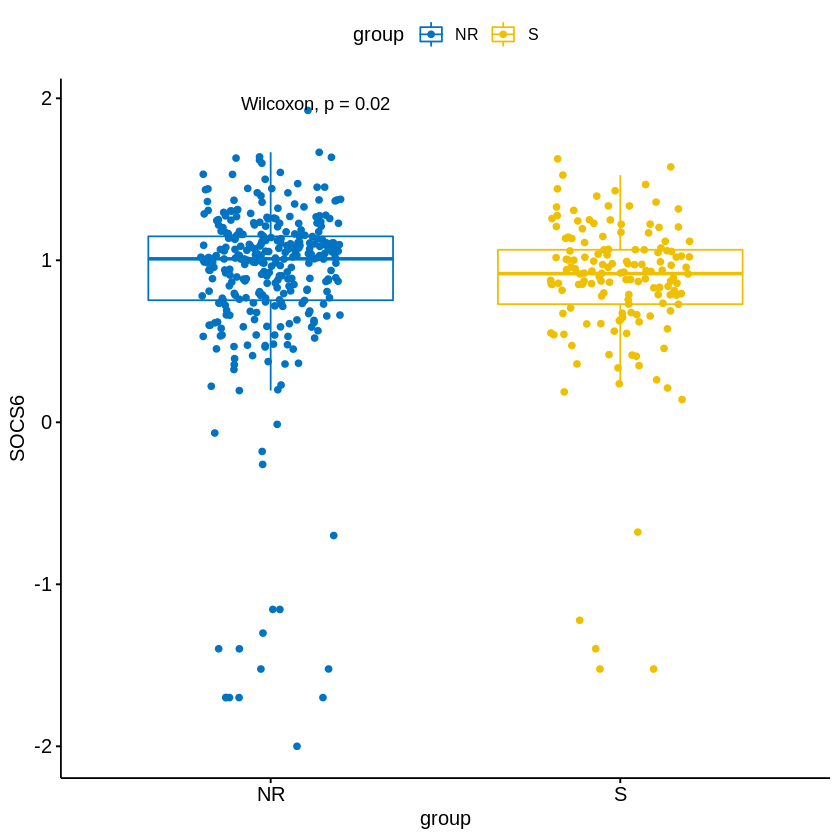

In [84]:

d_name="AZD0530"
drug=subset(dat_drug,Compound==d_name) #cytarabine
drug_nr=subset(drug,IC50==8)
drug_nr$group="NR"
dim(drug_nr)
drug=subset(drug,IC50<8)
drug$group="S" 
dim(drug)
    
drug=rbind(drug_nr,drug)
drug=merge(drug,dat_gene,by.x="CCLE Cell Line Name",by.y="row.names")
head(drug)

library(ggpubr)
#head(dat_drug_SNP)
re=compare_means(SOCS6~group, drug, paired=FALSE)
re=re[which(re[,"p.adj"]<0.5),]
p <- ggboxplot(drug, x="group",
               y = "SOCS6", color = "group",
               palette = "jco", add = "jitter")
# add p-value & plot
p + stat_compare_means()
re$p.adj